#GUIDE TO RUNNING THE CODE



```
This code is an annex to the bachelor thesis :
Thesis Title: Analysis of Topics and Their Evolution on Czech Far-Right Telegram in Response to the War in Ukraine from 2021 to 2024
Czech Thesis Title: Analýza témat a jejich změn na českém krajně pravicovém Telegramu v reakci na válku na Ukrajině v letech 2021–2024
Author: Daniel Burthey
Supervisor: Mgr. Jakub Stauber, Ph.D.

How to use the code is to run it either in google.collab or locally in a Python environment using Python 3.10.15.

You need to input into Part 0, the base depository into the whole structure will be saved.

For the code to work correctly two files are needed. The first mandatory file is accounts.csv that you need to put into data folder inside the base folder, with the accounts to download.
If you already have the czech_accounts.csv you can put it inside the czech_data.
The second mandatory file is is_far_right.csv, which has the manual categorization of accounts into far right and non far right using Cas Mudde’s (1995) five defining traits of the far-right.
Also it has if the account is an offshoot and what category of account it is. The is_far_right.csv file has to be put into the 6_database folder inside the export folder.

Your OpenAI API key is needed :
https://platform.openai.com/account/api-keys

Your Telegram API key, hash and phone number is needed:
https://core.telegram.org/api/obtaining_api_id

To run the code with all the accounts you can use a computer without a GPU, for the parts that are noted as so in the code, with a high ram amount 40Gb +.
The parts that need a GPU, are noted,  need one linked with 80Gb RAM and 2Gb VRAM for parts 13.1 and 13.2.
30gb RAM and 2Gb VRAM for the other BERTopic parts.
Sometimes there is a need to restart the machine, to clean RAM, so that Models fit inside.
The code has a make and load mechanism for BERTopic, so there is no need to run both of them.
You need to run Code 0, every time you run the code. / restart the machine.

If you want to run the sample of 5 accounts to check whether the code works.
Take accounts_sample.csv, rename it accounts.csv
Run CPU Part 0.
Put this accounts.csv into the data folder.
Put is_far_right.csv into the the 6_database folder inside the export folder.
Restart the computer session.
Run CPU Part 0.
Run all other parts.
The code should work start to finish, with the exception of some BERTopic models and outputs that may require more messages, such as 08 and 09 for each model.
It should take around 30 minutes start to finish to run the sample. you can see the output of 1_1_02 from 13.1.1 in the next cell
The full accounts.csv or czech_accounts.csv takes over 100 hours to run.

```






```
@article{tiedemann2023democratizing,
  title={Democratizing neural machine translation with {OPUS-MT}},
  author={Tiedemann, J{\"o}rg and Aulamo, Mikko and Bakshandaeva, Daria and Boggia, Michele and Gr{\"o}nroos, Stig-Arne and Nieminen, Tommi and Raganato\
, Alessandro and Scherrer, Yves and Vazquez, Raul and Virpioja, Sami},
  journal={Language Resources and Evaluation},
  number={58},
  pages={713--755},
  year={2023},
  publisher={Springer Nature},
  issn={1574-0218},
  doi={10.1007/s10579-023-09704-w}
}

@InProceedings{TiedemannThottingal:EAMT2020,
  author = {J{\"o}rg Tiedemann and Santhosh Thottingal},
  title = {{OPUS-MT} — {B}uilding open translation services for the {W}orld},
  booktitle = {Proceedings of the 22nd Annual Conferenec of the European Association for Machine Translation (EAMT)},
  year = {2020},
  address = {Lisbon, Portugal}
 }

@article{grootendorst2022bertopic,
  title={BERTopic: Neural topic modeling with a class-based TF-IDF procedure},
  author={Grootendorst, Maarten},
  journal={arXiv preprint arXiv:2203.05794},
  yea
  r={2022}
}

@misc{wang2020minilmdeepselfattentiondistillation,
      title={MiniLM: Deep Self-Attention Distillation for Task-Agnostic Compression of Pre-Trained Transformers},
      author={Wenhui Wang and Furu Wei and Li Dong and Hangbo Bao and Nan Yang and Ming Zhou},
      year={2020},
      eprint={2002.10957},
      archivePrefix={arXiv},
      primaryClass={cs.CL},
      url={https://arxiv.org/abs/2002.10957},
}
```



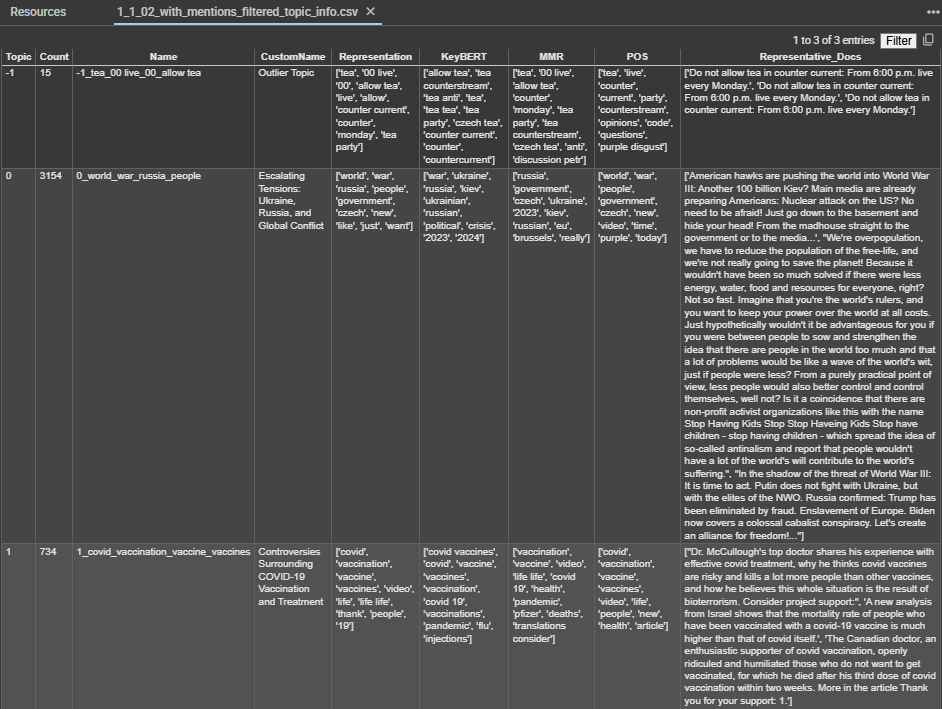

#CPU Part 0. Mounts Google Drive, creates and defines directories

In [ ]:
import os
from google.colab import drive

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

# Set your Telegram API key, hash and phone number
api_id = XXXXXXXX
api_hash = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
phone_number = '+XXXXXXXXXXXX'

# Define the base folder and mount it in Google Drive
drive.mount('/content/drive')
base_folder = '/content/drive/My Drive/XXX'

data_folder = os.path.join(base_folder, 'data')
czech_data_folder = os.path.join(base_folder, 'czech_data')
export_folder = os.path.join(base_folder, 'export')
sessions_folder = os.path.join(base_folder, 'sessions')

download_accounts_folder = os.path.join(export_folder, '0_accounts_to_download')
downloaded_1000_messages_folder = os.path.join(export_folder, '1_downloaded_1000_messages')
langdetected_1000_messages_folder = os.path.join(export_folder, '2_langdetected_1000_messages')
downloaded_messages_folder = os.path.join(export_folder, '3_downloaded_messages')
langdetected_messages_folder = os.path.join(export_folder, '4_langdetected_messages')
selenium_messages_folder = os.path.join(export_folder, '5_selenium_messages')
database_folder = os.path.join(export_folder, '6_database')
chosen_messages_folder = os.path.join(export_folder, '7_chosen_messages')
plots_accounts_folder = os.path.join(export_folder, '8_plots')
cleaning_chosen_messages_folder = os.path.join(export_folder, '9_cleaning_chosen_messages')
input_of_cleaning_folder = os.path.join(cleaning_chosen_messages_folder, '9_0_input_of_cleaning')
sentences_folder = os.path.join(cleaning_chosen_messages_folder, '9_1_sentences')
output_of_cleaning_folder = os.path.join(cleaning_chosen_messages_folder, '9_2_output_of_cleaning')
translating_messages_folder = os.path.join(export_folder, '10_translating_messages')
translated_folder_0 = os.path.join(translating_messages_folder, '10_0_czech_translated_messages')
translated_folder_1 = os.path.join(translating_messages_folder, '10_1_czech_&_slovak_translated_messages')
collocated_messages_folder = os.path.join(export_folder, '11_collocated_messages')
pre_BERT_final_folder = os.path.join(export_folder, '12_pre_BERT_final')
BERTopic_messages_folder = os.path.join(export_folder, '13_BERTopic_messages')
BERTopic_plots_folder = os.path.join(export_folder, '14_BERTopic_plots')

directories = [
    base_folder,
    data_folder,
    czech_data_folder,
    export_folder,
    sessions_folder,
    download_accounts_folder,
    downloaded_1000_messages_folder,
    langdetected_1000_messages_folder,
    downloaded_messages_folder,
    langdetected_messages_folder,
    selenium_messages_folder,
    database_folder,
    chosen_messages_folder,
    plots_accounts_folder,
    cleaning_chosen_messages_folder,
    input_of_cleaning_folder,
    output_of_cleaning_folder,
    sentences_folder,
    translating_messages_folder,
    translated_folder_0,
    translated_folder_1,
    collocated_messages_folder,
    pre_BERT_final_folder,
    BERTopic_messages_folder,
    BERTopic_plots_folder
]

for directory in directories:
    os.makedirs(directory, exist_ok=True)
    print(f"Directory created at path: {directory}")

print("All directories created successfully.")

Mounted at /content/drive
Directory created at path: /content/drive/My Drive/Colab_Data_6
Directory created at path: /content/drive/My Drive/Colab_Data_6/data
Directory created at path: /content/drive/My Drive/Colab_Data_6/czech_data
Directory created at path: /content/drive/My Drive/Colab_Data_6/export
Directory created at path: /content/drive/My Drive/Colab_Data_6/sessions
Directory created at path: /content/drive/My Drive/Colab_Data_6/export/0_accounts_to_download
Directory created at path: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages
Directory created at path: /content/drive/My Drive/Colab_Data_6/export/2_langdetected_1000_messages
Directory created at path: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages
Directory created at path: /content/drive/My Drive/Colab_Data_6/export/4_langdetected_messages
Directory created at path: /content/drive/My Drive/Colab_Data_6/export/5_selenium_messages
Directory created at path: /content/drive/My Drive/

#CPU Part 1. Download 1000 messages from each account

In [ ]:
import os
import pandas as pd
import re

accounts_csv_path = os.path.join(data_folder, "accounts.csv")
accounts_to_download_path = os.path.join(download_accounts_folder, "accounts_to_download_1000.csv")
czech_accounts_file = os.path.join(czech_data_folder, "czech_accounts.csv")

folders_to_check = [
    downloaded_1000_messages_folder,
    langdetected_1000_messages_folder,
    downloaded_messages_folder,
    langdetected_messages_folder,
    selenium_messages_folder,
]

def extract_username(url):
    url = url.replace('/s/', '/')
    match = re.search(r'https://t.me/([a-zA-Z0-9_]+)', url)
    return match.group(1) if match else None

def file_exists_in_folders(filename):
    return any(os.path.exists(os.path.join(folder, filename)) for folder in folders_to_check)

if os.path.exists(accounts_csv_path):
    accounts_df = pd.read_csv(accounts_csv_path)
else:
    accounts_df = pd.DataFrame(columns=["url"])

if 'url' not in accounts_df.columns:
    accounts_df['url'] = pd.NA

existing_accounts = set(accounts_df["url"].dropna())
print(f"Loaded {len(existing_accounts)} accounts from accounts.csv.")

if os.path.exists(czech_accounts_file):
    czech_accounts_df = pd.read_csv(czech_accounts_file)
    czech_accounts = set(czech_accounts_df["url"].dropna())
    print(f"Loaded {len(czech_accounts)} accounts from czech_accounts.csv.")
else:
    czech_accounts = set()

existing_accounts.update(czech_accounts)
print(f"Total unique accounts after merging: {len(existing_accounts)}")

new_accounts = []

for filename in os.listdir(selenium_messages_folder):
    if filename.endswith("messages.csv"):
        filepath = os.path.join(selenium_messages_folder, filename)
        try:
            df = pd.read_csv(filepath, encoding='utf-8', low_memory=False)
        except UnicodeDecodeError:
            print(f"Skipping file {filename} due to UnicodeDecodeError.")
            continue

        if 'plurality_is_czech' in df.columns and 'original_account_url' in df.columns:
            czech_links = df[df['plurality_is_czech'] == True]['original_account_url'].dropna().unique()
            for link in czech_links:
                if link not in existing_accounts:
                    print(f"Adding new account from selenium file: {link}")
                    new_accounts.append(link)
                    existing_accounts.add(link)
                else:
                    print(f"Account {link} already exists in accounts.csv or czech_accounts.csv, skipping.")

if new_accounts:
    new_entries = pd.DataFrame(new_accounts, columns=["url"])
    accounts_df = pd.concat([accounts_df, new_entries], ignore_index=True)

accounts_df['url'] = accounts_df['url'].str.replace('/s/', '/', regex=False).str.rstrip('/')
accounts_df = accounts_df[accounts_df['url'] != "https://t.me"]
accounts_df = accounts_df.drop_duplicates(subset='url').reset_index(drop=True)
accounts_df.to_csv(accounts_csv_path, index=False, encoding="utf-8")
print("accounts.csv cleaned, deduplicated, and saved.")

accounts_to_download = []
for url in accounts_df['url']:
    filename = f"{extract_username(url)}_messages.csv"
    if not file_exists_in_folders(filename) and url not in czech_accounts:
        accounts_to_download.append(url)
        print(f"Account {url} added to accounts_to_download_1000.csv (file does not exist).")
    else:
        if file_exists_in_folders(filename):
            print(f"Account {url} skipped (file already exists).")
        if url in czech_accounts:
            print(f"Account {url} skipped (already in czech_accounts.csv).")

accounts_to_download_df = pd.DataFrame(accounts_to_download, columns=["url"])
accounts_to_download_df['url'] = accounts_to_download_df['url'].str.replace('/s/', '/', regex=False).str.rstrip('/')
accounts_to_download_df = accounts_to_download_df.drop_duplicates(subset='url').reset_index(drop=True)

if not accounts_to_download_df.empty:
    accounts_to_download_df.to_csv(accounts_to_download_path, index=False, encoding="utf-8")
    print(f"accounts_to_download_1000.csv updated with {len(accounts_to_download_df)} unique URLs.")
else:
    accounts_to_download_df.to_csv(accounts_to_download_path, index=False, encoding="utf-8")
    print("accounts_to_download_1000.csv is now empty but retained with the 'url' column.")

print("Process completed.")


Loaded 5 accounts from accounts.csv.
Total unique accounts after merging: 5
accounts.csv cleaned, deduplicated, and saved.
Account https://t.me/otevrisvoumysl added to accounts_to_download_1000.csv (file does not exist).
Account https://t.me/michalsharksvobodnykanal added to accounts_to_download_1000.csv (file does not exist).
Account https://t.me/protiproudpetrahajka added to accounts_to_download_1000.csv (file does not exist).
Account https://t.me/nsfronta added to accounts_to_download_1000.csv (file does not exist).
Account https://t.me/nezdolny added to accounts_to_download_1000.csv (file does not exist).
accounts_to_download_1000.csv updated with 5 unique URLs.
Process completed.


In [ ]:
!pip install telethon nest_asyncio

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.9/715.9 kB 10.0 MB/s eta 0:00:00
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26347 sha256=3d94b08c63d59dd7a453460997a1b0ad5461d12af929f29809571127f24f3bfd
  Stored in directory: /root/.cache/pip/wheels/4e/52/33/010d0843550bffb6a591b11629070ae140c0ad4f53e68a3bd3
Successfully built pyaes


In [ ]:
import nest_asyncio
import asyncio
from telethon import TelegramClient
import re
import os
import pandas as pd
import configparser
import time
import random

nest_asyncio.apply()

os.makedirs(sessions_folder, exist_ok=True)
os.makedirs(downloaded_1000_messages_folder, exist_ok=True)
client = TelegramClient(os.path.join(sessions_folder, 'anon'), api_id, api_hash)

config = configparser.ConfigParser()
config_file = os.path.join(data_folder, "channels.ini")
if os.path.exists(config_file):
    config.read(config_file)

def extract_username(url):
    url = url.replace('/s/', '/')
    match = re.search(r'https://t.me/([a-zA-Z0-9_]+)', url)
    return match.group(1) if match else None

async def get_channel_entity(username):
    try:
        entity = await client.get_entity(username)
        channel_id = entity.id
        channel_hash = entity.access_hash
        config[username] = {'id': str(channel_id), 'hash': str(channel_hash)}
        return entity
    except ValueError as e:
        print(f"Error: Could not find the channel '{username}'. {e}")
    except Exception as e:
        print(f"Unexpected error while accessing '{username}': {e}")

async def download_messages(channel_entity, channel_link):
    try:
        messages = []
        async for message in client.iter_messages(channel_entity, limit=1000):
            if message.text:
                message_link = f"{channel_link}/{message.id}"
                reactions_and_comments_count = message.replies.replies if message.replies else 0
                message_type = "repost" if message.forward else "original"
                clean_text = message.text

                message_data = {
                    "message_url": message_link,
                    "text": clean_text,
                    "message_date": message.date,
                    "message_type": message_type,
                    "reactions_and_comments_count": reactions_and_comments_count
                }

                messages.append(message_data)

        print(f"Total messages fetched from {channel_link}: {len(messages)}")
        return messages

    except Exception as e:
        print(f"Error fetching messages: {e}")
        return []


async def process_channel(url, delay_range=(5, 10)):
    username = extract_username(url)
    if username:
        filename = f"{username}_messages.csv"
        output_file = os.path.join(downloaded_1000_messages_folder, filename)

        print(f"Downloading new messages from {username}...")
        channel_entity = await get_channel_entity(username)
        if channel_entity:
            channel_link = f"https://t.me/{username}"
            new_messages = await download_messages(channel_entity, channel_link)

            if new_messages:
                new_messages_df = pd.DataFrame(new_messages)
                new_messages_df.to_csv(output_file, mode='w', header=True, index=False, encoding="utf-8")
                print(f"Messages from {username} saved to {output_file}")
            else:
                print(f"No new messages found for {username}")

        delay = random.uniform(*delay_range)
        print(f"Waiting for {delay:.2f} seconds to avoid hitting rate limits...")
        time.sleep(delay)
    else:
        print(f"Invalid URL format: {url}")

async def main():
    await client.start(phone=phone_number)

    csv_file = os.path.join(download_accounts_folder, "accounts_to_download_1000.csv")
    df = pd.read_csv(csv_file, low_memory=False)

    target_batch_size = 10
    total_channels = len(df)
    i = 0

    try:
        while i < total_channels:
            batch = df['url'][i:i + target_batch_size].tolist()

            tasks = [process_channel(url) for url in batch]
            await asyncio.gather(*tasks)

            print(f"Processed batch {(i // target_batch_size) + 1} with {len(batch)} accounts.")

            i += target_batch_size

            if batch:
                print(f"Waiting for 30 seconds before processing the next set of channels...")
                time.sleep(30)

    except asyncio.CancelledError:
        print("Task was cancelled.")
    finally:
        await client.disconnect()

await main()


Total messages fetched from https://t.me/nsfronta: 416
Messages from nsfronta saved to /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nsfronta_messages.csv
Waiting for 9.68 seconds to avoid hitting rate limits...
Total messages fetched from https://t.me/nezdolny: 826
Messages from nezdolny saved to /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nezdolny_messages.csv
Waiting for 8.60 seconds to avoid hitting rate limits...
Total messages fetched from https://t.me/protiproudpetrahajka: 991
Messages from protiproudpetrahajka saved to /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/protiproudpetrahajka_messages.csv
Waiting for 8.04 seconds to avoid hitting rate limits...
Total messages fetched from https://t.me/michalsharksvobodnykanal: 891
Messages from michalsharksvobodnykanal saved to /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/michalsharksvobodnykanal_messages.csv
Waiting for 8.81 seconds 

In [ ]:
import os
import pandas as pd
import pytz

START_DATE = "2021-01-01"
END_DATE   = "2225-12-31"

czech_timezone = pytz.timezone('Europe/Prague')

for filename in os.listdir(downloaded_1000_messages_folder):
    if filename.endswith("_messages.csv"):
        filepath = os.path.join(downloaded_1000_messages_folder, filename)

        if os.path.getsize(filepath) == 0:
            print(f"Skipping empty file: {filepath}")
            continue

        df = pd.read_csv(filepath, low_memory=False)
        if df.empty:
            print(f"Skipping file with no data: {filepath}")
            continue

        print(f"Converting and filtering dates in: {filepath}")

        df['message_date'] = pd.to_datetime(df['message_date'], utc=True, errors='coerce')

        df.dropna(subset=['message_date'], inplace=True)

        df['message_date_cz'] = df['message_date'].dt.tz_convert(czech_timezone)

        start_dt = pd.to_datetime(START_DATE).tz_localize(czech_timezone)
        end_dt = pd.to_datetime(END_DATE).tz_localize(czech_timezone)

        df = df[(df['message_date_cz'] >= start_dt) & (df['message_date_cz'] <= end_dt)].copy()

        df['standard_message_date'] = df['message_date_cz'].dt.strftime('%Y-%m-%d %H:%M:%S')

        df.drop(columns=['message_date_cz'], inplace=True)

        df.to_csv(filepath, index=False)
        print(f"Updated and saved: {filepath}")


Converting and filtering dates in: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nsfronta_messages.csv
Updated and saved: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nsfronta_messages.csv
Converting and filtering dates in: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nezdolny_messages.csv
Updated and saved: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nezdolny_messages.csv
Converting and filtering dates in: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/protiproudpetrahajka_messages.csv
Updated and saved: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/protiproudpetrahajka_messages.csv
Converting and filtering dates in: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/michalsharksvobodnykanal_messages.csv
Updated and saved: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/michalsharksvobodnykan

In [ ]:
import os
import pandas as pd
import re
import difflib
import sys

def extract_channel_link(message_link):
    match = re.match(r'https://t.me/([^/]+)/(\d+)', message_link)
    if match:
        return f"https://t.me/{match.group(1)}"
    return None

def extract_urls(text):
    if isinstance(text, str):
        url_pattern = re.compile(r"(https?://\S+|www\.\S+|t\.me/\S+)")
        urls = url_pattern.findall(text)
        return urls
    return []

def merge_and_deduplicate_urls(existing_urls, new_urls):
    existing_set = set(existing_urls.split(" | ")) if isinstance(existing_urls, str) else set()
    new_set = set(new_urls)
    merged_urls = existing_set.union(new_set)
    return " | ".join(merged_urls)

def extract_mentions(text):
    if isinstance(text, str):
        mentions = re.findall(r"@\w+", text)
        return " | ".join(mentions) if mentions else None
    return None

def remove_urls_and_mentions(text):
    if isinstance(text, str):
        text_without_urls = re.sub(r"(https?://\S+|www\.\S+|t\.me/\S+)", '', text)
        text_without_mentions = re.sub(r"@\w+", '', text_without_urls)
        return text_without_mentions.strip()
    return text

def extract_garbage_text(original_text, cleaned_text):
    max_length = 500
    try:
        if (isinstance(original_text, str) and isinstance(cleaned_text, str) and
            len(original_text) <= max_length and len(cleaned_text) <= max_length):
            diff = list(difflib.ndiff(original_text, cleaned_text))
            removed_chars = ''.join([d[-1] for d in diff if d.startswith('- ')])
            return removed_chars
        return ""
    except RecursionError:
        print("RecursionError occurred during garbage extraction.", file=sys.stderr)
        return ""
    except Exception as e:
        print(f"Error extracting garbage text: {e}", file=sys.stderr)
        return ""

def clean_to_basic_language(text):
    if isinstance(text, str):
        text = re.sub(r'\*\*(.*?)\*\*', r' \1 ', text)

        text = re.sub(r'[\n\r\u2028\u2029]', ' ', text)

        currency_mapping = {
            "$": "dollars",
            "€": "euros",
            "£": "pounds",
            "₽": "rubles",
            "¥": "yen",
            "₩": "won",
            "₹": "rupees",
            "₺": "lira",
            "₦": "naira",
            "₫": "dong",
            "₪": "shekels",
            "฿": "baht",
            "₿": "bitcoin",
            "₡": "colón",
            "₲": "guaraní",
            "₴": "hryvnia",
            "₭": "kip",
        }

        def replace_currency_symbols(match):
            number = match.group(1)
            symbol = match.group(2)
            if symbol in currency_mapping:
                return f"{number} {currency_mapping[symbol]}"
            return match.group(0)

        text = re.sub(r'(\d+)\s*([$€£₽¥₩₹₺₦₫₪฿₿₡₲₴₭])', replace_currency_symbols, text)

        cleaned_text = re.sub(
            r"[#]"
            r"|[\u2600-\u26FF\u2700-\u27BF\U0001F600-\U0001F64F\U0001F300-\U0001F5FF"
            r"\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F900-\U0001F9FF"
            r"\U0001FA70-\U0001FAFF]"
            r"|[^a-zA-Z0-9áéíóúůýčďěňřšťžäĺľňôŕÁÉÍÓÚÝČĎĚŇŘŠŤŽÄĹĽŇÔŔ"
            r"À-ÿ"
            r"ßẞøØåÅæÆœŒ"
            r"Α-Ωα-ω"
            r"А-Яа-яёЁЇїІіЄєҐґ"
            r"ŁłŚśŹźŻżĄąĘęĆćŃń"
            r"ĐđŢţȘșȚț"
            r"ŐőŰű"
            r"\s\.\,\?\’\!\%\'\-]"
            r"|[\x00-\x1F\x7F]", " ", text)

        cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

        cleaned_text = re.sub(r'\s([.,!?])', r'\1', cleaned_text)

        cleaned_text = re.sub(r'\s\'', r'\'', cleaned_text)

        return cleaned_text.strip()
    return text

def process_file(filepath):
    try:
        if os.path.getsize(filepath) == 0:
            print(f"Skipping empty file: {filepath}")
            return

        df = pd.read_csv(filepath, low_memory=False)

        if df.empty:
            print(f"Skipping file with no data: {filepath}")
            return

        print(f"Processing file: {filepath}")

        df['account_url'] = df['message_url'].apply(extract_channel_link)

        extracted_urls = df['text'].apply(extract_urls)

        if 'urls_in_text' in df.columns:
            df['urls_in_text'] = df.apply(
                lambda row: merge_and_deduplicate_urls(row['urls_in_text'], extracted_urls[row.name]),
                axis=1
            )
        else:
            df['urls_in_text'] = extracted_urls.apply(lambda urls: " | ".join(urls))

        df['users_in_text'] = df['text'].apply(extract_mentions)

        df['cleaned_text'] = df['text'].apply(lambda txt: clean_to_basic_language(remove_urls_and_mentions(txt)))

        df['removed_text'] = df.apply(lambda row: extract_garbage_text(row['text'], row['cleaned_text']), axis=1)

        df.to_csv(filepath, index=False)
        print(f"File updated and saved: {filepath}")

    except pd.errors.EmptyDataError:
        print(f"Skipping empty or invalid file: {filepath}")
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")

for filename in os.listdir(downloaded_1000_messages_folder):
    if filename.endswith("_messages.csv"):
        filepath = os.path.join(downloaded_1000_messages_folder, filename)
        process_file(filepath)


Processing file: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nsfronta_messages.csv
File updated and saved: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nsfronta_messages.csv
Processing file: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nezdolny_messages.csv
File updated and saved: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/nezdolny_messages.csv
Processing file: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/protiproudpetrahajka_messages.csv
File updated and saved: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/protiproudpetrahajka_messages.csv
Processing file: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/michalsharksvobodnykanal_messages.csv
File updated and saved: /content/drive/My Drive/Colab_Data_6/export/1_downloaded_1000_messages/michalsharksvobodnykanal_messages.csv
Processing file: /content/drive/My D

# CPU Part 2. Langdetect the 1000 downloaded messages

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=68c2e907e7eede888aade78ddaa6eccfd43861ad3193a06465644deb1aacd492
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import os
import pandas as pd
from langdetect import detect, LangDetectException
from concurrent.futures import ThreadPoolExecutor

def detect_language(text, text_urls):
    if isinstance(text, str) and text.strip():
        try:
            return detect(text[:200])
        except LangDetectException:
            return "unknown"
    elif pd.isna(text) or (isinstance(text, str) and not text.strip()):
        if isinstance(text_urls, str) and text_urls.strip():
            return "URL"
        return "Empty"
    return "unknown"

def detect_languages_in_batches(df, filename, batch_size=500):
    detected_languages = []
    total_batches = len(df) // batch_size + (1 if len(df) % batch_size != 0 else 0)

    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i + batch_size]
        with ThreadPoolExecutor() as executor:
            detected_languages.extend(
                executor.map(lambda row: detect_language(row['cleaned_text'], row['urls_in_text']),
                             batch.to_dict('records'))
            )
        print(f"Processing {filename}: Batch {i // batch_size + 1} of {total_batches}")

    return detected_languages

def process_file(filepath):
    print(f"Processing file: {os.path.basename(filepath)}")
    df = pd.read_csv(filepath, low_memory=False)

    if 'message_language' not in df.columns:
        df['message_language'] = None

    new_entries = df['message_language'].isnull()
    if new_entries.any():
        df_new_entries = df.loc[new_entries, ['cleaned_text', 'urls_in_text']]
        detected_languages = detect_languages_in_batches(
            df_new_entries,
            filename=os.path.basename(filepath),
            batch_size=500
        )
        df.loc[new_entries, 'message_language'] = detected_languages

        language_counts = df['message_language'].value_counts(normalize=True) * 100

        cs_percent = language_counts.get("cs", 0)
        competitors = [percent for lang, percent in language_counts.items()
                       if lang not in ["URL", "unknown", "Empty", "cs"]]
        max_competitor = max(competitors) if competitors else 0

        plurality_is_czech = cs_percent >= max_competitor and cs_percent > 0

        df['plurality_is_czech'] = plurality_is_czech
        df['language_distribution'] = ', '.join(
            [f"{lang}: {round(percent, 2)}%" for lang, percent in language_counts.items()]
        )
        df['account_total_messages'] = len(df)

        new_filepath = os.path.join(langdetected_1000_messages_folder, os.path.basename(filepath))
        df.to_csv(new_filepath, index=False, encoding="utf-8")
        print(f"File saved to {langdetected_1000_messages_folder}: {os.path.basename(new_filepath)}")
    else:
        print(f"No new language data to detect for {os.path.basename(filepath)}, copying file as-is.")

    os.remove(filepath)
    print(f"Deleted original file: {os.path.basename(filepath)}")

print("Starting file processing...")

for filename in os.listdir(downloaded_1000_messages_folder):
    if filename.endswith("_messages.csv"):
        filepath = os.path.join(downloaded_1000_messages_folder, filename)
        process_file(filepath)

print("All files processed successfully.")


Starting file processing...
Processing file: nsfronta_messages.csv
Processing nsfronta_messages.csv: Batch 1 of 1
File saved to /content/drive/My Drive/Colab_Data_6/export/2_langdetected_1000_messages: nsfronta_messages.csv
Deleted original file: nsfronta_messages.csv
Processing file: nezdolny_messages.csv
Processing nezdolny_messages.csv: Batch 1 of 2
Processing nezdolny_messages.csv: Batch 2 of 2
File saved to /content/drive/My Drive/Colab_Data_6/export/2_langdetected_1000_messages: nezdolny_messages.csv
Deleted original file: nezdolny_messages.csv
Processing file: protiproudpetrahajka_messages.csv
Processing protiproudpetrahajka_messages.csv: Batch 1 of 2
Processing protiproudpetrahajka_messages.csv: Batch 2 of 2
File saved to /content/drive/My Drive/Colab_Data_6/export/2_langdetected_1000_messages: protiproudpetrahajka_messages.csv
Deleted original file: protiproudpetrahajka_messages.csv
Processing file: michalsharksvobodnykanal_messages.csv
Processing michalsharksvobodnykanal_mess

In [ ]:
import os
import pandas as pd

czech_accounts_file = os.path.join(czech_data_folder, "czech_accounts.csv")

if os.path.exists(czech_accounts_file):
    czech_accounts_df = pd.read_csv(czech_accounts_file)
else:
    czech_accounts_df = pd.DataFrame(columns=["url"])

for file_name in os.listdir(langdetected_1000_messages_folder):
    if file_name.endswith("_messages.csv"):
        file_path = os.path.join(langdetected_1000_messages_folder, file_name)

        try:
            df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
        except Exception as e:
            print(f"Skipping file {file_name} due to an error: {e}")
            continue

        if "plurality_is_czech" in df.columns and df["plurality_is_czech"].any() == True:
            account_url = df["account_url"].iloc[0] if "account_url" in df.columns else None
            if account_url:
                if account_url not in czech_accounts_df["url"].values:
                    print(f"Adding account {account_url} to czech_accounts.csv")
                    czech_accounts_df = pd.concat([czech_accounts_df, pd.DataFrame({"url": [account_url]})], ignore_index=True)

            czech_accounts_df.drop_duplicates(subset=["url"], inplace=True)
            czech_accounts_df.to_csv(czech_accounts_file, index=False, encoding='utf-8')

            try:
                os.remove(file_path)
                print(f"Deleted processed file: {file_name}")
            except Exception as e:
                print(f"Error deleting file {file_name}: {e}")
        else:
            print(f"File {file_name} did not meet criteria and was not deleted.")

print("Processing completed.")


File nsfronta_messages.csv did not meet criteria and was not deleted.
Adding account https://t.me/nezdolny to czech_accounts.csv
Deleted processed file: nezdolny_messages.csv
Adding account https://t.me/protiproudpetrahajka to czech_accounts.csv
Deleted processed file: protiproudpetrahajka_messages.csv
Adding account https://t.me/michalsharksvobodnykanal to czech_accounts.csv
Deleted processed file: michalsharksvobodnykanal_messages.csv
Adding account https://t.me/otevrisvoumysl to czech_accounts.csv
Deleted processed file: otevrisvoumysl_messages.csv
Processing completed.


# CPU Part 3. Download messages from czech Telegram accounts into csv files


In [ ]:
import os
import pandas as pd
import re

accounts_csv_path = os.path.join(czech_data_folder, "czech_accounts.csv")
accounts_to_download_path = os.path.join(download_accounts_folder, "czech_accounts_to_download.csv")

folders_to_check = [
    downloaded_messages_folder,
    langdetected_messages_folder,
    selenium_messages_folder
]

def extract_username(url):
    url = url.replace('/s/', '/')
    match = re.search(r'https://t.me/([a-zA-Z0-9_]+)', url)
    return match.group(1) if match else None

def file_exists_in_folders(filename):
    return any(os.path.exists(os.path.join(folder, filename)) for folder in folders_to_check)

if os.path.exists(accounts_csv_path):
    accounts_df = pd.read_csv(accounts_csv_path)
else:
    accounts_df = pd.DataFrame(columns=["url"])

accounts_df['url'] = accounts_df['url'].str.replace('/s/', '/', regex=False).str.rstrip('/')
accounts_df = accounts_df[accounts_df['url'] != "https://t.me"]
accounts_df = accounts_df.drop_duplicates(subset='url').reset_index(drop=True)

accounts_df['username'] = accounts_df['url'].apply(extract_username)
accounts_df['file_exists'] = accounts_df['username'].apply(lambda username: file_exists_in_folders(f"{username}_messages.csv"))

accounts_to_download_df = accounts_df[~accounts_df['file_exists']].drop(columns=['file_exists', 'username'])

if accounts_to_download_df.empty:
    accounts_to_download_df = pd.DataFrame(columns=["url"])

accounts_to_download_df.to_csv(accounts_to_download_path, index=False, encoding="utf-8")
print(f"Updated czech_accounts_to_download.csv with {len(accounts_to_download_df)} URLs.")

print("Process completed.")


Updated czech_accounts_to_download.csv with 4 URLs.
Process completed.


In [ ]:
!pip install telethon nest_asyncio

In [ ]:
import nest_asyncio
import asyncio
from telethon import TelegramClient
import re
import os
import pandas as pd
import configparser
import time
import random

nest_asyncio.apply()
os.makedirs(sessions_folder, exist_ok=True)
os.makedirs(downloaded_messages_folder, exist_ok=True)
client = TelegramClient(os.path.join(sessions_folder, 'anon'), api_id, api_hash)

config = configparser.ConfigParser()
config_file = os.path.join(data_folder, "channels.ini")
if os.path.exists(config_file):
    config.read(config_file)

def extract_username(url):
    url = url.replace('/s/', '/')
    match = re.search(r'https://t.me/([a-zA-Z0-9_]+)', url)
    return match.group(1) if match else None

async def get_channel_entity(username):
    try:
        entity = await client.get_entity(username)
        channel_id = entity.id
        channel_hash = entity.access_hash
        config[username] = {'id': str(channel_id), 'hash': str(channel_hash)}
        return entity
    except ValueError as e:
        print(f"Error: Could not find the channel '{username}'. {e}")
    except Exception as e:
        print(f"Unexpected error while accessing '{username}': {e}")

async def download_messages(channel_entity, channel_link):
    messages = []
    last_message_id = 0
    batch_size = 1000
    batch_count = 0

    try:
        while True:
            batch_messages = []

            async for message in client.iter_messages(channel_entity, limit=batch_size, offset_id=last_message_id):
                if message.text:
                    message_link = f"{channel_link}/{message.id}"
                    reactions_and_comments_count = message.replies.replies if message.replies else 0
                    message_type = "repost" if message.forward else "original"
                    clean_text = message.text

                    message_data = {
                        "message_url": message_link,
                        "text": clean_text,
                        "message_date": message.date,
                        "message_type": message_type,
                        "reactions_and_comments_count": reactions_and_comments_count
                    }

                    batch_messages.append(message_data)

            if not batch_messages:
                break

            last_message_id = int(batch_messages[-1]["message_url"].split('/')[-1])
            messages.extend(batch_messages)
            batch_count += 1

            print(f"Fetched {len(batch_messages)} messages in batch {batch_count} from {channel_link}")

        print(f"Total messages fetched from {channel_link}: {len(messages)}")
        return messages

    except Exception as e:
        print(f"Error fetching messages: {e}")
        return []

async def process_channel(url, delay_range=(5, 10)):
    username = extract_username(url)
    if username:
        filename = f"{username}_messages.csv"
        output_file = os.path.join(downloaded_messages_folder, filename)

        print(f"Downloading new messages from {username}...")
        channel_entity = await get_channel_entity(username)
        if channel_entity:
            channel_link = f"https://t.me/{username}"
            new_messages = await download_messages(channel_entity, channel_link)

            if new_messages:
                new_messages_df = pd.DataFrame(new_messages)
                new_messages_df.to_csv(output_file, mode='w', header=True, index=False, encoding="utf-8")
                print(f"Messages from {username} saved to {output_file}")
            else:
                print(f"No new messages found for {username}")

        delay = random.uniform(*delay_range)
        print(f"Waiting for {delay:.2f} seconds to avoid hitting rate limits...")
        time.sleep(delay)
    else:
        print(f"Invalid URL format: {url}")

async def main():
    await client.start(phone=phone_number)

    csv_file = os.path.join(download_accounts_folder, "czech_accounts_to_download.csv")
    df = pd.read_csv(csv_file, low_memory=False)

    target_batch_size = 10
    total_channels = len(df)
    i = 0

    try:
        while i < total_channels:
            batch = df['url'][i:i + target_batch_size].tolist()

            tasks = [process_channel(url) for url in batch]
            await asyncio.gather(*tasks)

            print(f"Processed batch {(i // target_batch_size) + 1} with {len(batch)} accounts.")

            i += target_batch_size

            if batch:
                print(f"Waiting for 30 seconds before processing the next set of channels...")
                time.sleep(30)

    except asyncio.CancelledError:
        print("Task was cancelled.")
    finally:
        await client.disconnect()

await main()

Fetched 826 messages in batch 1 from https://t.me/nezdolny
Total messages fetched from https://t.me/nezdolny: 826
Messages from nezdolny saved to /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/nezdolny_messages.csv
Waiting for 6.11 seconds to avoid hitting rate limits...
Fetched 891 messages in batch 1 from https://t.me/michalsharksvobodnykanal
Fetched 991 messages in batch 1 from https://t.me/protiproudpetrahajka
Fetched 956 messages in batch 1 from https://t.me/otevrisvoumysl
Fetched 622 messages in batch 2 from https://t.me/michalsharksvobodnykanal
Total messages fetched from https://t.me/michalsharksvobodnykanal: 1513
Messages from michalsharksvobodnykanal saved to /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/michalsharksvobodnykanal_messages.csv
Waiting for 5.86 seconds to avoid hitting rate limits...
Fetched 607 messages in batch 2 from https://t.me/otevrisvoumysl
Total messages fetched from https://t.me/otevrisvoumysl: 1563
Messages from o

In [ ]:
import os
import pandas as pd
import pytz

START_DATE = "2021-01-01"
END_DATE   = "2024-12-31"

czech_timezone = pytz.timezone('Europe/Prague')

for filename in os.listdir(downloaded_messages_folder):
    if filename.endswith("_messages.csv"):
        filepath = os.path.join(downloaded_messages_folder, filename)

        if os.path.getsize(filepath) == 0:
            print(f"Skipping empty file: {filepath}")
            continue

        df = pd.read_csv(filepath, low_memory=False)
        if df.empty:
            print(f"Skipping file with no data: {filepath}")
            continue

        print(f"Converting and filtering dates in: {filepath}")

        df['message_date'] = pd.to_datetime(df['message_date'], utc=True, errors='coerce')

        df.dropna(subset=['message_date'], inplace=True)

        df['message_date_cz'] = df['message_date'].dt.tz_convert(czech_timezone)

        start_dt = pd.to_datetime(START_DATE).tz_localize(czech_timezone)
        end_dt = pd.to_datetime(END_DATE).tz_localize(czech_timezone)

        df = df[(df['message_date_cz'] >= start_dt) & (df['message_date_cz'] <= end_dt)].copy()

        df['standard_message_date'] = df['message_date_cz'].dt.strftime('%Y-%m-%d %H:%M:%S')

        df.drop(columns=['message_date_cz'], inplace=True)

        df.to_csv(filepath, index=False)
        print(f"Updated and saved: {filepath}")


Converting and filtering dates in: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/nezdolny_messages.csv
Updated and saved: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/nezdolny_messages.csv
Converting and filtering dates in: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/michalsharksvobodnykanal_messages.csv
Updated and saved: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/michalsharksvobodnykanal_messages.csv
Converting and filtering dates in: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/otevrisvoumysl_messages.csv
Updated and saved: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/otevrisvoumysl_messages.csv
Converting and filtering dates in: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/protiproudpetrahajka_messages.csv
Updated and saved: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/protiproudpetrahajka_messages.csv


In [ ]:
import os
import pandas as pd
import re
import difflib
import sys

def extract_channel_link(message_link):
    match = re.match(r'https://t.me/([^/]+)/(\d+)', message_link)
    if match:
        return f"https://t.me/{match.group(1)}"
    return None

def extract_urls(text):
    if isinstance(text, str):
        url_pattern = re.compile(
            r"(https?://\S+|www\.\S+|t\.me/\S+|\b[\w\.-]+@[\w\.-]+\.\w+\b)"
        )
        urls = url_pattern.findall(text)
        return urls
    return []

def extract_mentions(text):
    if isinstance(text, str):
        mentions = re.findall(r"(?<![\w\.])@\w+", text)
        return " | ".join(mentions) if mentions else None
    return None


def merge_and_deduplicate_urls(existing_urls, new_urls):
    existing_set = set(existing_urls.split(" | ")) if isinstance(existing_urls, str) else set()
    new_set = set(new_urls)
    merged_urls = existing_set.union(new_set)
    return " | ".join(merged_urls)

def remove_urls_and_mentions(text):
    if isinstance(text, str):
        text_without_urls = re.sub(r"(https?://\S+|www\.\S+|t\.me/\S+)", '', text)
        text_without_mentions = re.sub(r"@\w+", '', text_without_urls)
        return text_without_mentions.strip()
    return text

def extract_garbage_text(original_text, cleaned_text):
    max_length = 500
    try:
        if (isinstance(original_text, str) and isinstance(cleaned_text, str) and
            len(original_text) <= max_length and len(cleaned_text) <= max_length):
            diff = list(difflib.ndiff(original_text, cleaned_text))
            removed_chars = ''.join([d[-1] for d in diff if d.startswith('- ')])
            return removed_chars
        return ""
    except RecursionError:
        print("RecursionError occurred during garbage extraction.", file=sys.stderr)
        return ""
    except Exception as e:
        print(f"Error extracting garbage text: {e}", file=sys.stderr)
        return ""


def clean_to_basic_language(text):
    if isinstance(text, str):
        text = re.sub(r'\*\*(.*?)\*\*', r' \1 ', text)

        text = re.sub(r'[\u2028\u2029]', ' ', text)

        currency_mapping = {
            "$": "dollars",
            "€": "euros",
            "£": "pounds",
            "₽": "rubles",
            "¥": "yen",
            "₩": "won",
            "₹": "rupees",
            "₺": "lira",
            "₦": "naira",
            "₫": "dong",
            "₪": "shekels",
            "฿": "baht",
            "₿": "bitcoin",
            "₡": "colón",
            "₲": "guaraní",
            "₴": "hryvnia",
            "₭": "kip",
        }

        def replace_currency_symbols(match):
            number = match.group(1)
            symbol = match.group(2)
            if symbol in currency_mapping:
                return f"{number} {currency_mapping[symbol]}"
            return match.group(0)

        text = re.sub(r'(\d+)\s*([$€£₽¥₩₹₺₦₫₪฿₿₡₲₴₭])', replace_currency_symbols, text)

        cleaned_text = re.sub(
            r"[#]"
            r"|[\u2600-\u26FF\u2700-\u27BF\U0001F600-\U0001F64F\U0001F300-\U0001F5FF"
            r"\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F900-\U0001F9FF"
            r"\U0001FA70-\U0001FAFF]"
            r"|[^a-zA-Z0-9áéíóúůýčďěňřšťžäĺľňôŕÁÉÍÓÚÝČĎĚŇŘŠŤŽÄĹĽŇÔŔ"
            r"À-ÿ"
            r"ßẞøØåÅæÆœŒ"
            r"Α-Ωα-ω"
            r"А-Яа-яёЁЇїІіЄєҐґ"
            r"ŁłŚśŹźŻżĄąĘęĆćŃń"
            r"ĐđŢţȘșȚț"
            r"ŐőŰű"
            r"\s\:\.\,\?\’\!\%\'\-]"
            r"|[\x00-\x1F\x7F]", " ", text)

        cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

        cleaned_text = re.sub(r'\s([.,!?])', r'\1', cleaned_text)

        cleaned_text = re.sub(r'\s\'', r'\'', cleaned_text)

        return cleaned_text.strip()
    return text

def process_file(filepath):
    try:
        if os.path.getsize(filepath) == 0:
            print(f"Skipping empty file: {filepath}")
            return

        df = pd.read_csv(filepath, low_memory=False)

        if df.empty:
            print(f"Skipping file with no data: {filepath}")
            return

        print(f"Processing file: {filepath}")

        df['account_url'] = df['message_url'].apply(extract_channel_link)

        extracted_urls = df['text'].apply(extract_urls)

        if 'urls_in_text' in df.columns:
            df['urls_in_text'] = df.apply(
                lambda row: merge_and_deduplicate_urls(row['urls_in_text'], extracted_urls[row.name]),
                axis=1
            )
        else:
            df['urls_in_text'] = extracted_urls.apply(lambda urls: " | ".join(urls))

        df['users_in_text'] = df['text'].apply(extract_mentions)

        df['cleaned_text'] = df['text'].apply(lambda txt: clean_to_basic_language(remove_urls_and_mentions(txt)))

        df['removed_text'] = df.apply(lambda row: extract_garbage_text(row['text'], row['cleaned_text']), axis=1)

        df.to_csv(filepath, index=False)
        print(f"File updated and saved: {filepath}")

    except pd.errors.EmptyDataError:
        print(f"Skipping empty or invalid file: {filepath}")
    except Exception as e:
        print(f"Error processing file {filepath}: {e}")

for filename in os.listdir(downloaded_messages_folder):
    if filename.endswith("_messages.csv"):
        filepath = os.path.join(downloaded_messages_folder, filename)
        process_file(filepath)


Processing file: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/nezdolny_messages.csv
File updated and saved: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/nezdolny_messages.csv
Processing file: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/michalsharksvobodnykanal_messages.csv
File updated and saved: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/michalsharksvobodnykanal_messages.csv
Processing file: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/otevrisvoumysl_messages.csv
File updated and saved: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/otevrisvoumysl_messages.csv
Processing file: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/protiproudpetrahajka_messages.csv
File updated and saved: /content/drive/My Drive/Colab_Data_6/export/3_downloaded_messages/protiproudpetrahajka_messages.csv


# CPU Part 4. Using Langdetect to categorize the languages of each message

In [ ]:
!pip install langdetect

In [ ]:
import os
import pandas as pd
from langdetect import detect, LangDetectException
from concurrent.futures import ThreadPoolExecutor

def detect_language(text, text_urls):
    if isinstance(text, str) and text.strip():
        try:
            return detect(text[:100])
        except LangDetectException:
            return "unknown"
    elif pd.isna(text) or (isinstance(text, str) and not text.strip()):
        if isinstance(text_urls, str) and text_urls.strip():
            return "URL"
        return "Empty"
    return "unknown"

def detect_languages_in_batches(df, filename, batch_size=500):
    detected_languages = []
    total_batches = len(df) // batch_size + (1 if len(df) % batch_size != 0 else 0)

    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i + batch_size]
        with ThreadPoolExecutor() as executor:
            detected_languages.extend(executor.map(lambda row: detect_language(row['cleaned_text'], row['urls_in_text']), batch.to_dict('records')))
        print(f"Processing {filename}: Batch {i // batch_size + 1} of {total_batches}")

    return detected_languages

def process_file(filepath):
    print(f"Processing file: {os.path.basename(filepath)}")
    df = pd.read_csv(filepath, low_memory=False)

    if 'message_language' not in df.columns:
        df['message_language'] = None

    new_entries = df['message_language'].isnull()
    if new_entries.any():
        df_new_entries = df.loc[new_entries, ['cleaned_text', 'urls_in_text']]
        detected_languages = detect_languages_in_batches(df_new_entries, filename=os.path.basename(filepath), batch_size=500)
        df.loc[new_entries, 'message_language'] = detected_languages

        language_counts = df['message_language'].value_counts(normalize=True) * 100
        valid_language_counts = language_counts.drop(labels=['URL', 'unknown', 'Empty'], errors='ignore')
        plurality_is_czech = valid_language_counts.idxmax() == "cs" if not valid_language_counts.empty else False

        df['plurality_is_czech'] = plurality_is_czech
        df['language_distribution'] = ', '.join([f"{lang}: {round(percent, 2)}%" for lang, percent in language_counts.items()])
        df['account_total_messages'] = len(df)

        new_filepath = os.path.join(langdetected_messages_folder, os.path.basename(filepath))
        df.to_csv(new_filepath, index=False, encoding="utf-8")
        print(f"File saved to {langdetected_messages_folder}: {os.path.basename(new_filepath)}")
    else:
        print(f"No new language data to detect for {os.path.basename(filepath)}, copying file as-is.")

    os.remove(filepath)
    print(f"Deleted original file: {os.path.basename(filepath)}")

print("Starting file processing...")

for filename in os.listdir(downloaded_messages_folder):
    if filename.endswith("_messages.csv"):
        filepath = os.path.join(downloaded_messages_folder, filename)
        process_file(filepath)

print("All files processed successfully.")


Starting file processing...
Processing file: nezdolny_messages.csv
Processing nezdolny_messages.csv: Batch 1 of 2
Processing nezdolny_messages.csv: Batch 2 of 2
File saved to /content/drive/My Drive/Colab_Data_6/export/4_langdetected_messages: nezdolny_messages.csv
Deleted original file: nezdolny_messages.csv
Processing file: michalsharksvobodnykanal_messages.csv
Processing michalsharksvobodnykanal_messages.csv: Batch 1 of 3
Processing michalsharksvobodnykanal_messages.csv: Batch 2 of 3
Processing michalsharksvobodnykanal_messages.csv: Batch 3 of 3
File saved to /content/drive/My Drive/Colab_Data_6/export/4_langdetected_messages: michalsharksvobodnykanal_messages.csv
Deleted original file: michalsharksvobodnykanal_messages.csv
Processing file: otevrisvoumysl_messages.csv
Processing otevrisvoumysl_messages.csv: Batch 1 of 3
Processing otevrisvoumysl_messages.csv: Batch 2 of 3
Processing otevrisvoumysl_messages.csv: Batch 3 of 3
File saved to /content/drive/My Drive/Colab_Data_6/export/4

# CPU Part 5. Downloading the subscriber amount and the originak url of the reposted message - Selenium

In [ ]:
!pip install google-colab-selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 34.0 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import google_colab_selenium as gs
import concurrent.futures
import re
import chardet

def update_channel_info(df, subscriber_count, members_count, online_count):
    if 'channel_subscriber_count' in df.columns:
        df['channel_subscriber_count'] = subscriber_count
    if 'group_member_count' in df.columns:
        df['group_member_count'] = members_count
    if 'group_online_count' in df.columns:
        df['group_online_count'] = online_count

def extract_channel_info(driver, channel_link):
    print(f"Extracting channel info from: {channel_link}")
    subscriber_count, members_count, online_count = None, None, None
    try:
        driver.get(channel_link)
        details_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'tgme_page_extra'))
        )
        details_text = details_element.text
        subscriber_match = re.search(r"([\d\s]+)\s+subscriber[s]?", details_text)
        if subscriber_match:
            subscriber_count = int(subscriber_match.group(1).replace(" ", ""))
        members_match = re.search(r"([\d\s]+)\s+member[s]?", details_text)
        online_match = re.search(r"([\d\s]+)\s+online", details_text)
        if members_match:
            members_count = int(members_match.group(1).replace(" ", ""))
        if online_match:
            online_count = int(online_match.group(1).replace(" ", ""))
        print(f"Extracted counts - Subscribers: {subscriber_count}, Members: {members_count}, Online: {online_count}")
    except Exception as e:
        error_message = str(e)
        if "Message:" in error_message and "Stacktrace" in error_message:
            print(f"Channel appears to be deleted or inaccessible for {channel_link}.")
        else:
            print(f"An unexpected error occurred while extracting info for {channel_link}: {error_message}")
        subscriber_count, members_count, online_count = -1, -1, -1
    return subscriber_count, members_count, online_count


def extract_original_link(driver, repost_link):
    print(f"Extracting original link for repost: {repost_link}")
    original_link, forwarded_from_name = None, None
    try:
        driver.get(repost_link)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "iframe")))
        iframe = driver.find_element(By.TAG_NAME, "iframe")
        driver.switch_to.frame(iframe)

        try:
            original_message_element = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, 'tgme_widget_message_forwarded_from_name'))
            )
            original_link = original_message_element.get_attribute('href')
            print(f"Found original link: {original_link}")
        except Exception as e:
            print(f"Original link not found: {e}")
            original_link = "ERROR"

        if not original_link or original_link == "ERROR":
            try:
                forwarded_name_element = driver.find_element(By.CLASS_NAME, 'tgme_widget_message_forwarded_from_name')
                forwarded_from_name = forwarded_name_element.text
                print(f"Found forwarded from name: {forwarded_from_name}")
            except Exception as e:
                print(f"Forwarded from name not found: {e}")
                forwarded_from_name = "ERROR"

    except Exception as e:
        error_message = str(e)
        if "Message:" in error_message and "Stacktrace" in error_message:
            print("Message appears to be deleted or inaccessible.")
        else:
            print(f"An unexpected error occurred: {error_message}")
        original_link = "ERROR"
        forwarded_from_name = "ERROR"

    return original_link, forwarded_from_name


def process_single_file(filename, langdetected_messages_folder):
    print(f"Processing file: {filename}")
    filepath = os.path.join(langdetected_messages_folder, filename)
    df = pd.read_csv(filepath, encoding='utf-8', encoding_errors='replace', low_memory=False)
    initialize_missing_columns(df)

    driver = gs.Chrome()

    subscriber_count, members_count, online_count = None, None, None

    try:
        if 'account_url' in df.columns and df['account_url'].notna().any():
            if df['channel_subscriber_count'].isna().all() or df['group_member_count'].isna().all():
                channel_link = df['account_url'].iloc[0]
                subscriber_count, members_count, online_count = extract_channel_info(driver, channel_link)

                if df['channel_subscriber_count'].isna().all():
                    df['channel_subscriber_count'] = subscriber_count
                if df['group_member_count'].isna().all():
                    df['group_member_count'] = members_count
                if df['group_online_count'].isna().all():
                    df['group_online_count'] = online_count
            else:
                print("Subscriber and member counts already exist; skipping retrieval.")

        if (subscriber_count is not None and subscriber_count > 0) and (members_count is None or members_count == 0):
            print(f"Channel has subscribers but no members. Processing reposts in {filename}...")

            has_czech_plurality = 'plurality_is_czech' in df.columns and df['plurality_is_czech'].eq(True).any()
            if has_czech_plurality:
                print(f"File {filename} has Czech plurality. Processing up to 1000 reposts...")
                unprocessed_reposts = df[
                    (df['message_type'] == 'repost') &
                    (df['message_language'] == 'cs') &
                    (
                        ((df['original_message_url'].isna()) & (df['original_account_name'].isna())) |
                        (df['original_message_url'] == 'ERROR') |
                        (df['original_account_name'] == 'ERROR')
                    )
                ].head(1000)

                if not unprocessed_reposts.empty:
                    for index, row in unprocessed_reposts.iterrows():
                        repost_link = row['message_url']
                        original_link, forwarded_from_name = extract_original_link(driver, repost_link)
                        df.at[index, 'original_message_url'] = original_link

                        if original_link and pd.isna(df.at[index, 'original_account_url']):
                            df.at[index, 'original_account_url'] = original_link.rsplit('/', 1)[0] + '/'

                        if pd.isna(df.at[index, 'original_account_name']):
                            df.at[index, 'original_account_name'] = forwarded_from_name
                else:
                    print(f"No unprocessed reposts found in {filename}. Skipping reposts.")
            else:
                print(f"File {filename} does not have Czech plurality or is already processed. Skipping repost updates.")
        else:
            print(f"Channel does not meet the condition (subscribers but no members). Skipping repost processing.")

    finally:
        print(f"Quitting driver for file: {filename}")
        driver.quit()

    updated_filepath = os.path.join(langdetected_messages_folder, filename)
    df.to_csv(updated_filepath, index=False, encoding="utf-8")
    print(f"Finished processing file: {filename}")
    return filename


def initialize_missing_columns(df):
    for col in ['original_message_url', 'original_account_url', 'original_account_name', 'channel_subscriber_count', 'group_member_count', 'group_online_count']:
        if col not in df.columns:
            df[col] = None

def main(langdetected_1000_messages_folder, langdetected_messages_folder):
    print("Starting main processing...")

    folders_to_process = [langdetected_1000_messages_folder, langdetected_messages_folder]

    for folder in folders_to_process:
        print(f"Processing folder: {folder}")

        files = [
            f for f in os.listdir(folder) if f.endswith('.csv')
        ]

        files = sorted(
            files,
            key=lambda f: os.path.getmtime(os.path.join(folder, f))
        )

        if not files:
            print(f"No files to process in {folder}.")
            continue

        with concurrent.futures.ThreadPoolExecutor() as executor:
            results = list(executor.map(lambda filename: process_single_file(filename, folder), files))

        print(f"Finished processing folder: {folder}")

    print("All files processed.")

if __name__ == "__main__":
    main(langdetected_1000_messages_folder, langdetected_messages_folder)

Starting main processing...
Processing folder: /content/drive/My Drive/Colab_Data_6/export/2_langdetected_1000_messages
Processing file: nsfronta_messages.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Extracting channel info from: https://t.me/nsfronta
Extracted counts - Subscribers: 1097, Members: None, Online: None
Channel has subscribers but no members. Processing reposts in nsfronta_messages.csv...
File nsfronta_messages.csv does not have Czech plurality or is already processed. Skipping repost updates.
Quitting driver for file: nsfronta_messages.csv
Finished processing file: nsfronta_messages.csv
Finished processing folder: /content/drive/My Drive/Colab_Data_6/export/2_langdetected_1000_messages
Processing folder: /content/drive/My Drive/Colab_Data_6/export/4_langdetected_messages
Processing file: nezdolny_messages.csv
Processing file: michalsharksvobodnykanal_messages.csv
Processing file: otevrisvoumysl_messages.csv
Processing file: protiproudpetrahajka_messages.csv


<IPython.core.display.Javascript object>

Extracting channel info from: https://t.me/nezdolny


<IPython.core.display.Javascript object>

Extracting channel info from: https://t.me/michalsharksvobodnykanal


<IPython.core.display.Javascript object>

Extracting channel info from: https://t.me/protiproudpetrahajka


<IPython.core.display.Javascript object>

Extracting channel info from: https://t.me/otevrisvoumysl
Extracted counts - Subscribers: 1439, Members: None, Online: None
Channel has subscribers but no members. Processing reposts in nezdolny_messages.csv...
File nezdolny_messages.csv has Czech plurality. Processing up to 1000 reposts...
Extracting original link for repost: https://t.me/nezdolny/130
Extracted counts - Subscribers: 7423, Members: None, Online: None
Channel has subscribers but no members. Processing reposts in protiproudpetrahajka_messages.csv...
File protiproudpetrahajka_messages.csv has Czech plurality. Processing up to 1000 reposts...
Extracted counts - Subscribers: 18447, Members: None, Online: None
Channel has subscribers but no members. Processing reposts in otevrisvoumysl_messages.csv...
File otevrisvoumysl_messages.csv has Czech plurality. Processing up to 1000 reposts...
Extracting original link for repost: https://t.me/otevrisvoumysl/1484
Extracting original link for repost: https://t.me/protiproudpetrahajka

In [ ]:
import os
import pandas as pd
import shutil

def manage_file_movements(langdetected_messages_folder, langdetected_1000_messages_folder, selenium_messages_folder):
    print("Managing file movements between folders...")

    for folder in [langdetected_messages_folder, langdetected_1000_messages_folder, selenium_messages_folder]:
        if not os.path.isdir(folder):
            print(f"The folder {folder} does not exist. Creating it...")
            os.makedirs(folder)

    def initialize_columns(df, columns):
        for col in columns:
            if col not in df.columns:
                df[col] = None

    required_columns = ['original_message_url', 'original_account_url', 'original_account_name',
                        'channel_subscriber_count', 'group_member_count', 'group_online_count']

    for folder in [langdetected_messages_folder, langdetected_1000_messages_folder]:
        files = [f for f in os.listdir(folder) if f.endswith('.csv')]
        for file in files:
            file_path = os.path.join(folder, file)

            try:
                df = pd.read_csv(file_path, encoding='utf-8', encoding_errors='replace', low_memory=False)
                initialize_columns(df, required_columns)

                has_subscriber = df['channel_subscriber_count'].notna().any()
                has_member = df['group_member_count'].notna().any()
                if not has_subscriber and not has_member:
                    print(f"\033[91mFile '{file}' has neither channel_subscriber_count nor group_member_count. It will not be moved to selenium_messages_folder.\033[0m")
                    continue

                has_subscriber_or_member = has_subscriber or has_member
                has_plurality_czech = df['plurality_is_czech'].eq(True).any() if 'plurality_is_czech' in df.columns else False
                reposts_complete = True

                if 'message_type' in df.columns and 'repost' in df['message_type'].values:
                    repost_rows = df[df['message_type'] == 'repost']

                    incomplete_reposts = repost_rows[
                        ((repost_rows['plurality_is_czech'] == True) &
                        (repost_rows['message_language'] == 'cs') &
                        (repost_rows[['original_message_url', 'original_account_name']].isna().all(axis=1)))
                    ]
                    reposts_complete = incomplete_reposts.empty

                negative_subscriber = (df['channel_subscriber_count'] < 0).any()
                move_reasons = []
                if has_subscriber_or_member and not has_plurality_czech:
                    move_reasons.append("has subscriber/member data and is not flagged as Czech")
                if reposts_complete and has_subscriber:
                    move_reasons.append("reposts are complete and it has subscriber data")
                if has_member and not has_subscriber:
                    move_reasons.append("has member data but no subscriber data")
                if negative_subscriber:
                    move_reasons.append("has negative subscriber count")

                if move_reasons:
                    new_path = os.path.join(selenium_messages_folder, file)
                    shutil.move(file_path, new_path)
                    print(f"\033[92mMoved file '{file}' from '{folder}' to selenium_messages_folder due to: {', '.join(move_reasons)}.\033[0m")
                else:
                    print(f"\033[91mFile '{file}' remains in '{folder}'.\033[0m")
            except Exception as e:
                print(f"\033[91mError processing file '{file}' in '{folder}': {e}\033[0m")

    print("File movement management completed.")
    print(f"Number of '_messages.csv' files in {langdetected_messages_folder}: {len(os.listdir(langdetected_messages_folder))}")
    print(f"Number of '_messages.csv' files in {langdetected_1000_messages_folder}: {len(os.listdir(langdetected_1000_messages_folder))}")
    print(f"Number of '_messages.csv' files in {selenium_messages_folder}: {len(os.listdir(selenium_messages_folder))}")

manage_file_movements(langdetected_messages_folder, langdetected_1000_messages_folder, selenium_messages_folder)


Managing file movements between folders...
Moved file 'nezdolny_messages.csv' from '/content/drive/My Drive/Colab_Data_6/export/4_langdetected_messages' to selenium_messages_folder due to: reposts are complete and it has subscriber data.
Moved file 'michalsharksvobodnykanal_messages.csv' from '/content/drive/My Drive/Colab_Data_6/export/4_langdetected_messages' to selenium_messages_folder due to: reposts are complete and it has subscriber data.
Moved file 'otevrisvoumysl_messages.csv' from '/content/drive/My Drive/Colab_Data_6/export/4_langdetected_messages' to selenium_messages_folder due to: reposts are complete and it has subscriber data.
Moved file 'protiproudpetrahajka_messages.csv' from '/content/drive/My Drive/Colab_Data_6/export/4_langdetected_messages' to selenium_messages_folder due to: reposts are complete and it has subscriber data.
Moved file 'nsfronta_messages.csv' from '/content/drive/My Drive/Colab_Data_6/export/2_langdetected_1000_messages' to selenium_messages_folder 

In [ ]:
import os
import pandas as pd

EXPECTED_COLUMNS = [
    "message_url", "text", "message_date", "standard_message_date", "message_type", "reactions_and_comments_count",
    "account_url", "urls_in_text", "removed_text", "cleaned_text", "users_in_text",
    "message_language", "plurality_is_czech", "language_distribution",
    "account_total_messages", "original_message_url", "original_account_url",
    "original_account_name", "channel_subscriber_count", "group_member_count",
    "group_online_count"
]

def clean_csv_files(folder_path, expected_columns):
    """
    Deletes extra columns in CSV files if all expected columns exist
    and removes empty files in the folder.

    Args:
        folder_path (str): Path to the folder containing the CSV files.
        expected_columns (list): List of expected column names.
    """
    for file_name in os.listdir(folder_path):
        if not file_name.endswith("_messages.csv"):
            continue

        file_path = os.path.join(folder_path, file_name)

        if os.path.getsize(file_path) == 0:
            print(f"Deleting empty file: {file_name}")
            os.remove(file_path)
            continue

        try:
            df = pd.read_csv(file_path, encoding="utf-8", low_memory=False)

            if set(expected_columns).issubset(df.columns):
                df = df[expected_columns]

                df.to_csv(file_path, index=False, encoding="utf-8")
                print(f"Cleaned extra columns from file: {file_name}")
            else:
                print(f"Skipping file with missing expected columns: {file_name}")
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

clean_csv_files(selenium_messages_folder, EXPECTED_COLUMNS)


Cleaned extra columns from file: nsfronta_messages.csv
Cleaned extra columns from file: nezdolny_messages.csv
Cleaned extra columns from file: michalsharksvobodnykanal_messages.csv
Cleaned extra columns from file: otevrisvoumysl_messages.csv
Cleaned extra columns from file: protiproudpetrahajka_messages.csv


# CPU Part 6. Database



```
import pandas as pd
import os

# Define file paths
czech_accounts_file_path = os.path.join(czech_data_folder, 'czech_accounts.csv')
is_far_right_file_path = os.path.join(database_folder, 'is_far_right.csv')

# Load channel summary data
czech_accounts_df = pd.read_csv(czech_accounts_file_path)

# Create a new DataFrame with required columns
is_far_right_df = czech_accounts_df[['url']]
is_far_right_df['chosen_far_right_account'] = 0 # Initialize with None for manual input
is_far_right_df['is_account_an_offshoot'] = None  #This category will hold if the account is an offshot of another analyzed account
is_far_right_df['account_category'] = None  # This category will hold if the account is an 1) Alternative Media , 2)Telegram Channel/Group , 3)Personal Profile , 4) Politician or Political Movement
is_far_right_df['far_right'] = None  # Initialize with None for manual input
is_far_right_df['nationalism'] = None  # Initialize with None for manual input
is_far_right_df['nationalism_message'] = None  # Initialize with None for manual input of message that holds the proof
is_far_right_df['racism'] = None  # Initialize with None for manual input
is_far_right_df['racism_message'] = None  # Initialize with None for manual input of message that holds the proof
is_far_right_df['xenophobia'] = None  # Initialize with None for manual input
is_far_right_df['xenophobia_message'] = None  # Initialize with None for manual input of message that holds the proof
is_far_right_df['anti-democracy'] = None  # Initialize with None for manual input
is_far_right_df['anti-democracy_message'] = None  # Initialize with None for manual input of message that holds the proof
is_far_right_df['strong_state'] = None  # Initialize with None for manual input
is_far_right_df['strong_state_message'] = None  # Initialize with None for manual input of message that holds the proof


# Save the DataFrame to the is_far_right.csv file
is_far_right_df.to_csv(is_far_right_file_path, index=False)

print(f"'is_far_right.csv' file created at {is_far_right_file_path}.")
```



In [ ]:
import os
import pandas as pd
from collections import Counter

EXPECTED_COLUMNS = [
    "message_url", "text", "message_date", "standard_message_date", "message_type", "reactions_and_comments_count",
    "account_url", "urls_in_text", "removed_text", "cleaned_text", "users_in_text",
    "message_language", "plurality_is_czech", "language_distribution",
    "account_total_messages", "original_message_url", "original_account_url",
    "original_account_name", "channel_subscriber_count", "group_member_count",
    "group_online_count"
]

def compute_language_distribution(language_column):
    lang_counts = Counter(language_column)
    total = sum(lang_counts.values())
    distribution = {lang: f"{count / total * 100:.2f}%" for lang, count in lang_counts.items()}
    if total == 0:
      return {}

    return distribution

def top_languages(language_column):
    lang_counts = Counter(language_column)
    most_common = lang_counts.most_common(3)
    return [lang for lang, _ in most_common] + [None] * (3 - len(most_common))

output_file = os.path.join(database_folder, 'accounts_summary.csv')

columns = [
    # General account information
    "file_name", "account_url", "account_type", "followers", "channel_subscriber_count",
    "group_member_count", "group_online_count",

    # Message statistics
    "account_total_messages", "original_messages", "repost_messages",
    "total_czech_original", "total_slovak_original",
    "total_czech_slovak_original_percentage", "total_czech_reposts", "total_slovak_reposts",
    "total_czech_slovak_reposts_percentage",
    "original_share", "czech_slovak_original_share",
    "reposts_with_none", "reposts_with_both", "reposts_with_forward_only", "reposts_with_original_only",
    "unique_reposted_accounts", "avg_reactions_per_post", "total_reactions",

    # Language information
    "language_distribution", "repost_lang_distribution", "original_lang_distribution",
    "plurality_is_czech", "plurality_is_czech_original",
    "top_language_1", "top_language_2", "top_language_3",

    # Time-related information
    "first_post_date", "last_post_date", "post_frequency_days", "account_observed_days",

    # Text and content information
    "empty_text_with_url", "empty_text_without_url", "mean_message_length",

    # Issues and checks
    "issue_detector", "issues_combined", "type_of_account", "column_check", "repost_count_col"
]


if not os.path.exists(output_file):
    pd.DataFrame(columns=columns).to_csv(output_file, index=False)

processed_files = set()
if os.path.exists(output_file):
    processed_files = set(pd.read_csv(output_file)['file_name'].tolist())

for file_name in os.listdir(selenium_messages_folder):
    if file_name.endswith("_messages.csv") and file_name not in processed_files:
        file_path = os.path.join(selenium_messages_folder, file_name)

        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file_name}")
            continue

        type_of_account = None

        try:
            df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
        except pd.errors.EmptyDataError:
            print(f"Skipping file with no data: {file_name}")
            continue

        file_columns = set(df.columns)
        if file_columns == set(EXPECTED_COLUMNS):
            column_check = "TRUE"
        elif len(file_columns) > len(EXPECTED_COLUMNS):
            column_check = "MORE"
        else:
            column_check = "LESS"

        account_url = df['account_url'].dropna().iloc[0] if not df['account_url'].dropna().empty else None
        total_messages = len(df)
        total_original = len(df[df['message_type'] == 'original'])
        total_czech_original = len(df[(df['message_type']== 'original') & (df['message_language'] == 'cs')])
        total_slovak_original = len(df[(df['message_type']== 'original') & (df['message_language'] == 'sk')])
        total_czech_slovak_original_percentage = round(((total_czech_original + total_slovak_original) / total_original * 100), 1) if total_original > 0 else None
        total_reposts = len(df[df['message_type'] == 'repost'])
        total_czech_reposts = len(df[(df['message_type'] == 'repost') & (df['message_language'] == 'cs')])
        total_slovak_reposts = len(df[(df['message_type'] == 'repost') & (df['message_language'] == 'sk')])
        total_czech_slovak_reposts_percentage = round(((total_czech_reposts + total_slovak_reposts) / total_reposts * 100), 1) if total_reposts > 0 else 0
        original_share = (total_original / total_messages) * 100 if total_messages > 0 else 0
        czech_slovak_original_share = round(((total_czech_original + total_slovak_original) / total_messages * 100), 1) if total_messages > 0 else 0

        reposts_with_none = len(df[(df['message_type'] == 'repost') & (df['message_language'] == 'cs') & (df['original_account_name'].isna()) & (df['original_message_url'].isna())])
        reposts_with_both = len(df[(df['message_type'] == 'repost') & (df['message_language'] == 'cs') & (~df['original_account_name'].isna()) & (~df['original_message_url'].isna())])
        reposts_with_forward_only = len(df[(df['message_type'] == 'repost') & (df['message_language'] == 'cs') & (~df['original_account_name'].isna()) & (df['original_message_url'].isna())])
        reposts_with_original_only = len(df[(df['message_type'] == 'repost') & (df['message_language'] == 'cs') & (df['original_account_name'].isna()) & (~df['original_message_url'].isna())])
        total_reactions = df['reactions_and_comments_count'].sum() if 'reactions_and_comments_count' in df.columns else 0

        channel_subscriber_count = pd.to_numeric(df['channel_subscriber_count'].iloc[0], errors='coerce')
        group_member_count = pd.to_numeric(df['group_member_count'].iloc[0], errors='coerce')

        channel_subscriber_count = 0 if pd.isna(channel_subscriber_count) else int(channel_subscriber_count)
        group_member_count = 0 if pd.isna(group_member_count) else int(group_member_count)

        followers = channel_subscriber_count + group_member_count


        group_online_count = df['group_online_count'].iloc[0] if 'group_online_count' in df.columns else None
        language_distribution = compute_language_distribution(df['message_language'])
        repost_lang_distribution = compute_language_distribution(df[df['message_type'] == 'repost']['message_language'])
        original_lang_distribution = compute_language_distribution(df[df['message_type'] == 'original']['message_language'])

        plurality_is_czech = df['plurality_is_czech'].mode()[0] if 'plurality_is_czech' in df.columns else None
        top_langs = top_languages(df['message_language'])

        if 'message_language' in df.columns and 'message_type' in df.columns:
            original_messages = df[
                (df['message_type'] == 'original') &
                (~df['message_language'].isin(['URL', 'unknown', 'Empty']))
            ]

            if not original_messages.empty:
                language_counts_original = original_messages['message_language'].value_counts(normalize=True) * 100
                plurality_is_czech_original = language_counts_original.idxmax() == 'cs'
            else:
                plurality_is_czech_original = False
        else:
            plurality_is_czech_original = False


        account_type = 'channel' if channel_subscriber_count>0 else 'group' if group_member_count>0 else 'unknown'

        repost_count_col = (
            reposts_with_none if plurality_is_czech and account_type == 'channel' else None
        )

        avg_reactions_per_post = total_reactions / total_messages if total_messages > 0 else None

        first_date = pd.to_datetime(df['standard_message_date']).min()
        last_date = pd.to_datetime(df['standard_message_date']).max()
        post_frequency_days = (
            (last_date - first_date).days / total_messages if total_messages > 0 else None
        )

        account_observed_days = (last_date - first_date).days if pd.notna(first_date) and pd.notna(last_date) else None

        mean_message_length = df['text'].dropna().apply(len).mean() if 'text' in df.columns else None

        empty_text_with_url = len(df[(df['text'].isna()) & (~df['urls_in_text'].isna())])
        empty_text_without_url = len(df[(df['text'].isna()) & (df['urls_in_text'].isna())])

        if (account_type == 'channel' and plurality_is_czech):
            type_of_account = "czech channel"
        elif (account_type == 'channel' and not plurality_is_czech):
            type_of_account = "non-czech channel"
        elif ((account_type == 'group') and plurality_is_czech):
            type_of_account = "czech group"
        elif ((account_type == 'group') and not plurality_is_czech):
            type_of_account = "non-czech group"
        else:
            type_of_account = "unknown"

        issue_descriptions = []

        plurality_is_czech = bool(df['plurality_is_czech'].mode()[0]) if 'plurality_is_czech' in df.columns else None

        non_czech_issue = (
            (plurality_is_czech is False) &
            ((reposts_with_both > 0) | (reposts_with_forward_only > 0) | (reposts_with_original_only > 0))
        )
        if non_czech_issue:
            issue_descriptions.append("Non-Czech account has reposts with links")

        non_channel_issue = (
            (account_type == 'group') &
            ((reposts_with_both > 0) | (reposts_with_forward_only > 0) | (reposts_with_original_only > 0))
        )
        if non_channel_issue:
            issue_descriptions.append("Non-channel account has reposts")

        czech_channel_missing_links = (
            (account_type == 'channel') &
            (plurality_is_czech) &
            (reposts_with_none > 0)
        )
        if czech_channel_missing_links:
            issue_descriptions.append("Czech channel has reposts with no links")

        invalid_reposts_both_links = len(df[
            (df['message_type'] == 'repost') &
            (~df['original_message_url'].isna()) &
            (~df['original_account_name'].isna())
        ])
        if invalid_reposts_both_links > 0:
            issue_descriptions.append(f"Invalid reposts with both links: {invalid_reposts_both_links}")

        invalid_reposts_no_links = len(df[
            (df['message_type'] == 'repost') &
            (df['original_message_url'].isna()) &
            (df['original_account_name'].isna()) &
            (account_type == 'channel') &
            (plurality_is_czech)
        ])
        if invalid_reposts_no_links > 0:
            issue_descriptions.append(f"Invalid reposts with no links: {invalid_reposts_no_links}")

        issue_detector = bool(issue_descriptions)

        issues_combined = "; ".join(issue_descriptions) if issue_descriptions else "No issues"

        unique_reposted_accounts = 0

        if 'original_account_url' in df.columns:
            unique_reposted_accounts = df['original_account_url'].nunique()

        row = [
            # General account information
            file_name, account_url, account_type, followers, channel_subscriber_count,
            group_member_count, group_online_count,

            # Message statistics
            total_messages, total_original, total_reposts,
            total_czech_original, total_slovak_original,
            total_czech_slovak_original_percentage, total_czech_reposts, total_slovak_reposts,
            total_czech_slovak_reposts_percentage,
            original_share, czech_slovak_original_share,
            reposts_with_none, reposts_with_both, reposts_with_forward_only, reposts_with_original_only,
            unique_reposted_accounts, avg_reactions_per_post, total_reactions,

            # Language information
            language_distribution, repost_lang_distribution, original_lang_distribution,
            plurality_is_czech, plurality_is_czech_original,
            top_langs[0], top_langs[1], top_langs[2],

            # Time-related information
            first_date, last_date, post_frequency_days, account_observed_days,

            # Text and content information
            empty_text_with_url, empty_text_without_url, mean_message_length,

            # Issues and checks
            issue_detector, issues_combined, type_of_account, column_check, repost_count_col
        ]


        pd.DataFrame([row], columns=columns).to_csv(output_file, mode='a', header=False, index=False)
        print(f"Processed and saved: {file_name}")

is_far_right_file_path = os.path.join(database_folder, 'is_far_right.csv')

if os.path.exists(output_file) and os.path.exists(is_far_right_file_path):
    accounts_summary_df = pd.read_csv(output_file)

    is_far_right_df = pd.read_csv(is_far_right_file_path)

    merged_df = pd.merge(
        accounts_summary_df,
        is_far_right_df,
        left_on='account_url',
        right_on='url',
        how='left'
    )

    merged_df['chosen_far_right_account'] = merged_df['chosen_far_right_account'].fillna(0).astype(int)

    if 'url' in merged_df.columns:
        merged_df.drop('url', axis=1, inplace=True)

    merged_df.to_csv(output_file, index=False)
    print("Successfully merged with far right classification data.")
elif not os.path.exists(is_far_right_file_path):
    print(f"Note: Far right classification file not found at {is_far_right_file_path}")


Processed and saved: otevrisvoumysl_messages.csv
Processed and saved: michalsharksvobodnykanal_messages.csv
Processed and saved: nsfronta_messages.csv
Processed and saved: nezdolny_messages.csv
Processed and saved: protiproudpetrahajka_messages.csv
Successfully merged with far right classification data.


In [ ]:
accounts_summary_path = os.path.join(database_folder, 'accounts_summary.csv')
accounts_summary_df = pd.read_csv(accounts_summary_path, encoding='utf-8', low_memory=False)

czech_far_right_accounts_summary_df = accounts_summary_df[accounts_summary_df['plurality_is_czech'] == True]
czech_far_right_accounts_summary_df = czech_far_right_accounts_summary_df[czech_far_right_accounts_summary_df['chosen_far_right_account'] == 1]
czech_far_right_accounts_summary_df = czech_far_right_accounts_summary_df[czech_far_right_accounts_summary_df['account_type'] == 'channel']

czech_far_right_accounts_summary_path = os.path.join(database_folder, 'czech_far_right_channels_summary.csv')
czech_far_right_accounts_summary_df.to_csv(czech_far_right_accounts_summary_path, index=False)

print(f"Czech channel summary saved to: {czech_far_right_accounts_summary_path}")

Czech channel summary saved to: /content/drive/My Drive/Colab_Data_6/export/6_database/czech_far_right_channels_summary.csv


In [ ]:
import os
import pandas as pd
from collections import Counter

def clean_telegram_url(url):
    """Normalize Telegram URLs to consistent format"""
    if pd.isna(url) or url == "FALSE":
        return "FALSE"
    url = str(url).strip().rstrip('/').lower()
    if url.startswith('https://t.me/'):
        parts = url.split('/')
        if len(parts) >= 4:
            return f"https://t.me/{parts[3]}"
        return url
    return "FALSE"

accounts_summary_path = os.path.join(database_folder, 'accounts_summary.csv')
if os.path.exists(accounts_summary_path):
    accounts_summary = pd.read_csv(accounts_summary_path)
    file_to_far_right = accounts_summary.set_index('file_name')['chosen_far_right_account'].to_dict()
else:
    file_to_far_right = {}

url_to_far_right = {}

if os.path.exists(accounts_summary_path):
    accounts_summary = pd.read_csv(accounts_summary_path)
    accounts_summary['clean_url'] = accounts_summary['account_url'].apply(clean_telegram_url)
    url_to_far_right = accounts_summary.set_index('clean_url')['chosen_far_right_account'].to_dict()

def extract_normalized_account(url):
    clean_url = clean_telegram_url(url)
    if clean_url != "FALSE":
        return clean_url.split('/')[-1]
    return "FALSE"

def get_source_identifier(filename):
    """Convert filename to match URL format"""
    base = filename.split('_messages.csv')[0]
    return f"https://t.me/{base.replace('_', '')}"

def top_languages(language_column):
    lang_counts = Counter(language_column)
    most_common = lang_counts.most_common(2)
    return [lang for lang, _ in most_common] + [None] * (2 - len(most_common))

def extract_account_name(url):
    try:
        url = url.strip()
        if url.startswith("https://t.me/") and url.count('/') > 3:
            return url.split('/')[-2]
        elif url.startswith("https://t.me/") and url.count('/') == 3:
            return url.split('/')[-1]
        else:
            return "FALSE"
    except Exception as e:
        print(f"Error extracting account name from URL: {url}, Error: {e}")
        return "FALSE"


connections = []

for filename in os.listdir(selenium_messages_folder):
    if filename.endswith("_messages.csv"):
        filepath = os.path.join(selenium_messages_folder, filename)
        try:
            df = pd.read_csv(filepath, low_memory=False)

            if 'message_type' in df.columns and 'message_url' in df.columns:
                source_account = filename.split("_messages.csv")[0]
                source_url = get_source_identifier(filename)
                source_far_right = url_to_far_right.get(source_url, 0)

                if 'channel_subscriber_count' in df.columns and pd.notna(df['channel_subscriber_count'].iloc[0]):
                    subscriber_count = df['channel_subscriber_count'].iloc[0]
                    members_count = 0
                    account_type = 'channel'
                elif 'group_member_count' in df.columns and pd.notna(df['group_member_count'].iloc[0]):
                    members_count = df['group_member_count'].iloc[0]
                    subscriber_count = 0
                    account_type = 'group'
                else:
                    subscriber_count = 0
                    members_count = 0
                    account_type = 'unknown'

                total_reactions = df['reactions_and_comments_count'].sum() if 'reactions_and_comments_count' in df.columns else 0

                total_messages = len(df)

                total_original_messages = len(df[df['message_type'] == 'original'])

                total_reposts = len(df[df['message_type'] == 'repost'])

                language_composition = df['language_distribution'].iloc[0] if 'language_distribution' in df.columns else False

                plurality_is_czech = df['plurality_is_czech'].iloc[0] if 'plurality_is_czech' in df.columns else False
                top_langs = top_languages(df['message_language'])

                first_post_date = pd.to_datetime(df['standard_message_date']).min() if 'standard_message_date' in df.columns else None
                last_post_date = pd.to_datetime(df['standard_message_date']).max() if 'standard_message_date' in df.columns else None

                if plurality_is_czech:
                    reposts = df[df['message_type'] == 'repost']
                    if reposts.empty:
                        connections.append({
                            'Source_Account': source_account,
                            'Target_Account': "FALSE",
                            'Forwarded_from_Account': "FALSE",
                            'Repost_Count': 1,
                            'Subscriber_Count': subscriber_count,
                            'Members_Count': members_count,
                            'Total_Reactions': total_reactions,
                            'Total_Messages': total_messages,
                            'Total_Original_Messages': total_original_messages,
                            'Total_Reposts': total_reposts,
                            'Language_Composition': language_composition,
                            'Plurality_Is_Czech': plurality_is_czech,
                            'First_Post_Date': first_post_date,
                            'Last_Post_Date': last_post_date,
                            'Account_Type': account_type,
                            'Top_Language_1': top_langs[0],
                            'Top_Language_2': top_langs[1],
                            'source_far_right': file_to_far_right.get(f"{source_account}_messages.csv", 0),
                            'target_far_right': file_to_far_right.get(f"{source_account}_messages.csv", 0)
                        })
                    else:
                        for _, row in reposts.iterrows():
                            target_account = extract_account_name(row['original_account_url']) if pd.notna(row.get('original_account_url')) else "FALSE"
                            forwarded_from_account = row['original_account_name'] if pd.notna(row.get('original_account_name')) else "FALSE"
                            target_url = clean_telegram_url(row.get('original_account_url', "FALSE"))
                            target_far_right = url_to_far_right.get(target_url, 0)
                            connections.append({
                                'Source_Account': source_account or "UNKNOWN",
                                'Target_Account': target_account or "FALSE",
                                'Forwarded_from_Account': forwarded_from_account or "FALSE",
                                'Repost_Count': 1,
                                'Subscriber_Count': subscriber_count,
                                'Members_Count': members_count,
                                'Total_Reactions': total_reactions,
                                'Total_Messages': total_messages,
                                'Total_Original_Messages': total_original_messages,
                                'Total_Reposts': total_reposts,
                                'Language_Composition': language_composition,
                                'Plurality_Is_Czech': plurality_is_czech,
                                'First_Post_Date': first_post_date,
                                'Last_Post_Date': last_post_date,
                                'Account_Type': account_type,
                                'Top_Language_1': top_langs[0],
                                'Top_Language_2': top_langs[1],
                                'source_far_right': file_to_far_right.get(f"{source_account}_messages.csv", 0),
                                'target_far_right': target_far_right
                            })

                else:
                    connections.append({
                        'Source_Account': source_account,
                        'Target_Account': "FALSE",
                        'Forwarded_from_Account': "FALSE",
                        'Repost_Count': 1,
                        'Subscriber_Count': subscriber_count,
                        'Members_Count': members_count,
                        'Total_Reactions': total_reactions,
                        'Total_Messages': total_messages,
                        'Total_Original_Messages': total_original_messages,
                        'Total_Reposts': total_reposts,
                        'Language_Composition': language_composition,
                        'Plurality_Is_Czech': plurality_is_czech,
                        'First_Post_Date': first_post_date,
                        'Last_Post_Date': last_post_date,
                        'Account_Type': account_type,
                        'Top_Language_1': top_langs[0],
                        'Top_Language_2': top_langs[1],
                        'source_far_right': file_to_far_right.get(f"{source_account}_messages.csv", 0),
                        'target_far_right': file_to_far_right.get(f"{source_account}_messages.csv", 0)
                    })

        except pd.errors.EmptyDataError:
            print(f"EmptyDataError: No columns to parse from file: {filename}")
        except Exception as e:
            print(f"Error processing file {filename}: {str(e)}")

connections_df = pd.DataFrame(connections)

if 'Source_Account' in connections_df.columns:
    connections_summary = connections_df.groupby(['Source_Account', 'Target_Account', 'Forwarded_from_Account'], as_index=False).agg(
        Repost_Count=('Repost_Count', 'sum'),
        Total_Reposts=('Total_Reposts', 'first'),
        Total_Original_Messages=('Total_Original_Messages', 'first'),
        Total_Reactions=('Total_Reactions', 'first'),
        Total_Messages=('Total_Messages', 'first'),
        Subscriber_Count=('Subscriber_Count', 'first'),
        Members_Count=('Members_Count', 'first'),
        Language_Composition=('Language_Composition', 'first'),
        Plurality_Is_Czech=('Plurality_Is_Czech', 'first'),
        First_Post_Date=('First_Post_Date', 'first'),
        Last_Post_Date=('Last_Post_Date', 'first'),
        Account_Type=('Account_Type', 'first'),
        Top_Language_1=('Top_Language_1', 'first'),
        Top_Language_2=('Top_Language_2', 'first'),
        source_far_right=('source_far_right', 'first'),
        target_far_right=('target_far_right', 'first')
    )
else:
    print("Error: 'Source_Account' column is missing.")

connections_summary.to_csv(os.path.join(database_folder, 'telegram_account_connections.csv'), index=False)

print("Connections summary saved to 'telegram_account_connections.csv'.")

Connections summary saved to 'telegram_account_connections.csv'.


In [ ]:
import pandas as pd
import os

telegram_connections_path = os.path.join(database_folder, 'telegram_account_connections.csv')
telegram_connections_df = pd.read_csv(telegram_connections_path, encoding='utf-8')

czech_channel_summary_path = os.path.join(database_folder, 'accounts_summary.csv')
czech_channels_df = pd.read_csv(czech_channel_summary_path, encoding='utf-8')

czech_source_accounts = czech_channels_df['file_name'].str.replace("_messages.csv", "")

filtered_connections_df = telegram_connections_df[
    telegram_connections_df['Source_Account'].isin(czech_source_accounts)
]

final_connections_df = filtered_connections_df[
    filtered_connections_df['Target_Account'].isin(czech_source_accounts)
]

final_connections_df = final_connections_df[final_connections_df['Source_Account'] != final_connections_df['Target_Account']]

czech_connections_path = os.path.join(database_folder, 'czech_telegram_channels_connections.csv')
final_connections_df.to_csv(czech_connections_path, index=False)

print(f"Czech Telegram account connections saved to: {czech_connections_path}")


Czech Telegram account connections saved to: /content/drive/My Drive/Colab_Data_6/export/6_database/czech_telegram_channels_connections.csv


In [ ]:
import pandas as pd
import os

telegram_connections_path = os.path.join(database_folder, 'telegram_account_connections.csv')
telegram_connections_df = pd.read_csv(telegram_connections_path, encoding='utf-8')

czech_far_right_channel_summary_path = os.path.join(database_folder, 'czech_far_right_channels_summary.csv')
czech_channels_df = pd.read_csv(czech_far_right_channel_summary_path, encoding='utf-8')

czech_source_accounts = czech_channels_df['file_name'].str.replace("_messages.csv", "")

filtered_connections_df = telegram_connections_df[
    telegram_connections_df['Source_Account'].isin(czech_source_accounts)
]

final_connections_df = filtered_connections_df[
    filtered_connections_df['Target_Account'].isin(czech_source_accounts)
]

final_connections_df = final_connections_df[final_connections_df['Source_Account'] != final_connections_df['Target_Account']]

czech_connections_path = os.path.join(database_folder, 'czech_far_right_telegram_channels_connections.csv')
final_connections_df.to_csv(czech_connections_path, index=False)

print(f"Czech Telegram account connections saved to: {czech_connections_path}")


Czech Telegram account connections saved to: /content/drive/My Drive/Colab_Data_6/export/6_database/czech_far_right_telegram_channels_connections.csv


# CPU Part 7. Choosing which files to translate

In [ ]:
import os
import shutil
import pandas as pd

channels_csv_path = os.path.join(database_folder, 'czech_far_right_channels_summary.csv')
source_folder = selenium_messages_folder
destination_folder = chosen_messages_folder
translated_folders = [translated_folder_0, translated_folder_1]

if not os.path.exists(source_folder):
    raise FileNotFoundError(f"Source folder not found: {source_folder}")

os.makedirs(destination_folder, exist_ok=True)

channel_files_df = pd.read_csv(channels_csv_path)

if 'file_name' not in channel_files_df.columns:
    raise ValueError(f"The CSV file {channels_csv_path} must have a 'file_name' column.")

target_files = set(channel_files_df['file_name'].dropna().tolist())

translated_files = set()
for folder in translated_folders:
    translated_files.update({
        f.replace('_translated.csv', '_messages.csv')
        for f in os.listdir(folder) if f.endswith('_translated.csv')
    })

existing_files = set(os.listdir(destination_folder))

for file in target_files:
    if file in translated_files:
        print(f"Skipping {file}: Translated file already exists in one of the translated folders")
        continue

    if file in existing_files:
        print(f"Skipping {file}: File already exists in the destination folder")
        continue

    source_file_path = os.path.join(source_folder, file)

    if os.path.exists(source_file_path):
        destination_file_path = os.path.join(destination_folder, file)

        shutil.copy(source_file_path, destination_file_path)
        print(f"Copied {file} to {destination_folder}")
    else:
        print(f"File {file} not found in the source folder, skipping.")

print("File copying completed.")


Copied protiproudpetrahajka_messages.csv to /content/drive/My Drive/Colab_Data_6/export/7_chosen_messages
Copied nezdolny_messages.csv to /content/drive/My Drive/Colab_Data_6/export/7_chosen_messages
Copied otevrisvoumysl_messages.csv to /content/drive/My Drive/Colab_Data_6/export/7_chosen_messages
File copying completed.


# CPU Part 8. Plots part 1

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plots_folder = plots_accounts_folder

def save_plot(fig, filename):
    plot_path = os.path.join(plots_folder, filename)
    fig.savefig(plot_path, bbox_inches='tight')
    plt.close(fig)
    print(f"Plot saved: {plot_path}")

def process_all_csv_files(selenium_messages_folder):
    all_data = []

    summary_file = os.path.join(database_folder, 'accounts_summary.csv')
    df_summary = pd.read_csv(summary_file, usecols=['account_url', 'chosen_far_right_account'],
                            encoding='utf-8', low_memory=False)

    print("Processing CSV files...")
    for filename in os.listdir(selenium_messages_folder):
        if filename.endswith('.csv'):
            file_path = os.path.join(selenium_messages_folder, filename)
            try:
                df = pd.read_csv(
                    file_path,
                    usecols=['plurality_is_czech', 'standard_message_date',
                             'message_language', 'message_type', 'account_url'],
                    parse_dates=['standard_message_date']
                )

                if not df['plurality_is_czech'].astype(bool).any():
                    print(f"Skipping {filename} as no TRUE values in 'plurality_is_czech'.")
                    continue

                df['standard_message_date'] = pd.to_datetime(
                    df['standard_message_date'], errors='coerce', utc=True
                )

                invalid_dates = df['standard_message_date'].isna()
                if invalid_dates.any():
                    print(f"Warning: {invalid_dates.sum()} invalid dates in {filename}. Dropping.")
                    df = df[~invalid_dates]

                all_data.append(df)

            except Exception as e:
                print(f"Error processing {filename}: {e}")

    if not all_data:
        print("No valid data to process.")
        return None

    all_data_df = pd.concat(all_data, ignore_index=True)
    merged_df = pd.merge(
        all_data_df,
        df_summary,
        on='account_url',
        how='left'
    )
    merged_df['chosen_far_right_account'] = merged_df['chosen_far_right_account'].fillna(0).astype(int)

    merged_df['hour'] = merged_df['standard_message_date'].dt.hour
    merged_df['day'] = merged_df['standard_message_date'].dt.date
    merged_df['year_week'] = merged_df['standard_message_date'].dt.strftime('%Y-W%U')
    merged_df['month'] = merged_df['standard_message_date'].dt.to_period('M')
    merged_df['day_of_week'] = merged_df['standard_message_date'].dt.day_name()

    return merged_df

merged_df = process_all_csv_files(selenium_messages_folder)

if merged_df is not None:
    merged_df['group'] = 3
    mask_far_right = merged_df['chosen_far_right_account'] == 1
    mask_lang = merged_df['message_language'].isin(['cs', 'sk'])
    mask_original = merged_df['message_type'] == 'original'
    merged_df.loc[mask_far_right & mask_lang & mask_original, 'group'] = 1
    merged_df.loc[mask_far_right & ~(mask_lang & mask_original), 'group'] = 2

    CATEGORY_NAMES = ['Czech/Slovak Far-Right Original', 'Other Far-Right', 'Non Far-Right']
    COLORS = ['#4C72B0', '#DD8452', '#55A868']

    daily_data = merged_df.groupby(['day', 'group']).size().unstack(fill_value=0)
    daily_data.columns = CATEGORY_NAMES

    fig, ax = plt.subplots(figsize=(13, 8))
    daily_data.plot.area(ax=ax, stacked=True, color=COLORS)
    ax.axvline(pd.to_datetime("2022-02-24"), color='black', linestyle='--', linewidth=1)
    ax.set_title("Fig. 1: Daily Stacked Message Distribution", fontsize=12, pad=20)
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Messages')
    plt.figtext(0.5, 0.02, "Source: Thesis original dataset.", ha='center', fontsize=10)
    fig.subplots_adjust(bottom=0.15)
    save_plot(fig, 'daily_stacked_messages.png')

    merged_df['year_week'] = (
        merged_df['standard_message_date'].dt.isocalendar().year.astype(str)
        + '-W' +
        merged_df['standard_message_date'].dt.isocalendar().week.astype(str).str.zfill(2)
    )

    weekly_data = merged_df.groupby(['year_week', 'group']).size().unstack(fill_value=0)
    weekly_data.columns = CATEGORY_NAMES

    weekly_data.index = pd.to_datetime(
        weekly_data.index + '-1',
        format='%G-W%V-%u'
    )

    fig, ax = plt.subplots(figsize=(12, 8))
    weekly_data.plot.area(ax=ax, stacked=True, color=COLORS)
    ax.axvline(pd.to_datetime("2022-02-24"), color='black', linestyle='--', linewidth=1)
    ax.set_title("Fig. 2: Weekly Stacked Message Distribution", fontsize=12, pad=20)
    ax.set_xlabel('Week Starting (Mondays)')
    ax.set_ylabel('Number of Messages')
    plt.figtext(0.5, 0.02, "Source: Thesis original dataset.", ha='center', fontsize=10)
    fig.subplots_adjust(bottom=0.15)
    save_plot(fig, 'weekly_stacked_messages.png')

    monthly_data = merged_df.groupby(['month', 'group']).size().unstack(fill_value=0)
    monthly_data.columns = CATEGORY_NAMES
    monthly_data.index = monthly_data.index.to_timestamp()

    fig, ax = plt.subplots(figsize=(12, 8))
    monthly_data.plot.area(ax=ax, stacked=True, color=COLORS)
    ax.axvline(pd.to_datetime("2022-02-24"), color='black', linestyle='--', linewidth=1)
    ax.set_title("Figure 2. monthly stacked message distribution by language, type and account categorization.", fontsize=12, pad=20)
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Messages')
    plt.figtext(0.5, 0.02, "Source: Thesis original dataset.", ha='center', fontsize=10)
    fig.subplots_adjust(bottom=0.15)
    save_plot(fig, 'monthly_stacked_messages.png')

    print("All stacked plots generated successfully!")
else:
    print("No data available for plotting.")


Processing CSV files...
Skipping nsfronta_messages.csv as no TRUE values in 'plurality_is_czech'.


<ipython-input-8-9517bfcde692>:68: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['month'] = merged_df['standard_message_date'].dt.to_period('M')


Plot saved: /content/drive/My Drive/Colab_Data_6/export/8_plots/daily_stacked_messages.png
Plot saved: /content/drive/My Drive/Colab_Data_6/export/8_plots/weekly_stacked_messages.png
Plot saved: /content/drive/My Drive/Colab_Data_6/export/8_plots/monthly_stacked_messages.png
All stacked plots generated successfully!


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

database_file_path = os.path.join(database_folder, 'accounts_summary.csv')
df_summary = pd.read_csv(database_file_path, encoding='utf-8', low_memory=False)
df_summary.columns = df_summary.columns.str.strip().str.lower()
df_merged = df_summary
df_merged['far_right'] = df_merged['far_right'].fillna(0).astype(int)

def to_bool(x):
    if isinstance(x, bool):
        return x
    if isinstance(x, str):
        return x.strip().upper() in ['TRUE', 'YES']
    return bool(x)

df_merged['is_czech'] = df_merged['plurality_is_czech'].apply(to_bool)

total_accounts = len(df_merged)

non_czech_accounts = len(df_merged[(df_merged['account_category'] == 'non-czech')])
czech_groups_accounts = len(df_merged[(df_merged['account_category'] == 'group')])
czech_offshoot_accounts = len(df_merged[(df_merged['is_account_an_offshoot'] == 1)])
czech_far_right_channels_accounts = ((df_merged['account_category'] == 'Channel') & (df_merged['chosen_far_right_account'] == 1)).sum()
czech_non_far_right_channels_accounts = ((df_merged['account_category'] == 'Channel') & (df_merged['chosen_far_right_account'] == 0)).sum()
czech_far_right_political_accounts = ((df_merged['account_category'] == 'Politician or Political Movement ') & (df_merged['chosen_far_right_account'] == 1)).sum()
czech_non_far_right_political_accounts = ((df_merged['account_category'] == 'Politician or Political Movement ') & (df_merged['chosen_far_right_account'] == 0)).sum()
czech_far_right_personal_accounts = ((df_merged['account_category'] == 'Personal Profile') & (df_merged['chosen_far_right_account'] == 1)).sum()
czech_non_far_right_personal_accounts = ((df_merged['account_category'] == 'Personal Profile') & (df_merged['chosen_far_right_account'] == 0)).sum()
czech_far_right_altmedia_accounts = len(df_merged[((df_merged['account_category'] == 'Alternative Media ') & (df_merged['chosen_far_right_account'] == 1))])
czech_non_far_right_altmedia_accounts = len(df_merged[((df_merged['account_category'] == 'Alternative Media ') & (df_merged['chosen_far_right_account'] == 0))])
czech_non_far_right_other_accounts = len(df_merged[((df_merged['account_category'] == 'Others') &  (df_merged['chosen_far_right_account'] == 0))])

czech_far_right_accounts = ((df_merged['is_czech'] == True) & (df_merged['chosen_far_right_account'] == 1)).sum()
chosen_accounts = df_merged[(df_merged['is_czech'] == True) & (df_merged['chosen_far_right_account'] == 1)]
chosen_account = df_merged[(df_merged['is_czech'] == True) & (df_merged['chosen_far_right_account'] == 1)]
total_messages  = chosen_accounts['account_total_messages'].sum()
avg_messages    = chosen_accounts['account_total_messages'].median()

total_subscribers  = chosen_accounts['channel_subscriber_count'].sum()
avg_subscribers    = chosen_accounts['channel_subscriber_count'].median()

chosen_account['first_post_date'] = pd.to_datetime(chosen_accounts['first_post_date'], errors='coerce')
chosen_account['last_post_date']  = pd.to_datetime(chosen_accounts['last_post_date'],  errors='coerce')
first_date = chosen_account['first_post_date'].min()
last_date  = chosen_account['last_post_date'].max()
if pd.notna(first_date) and pd.notna(last_date):
    observation_period = f"{first_date.strftime('%Y-%m-%d')} → {last_date.strftime('%Y-%m-%d')}"
else:
    observation_period = "N/A"

avg_observed_days = chosen_account['account_observed_days'].mean()
avg_observed_days_str = f"{avg_observed_days:.1f}" if pd.notna(avg_observed_days) else 'N/A'

summary_rows = [
    ["Total Downloaded Accounts", total_accounts],
    ["Non czech accounts", non_czech_accounts ],
    ["Czech Chatrooms", czech_groups_accounts],
    ["Czech Offshoots", czech_offshoot_accounts],
    ["CATEGORIZED: Czech far-right channels", czech_far_right_channels_accounts],
    ["CATEGORIZED: Czech non-far-right channels", czech_non_far_right_channels_accounts],
    ["CATEGORIZED: Czech far-right politician or political movement", czech_far_right_political_accounts],
    ["CATEGORIZED: Czech non-far-right politician or political movement",czech_non_far_right_political_accounts],
    ["CATEGORIZED: Czech far-right personal accounts", czech_far_right_personal_accounts],
    ["CATEGORIZED: Czech non-far-right personal accounts", czech_non_far_right_personal_accounts],
    ["CATEGORIZED: Czech far-right alternative media", czech_far_right_altmedia_accounts],
    ["CATEGORIZED: Czech non-far-right alternative media", czech_non_far_right_altmedia_accounts],
    ["CATEGORIZED: Czech non-far-right other accounts", czech_non_far_right_other_accounts],
    ["Czech Chosen Far-right Accounts", czech_far_right_accounts],
    ["Total subscribers for chosen czech far-right accounts", total_subscribers],
    ["Median subscribers for chosen czech far-right accounts", avg_subscribers ],
    ["Total Messages for chosen czech far-right accounts", total_messages],
    ["Median Messages for chosen czech far-right accounts", f"{avg_messages:.1f}"],
    ["Observation Period for chosen czech far-right accounts", observation_period],
    ["Average Observed Days for chosen czech far-right accounts", avg_observed_days_str]
]
df_compact = pd.DataFrame(summary_rows, columns=["Metric", "Value"])

fig, ax = plt.subplots(figsize=(10, 7))
ax.axis('tight')
ax.axis('off')

ax.set_title("Table 1. information about downloaded Telegram accounts",
             fontsize=10, pad=5)

compact_table = ax.table(
    cellText=df_compact.values,
    colLabels=df_compact.columns,
    cellLoc='center',
    loc='center',
    colWidths=[0.75, 0.25]
)

compact_table.auto_set_font_size(False)
compact_table.set_fontsize(10)
compact_table.scale(1, 1.5)

for (row, col), cell in compact_table.get_celld().items():
    if col == 0:
        cell.get_text().set_ha('left')

plt.figtext(0.5, 0.05,
            "Source: Thesis original dataset.",
            ha='center', fontsize=10)

compact_png_path = os.path.join(plots_accounts_folder, 'compact_summary.png')
plt.savefig(compact_png_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.close()
print(f"Compact summary table saved as {compact_png_path}")


df_merged['account_name'] = df_merged['account_url'].str.extract(r'https://t.me/([a-zA-Z0-9_]+)')

def label_czech_rw(row):
    if row['is_czech'] and row['far_right'] == 1:
        return "Czech far_right"
    elif row['is_czech'] and row['far_right'] == 0:
        return "Czech Non-far_right"
    else:
        return "N/A"

df_merged['czech_rw_label'] = df_merged.apply(label_czech_rw, axis=1)

df_merged['first_post_date'] = pd.to_datetime(df_merged['first_post_date'],  errors='coerce')
df_merged['last_post_date'] = pd.to_datetime(df_merged['last_post_date'],  errors='coerce')
df_merged['first_post_date'] = df_merged['first_post_date'].dt.strftime('%Y-%m-%d')
df_merged['last_post_date']  = df_merged['last_post_date'].dt.strftime('%Y-%m-%d')
pd.to_datetime(df_merged['last_post_date'],  errors='coerce')

detailed_columns = [
    'account_name', 'followers',
    'original_messages', 'repost_messages',
    'first_post_date', 'last_post_date',
    'chosen_far_right_account',	'is_account_an_offshoot',	'account_category',
    'nationalism',	'racism',
    'xenophobia',	'anti-democracy',	'strong_state',
]
df_merged = df_merged[df_merged['account_category'] != 'non-czech'].reset_index(drop=True)
df_detailed = df_merged[detailed_columns].copy()

df_detailed = df_detailed.sort_values('followers', ascending=False)
df_detailed_display = df_detailed.head(20)

fig, ax = plt.subplots(figsize=(20, 5))
ax.axis('tight')
ax.axis('off')

ax.set_title("Appendix 3. 20 largest Czech Telegram accounts and their categorization",
             fontsize=10, pad=5)

detailed_table = ax.table(
    cellText=df_detailed_display.values,
    colLabels=df_detailed_display.columns,
    cellLoc='center',
    loc='center',
    colWidths=[0.3] + [0.7/(len(df_detailed_display.columns)-1)]*(len(df_detailed_display.columns)-1)
)

detailed_table.auto_set_font_size(False)
detailed_table.set_fontsize(9)
detailed_table.auto_set_column_width(list(range(len(df_detailed_display.columns))))

for (row, col), cell in detailed_table.get_celld().items():
    if col == 0:
        cell.get_text().set_ha('left')
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#404040')
    elif row % 2 == 0:
        cell.set_facecolor('#f9f9f9')

plt.figtext(0.5, 0.05,
            "Source: Thesis original dataset.",
            ha='center', fontsize=10)

plt.tight_layout(pad=1.0)
fig.subplots_adjust(bottom=0.1)
detailed_png_path = os.path.join(plots_accounts_folder, 'detailed_table.png')
plt.savefig(detailed_png_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.close()
print(f"Detailed table saved as {detailed_png_path}")

<ipython-input-9-a071f3dbb75f>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_account['first_post_date'] = pd.to_datetime(chosen_accounts['first_post_date'], errors='coerce')
<ipython-input-9-a071f3dbb75f>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_account['last_post_date']  = pd.to_datetime(chosen_accounts['last_post_date'],  errors='coerce')


Compact summary table saved as /content/drive/My Drive/Colab_Data_6/export/8_plots/compact_summary.png
Detailed table saved as /content/drive/My Drive/Colab_Data_6/export/8_plots/detailed_table.png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

summary_file = os.path.join(database_folder, 'accounts_summary.csv')
df_summary = pd.read_csv(summary_file, encoding='utf-8', low_memory=False)
df_summary = df_summary[(df_summary['plurality_is_czech'] == True)]

df_summary.columns = df_summary.columns.str.strip().str.lower()

if 'followers' not in df_summary.columns:
    df_summary['followers'] = df_summary[['channel_subscriber_count', 'group_member_count']].max(axis=1)

df_summary = df_summary.dropna(subset=['account_total_messages', 'followers'])

df_messages_sorted = df_summary.sort_values(by='account_total_messages')

df_followers_sorted = df_summary.sort_values(by='followers')

fig, axs = plt.subplots(2, 1, figsize=(14, 11))

fig.suptitle("Appendix 2. Czech Telegram accounts sorted by followers and total messages",
             fontsize=12, y=0.98)

axs[0].plot(range(len(df_messages_sorted)), df_messages_sorted['account_total_messages'],
            marker='o', linestyle='-', color='skyblue')
axs[0].set_title('Wave Graph of Total Messages (Sorted)')
axs[0].set_xlabel('Accounts (sorted by total messages)')
axs[0].set_ylabel('Total Messages')
axs[0].set_xticks([])

axs[1].plot(range(len(df_followers_sorted)), df_followers_sorted['followers'],
            marker='o', linestyle='-', color='lightgreen')
axs[1].set_title('Wave Graph of Followers (Sorted)')
axs[1].set_xlabel('Accounts (sorted by followers)')
axs[1].set_ylabel('Followers')
axs[1].set_xticks([])

plt.tight_layout()

plt.figtext(0.5, 0.02,
            "Source: Thesis original dataset.",
            ha='center', fontsize=10)
fig.subplots_adjust(bottom=0.1)

graph_path = os.path.join(plots_accounts_folder, 'wave_czech_graphs_accounts.png')
plt.savefig(graph_path, bbox_inches='tight', dpi=300)
plt.close()

print(f"Wave graphs saved as {graph_path}")


Wave graphs saved as /content/drive/My Drive/Colab_Data_6/export/8_plots/wave_czech_graphs_accounts.png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

summary_file = os.path.join(database_folder, 'czech_far_right_channels_summary.csv')
df_summary = pd.read_csv(summary_file, encoding='utf-8', low_memory=False)

df_summary.columns = df_summary.columns.str.strip().str.lower()

if 'followers' not in df_summary.columns:
    df_summary['followers'] = df_summary[['channel_subscriber_count', 'group_member_count']].max(axis=1)

df_summary = df_summary.dropna(subset=['account_total_messages', 'followers'])

df_messages_sorted = df_summary.sort_values(by='account_total_messages')

df_followers_sorted = df_summary.sort_values(by='followers')

fig, axs = plt.subplots(2, 1, figsize=(14, 11))

fig.suptitle("Appendix 1. Czech far right Telegram accounts sorted by followers and total messages.",
             fontsize=12, y=0.98)

axs[0].plot(range(len(df_messages_sorted)), df_messages_sorted['account_total_messages'],
            marker='o', linestyle='-', color='skyblue')
axs[0].set_title('Wave Graph of Total Messages (Sorted)')
axs[0].set_xlabel('Accounts (sorted by total messages)')
axs[0].set_ylabel('Total Messages')
axs[0].set_xticks([])

axs[1].plot(range(len(df_followers_sorted)), df_followers_sorted['followers'],
            marker='o', linestyle='-', color='lightgreen')
axs[1].set_title('Wave Graph of Followers (Sorted)')
axs[1].set_xlabel('Accounts (sorted by followers)')
axs[1].set_ylabel('Followers')
axs[1].set_xticks([])

plt.tight_layout()

plt.figtext(0.5, 0.02,
            "Source: Thesis original dataset.",
            ha='center', fontsize=10)
fig.subplots_adjust(bottom=0.1)

graph_path = os.path.join(plots_accounts_folder, 'wave_graphs_far_right.png')
plt.savefig(graph_path, bbox_inches='tight', dpi=300)
plt.close()

print(f"Wave graphs saved as {graph_path}")


Wave graphs saved as /content/drive/My Drive/Colab_Data_6/export/8_plots/wave_graphs_far_right.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from matplotlib.lines import Line2D

def save_plot(fig, filename):
    """Save plot to specified folder"""
    plot_path = os.path.join(plots_accounts_folder, filename)
    fig.savefig(plot_path, bbox_inches='tight')
    plt.close(fig)
    print(f"Plot saved: {plot_path}")

file_path = os.path.join(database_folder, 'accounts_summary.csv')
df = pd.read_csv(file_path, parse_dates=['first_post_date', 'last_post_date'])

df = df.sort_values('first_post_date').reset_index(drop=True)
df = df[df['account_category'] != 'non-czech'].reset_index(drop=True)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

for idx, row in df.iterrows():
    color = 'black' if row['chosen_far_right_account'] == 1 else 'skyblue'
    ax.hlines(y=idx,
              xmin=row['first_post_date'],
              xmax=row['last_post_date'],
              color=color,
              linewidth=1.5)

ax.set_xlim(pd.Timestamp("2021-01-01"), pd.Timestamp("2024-12-31"))

ax.set_title("Figure 1. Czech Telegram accounts activity timeline",
             fontsize=12, pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Account Index', fontsize=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.grid(True, linestyle='--', alpha=0.7)

legend_elements = [
    Line2D([0], [0], color='black', lw=4.5, label='Far-right account'),
    Line2D([0], [0], color='skyblue', lw=4.5, label='Other Czech account')
]
ax.legend(handles=legend_elements, loc='upper left')

plt.figtext(0.5, 0.02, "Source: Thesis original dataset.", ha='center', fontsize=10)

plt.tight_layout()
fig.subplots_adjust(bottom=0.1)
save_plot(fig, 'account_activity_timeline.png')
plt.show()


Plot saved: /content/drive/My Drive/Colab_Data_6/export/8_plots/account_activity_timeline.png


# CPU Part 9. Cleaning chosen messages using Document Frequency

In [ ]:
import pandas as pd
import os
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters

punkt_params = PunktParameters()
punkt_params.sent_end_chars = ('.', '!', '?', ':', '\n')
custom_tokenizer = PunktSentenceTokenizer(punkt_params)

print(f"Chosen messages folder: {chosen_messages_folder}")
print("Files in the chosen messages folder:", os.listdir(chosen_messages_folder))

if not os.path.exists(chosen_messages_folder):
    raise FileNotFoundError(f"Chosen messages folder not found: {chosen_messages_folder}")

os.makedirs(input_of_cleaning_folder, exist_ok=True)

def process_file(file_path):
    try:
        df = pd.read_csv(file_path, low_memory=False)
        print(f"Processing {file_path}: {len(df)} rows loaded.")

        if 'cleaned_text' not in df.columns:
            print(f"'cleaned_text' column not found in {file_path}")
            return None

        df['cleaned_sentences'] = df['cleaned_text'].apply(
            lambda x: list(set(custom_tokenizer.tokenize(str(x)))) if pd.notna(x) else []
        )

        df['all_sentences'] = df['cleaned_text'].apply(
            lambda x: custom_tokenizer.tokenize(str(x)) if pd.notna(x) else []
        )

        output_path = os.path.join(input_of_cleaning_folder, os.path.basename(file_path))
        df.to_csv(output_path, index=False)
        print(f"Processed and saved to {output_path}")
        return df
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

for file_name in os.listdir(chosen_messages_folder):
    if file_name.endswith("_messages.csv"):
        file_path = os.path.join(chosen_messages_folder, file_name)
        process_file(file_path)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Chosen messages folder: /content/drive/My Drive/Colab_Data_6/export/7_chosen_messages
Files in the chosen messages folder: ['protiproudpetrahajka_messages.csv', 'nezdolny_messages.csv', 'otevrisvoumysl_messages.csv']
Processing /content/drive/My Drive/Colab_Data_6/export/7_chosen_messages/protiproudpetrahajka_messages.csv: 1989 rows loaded.
Processed and saved to /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_0_input_of_cleaning/protiproudpetrahajka_messages.csv
Processing /content/drive/My Drive/Colab_Data_6/export/7_chosen_messages/nezdolny_messages.csv: 807 rows loaded.
Processed and saved to /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_0_input_of_cleaning/nezdolny_messages.csv
Processing /content/drive/My Drive/Colab_Data_6/export/7_chosen_messages/otevrisvoumysl_messages.csv: 1468 rows loaded.
Processed and saved to /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_0_input_of_cleaning/otevrisvoumysl_messa

In [ ]:
from collections import Counter
import os
import pandas as pd

def process_csv_with_document_frequency(file_path):
    try:
        output_file_path = os.path.join(sentences_folder, f"docfreq_{os.path.basename(file_path)}")
        if os.path.exists(output_file_path):
            print(f"Skipping {file_path}: Results already exist in {output_file_path}")
            return

        df = pd.read_csv(file_path, low_memory=False)
        if 'cleaned_sentences' not in df.columns:
            print(f"'cleaned_sentences' column not found in {file_path}")
            return

        total_messages = len(df)
        sentence_doc_freq = Counter()

        for sentence_list in df['cleaned_sentences']:
            if isinstance(sentence_list, str):
                try:
                    parsed_sentences = eval(sentence_list)
                except:
                    parsed_sentences = []
            else:
                parsed_sentences = sentence_list

            unique_sentences = set(parsed_sentences)
            sentence_doc_freq.update(unique_sentences)

        result_df = pd.DataFrame({
            'sentence': list(sentence_doc_freq.keys()),
            'document_frequency': list(sentence_doc_freq.values()),
            'percentage': [(count / total_messages) * 100 for count in sentence_doc_freq.values()]
        })

        result_df = result_df.sort_values(by='document_frequency', ascending=False)
        result_df.to_csv(output_file_path, index=False)
        print(f"Processed and saved document frequency results for {file_path} to {output_file_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

for file_name in os.listdir(input_of_cleaning_folder):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_of_cleaning_folder, file_name)
        process_csv_with_document_frequency(file_path)


Processed and saved document frequency results for /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_0_input_of_cleaning/protiproudpetrahajka_messages.csv to /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_1_sentences/docfreq_protiproudpetrahajka_messages.csv
Processed and saved document frequency results for /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_0_input_of_cleaning/nezdolny_messages.csv to /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_1_sentences/docfreq_nezdolny_messages.csv
Processed and saved document frequency results for /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_0_input_of_cleaning/otevrisvoumysl_messages.csv to /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_1_sentences/docfreq_otevrisvoumysl_messages.csv


In [ ]:
import os
import pandas as pd
import ast

def clean_file(file_path, sentences_folder, output_folder):
    try:
        df = pd.read_csv(file_path, low_memory=False)
        total_messages = len(df)
        if total_messages == 0:
            print(f"No messages found in {file_path}. Skipping.")
            return

        basename = os.path.basename(file_path)
        account_name = basename[:-len("_messages.csv")] if basename.endswith("_messages.csv") else basename.split("_")[0]

        docfreq_filename = f"docfreq_{account_name}_messages.csv"
        docfreq_filepath = os.path.join(sentences_folder, docfreq_filename)

        if not os.path.exists(docfreq_filepath):
            print(f"Docfreq file not found: {docfreq_filepath}")
            return

        docfreq_df = pd.read_csv(docfreq_filepath, low_memory=False)
        required_columns = ['sentence', 'document_frequency', 'percentage']

        if not all(col in docfreq_df.columns for col in required_columns):
            print(f"Docfreq file {docfreq_filepath} is missing required columns.")
            return

        templates_to_remove = docfreq_df[
            (docfreq_df['document_frequency'] >= 5) &
            (docfreq_df['percentage'] > 0.01)
        ]['sentence'].tolist()

        if 'all_sentences' not in df.columns:
            print(f"'all_sentences' column not found in {file_path}. Skipping file.")
            return

        def process_all(all_entry):
            if pd.isna(all_entry):
                all_list = []
            else:
                try:
                    all_list = ast.literal_eval(all_entry)
                    if not isinstance(all_list, list):
                        all_list = [all_list]
                except:
                    all_list = str(all_entry).split('. ')

            filtered_all = [s.strip() for s in all_list if s.strip() not in templates_to_remove]
            deleted_sentences = [s.strip() for s in all_list if s.strip() in templates_to_remove]
            return {"really_cleaned_text": " ".join(filtered_all), "deleted_sentences": deleted_sentences}

        processed = df['all_sentences'].apply(lambda entry: process_all(entry)).apply(pd.Series)
        df['really_cleaned_text'] = processed['really_cleaned_text']
        df['deleted_sentences'] = processed['deleted_sentences']

        output_file_path = os.path.join(output_folder, os.path.basename(file_path))
        df.to_csv(output_file_path, index=False)
        print(f"Processed and saved: {output_file_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

def clean_all_files(input_folder, sentences_folder, output_folder):
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            file_path = os.path.join(input_folder, file_name)
            clean_file(file_path, sentences_folder, output_folder)

clean_all_files(input_of_cleaning_folder, sentences_folder, output_of_cleaning_folder)

Processed and saved: /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_2_output_of_cleaning/protiproudpetrahajka_messages.csv
Processed and saved: /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_2_output_of_cleaning/nezdolny_messages.csv
Processed and saved: /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_2_output_of_cleaning/otevrisvoumysl_messages.csv


# GPU Part 10 Translating

In [ ]:
!pip install transformers sentencepiece pandas nltk sacremoses torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
import os
import pandas as pd
import torch
from transformers import MarianMTModel, MarianTokenizer
import nltk
from tqdm import tqdm
from torch import cuda

input_folder = output_of_cleaning_folder
output_folder_1 = translated_folder_0
output_folder_2 = translated_folder_1

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

torch.cuda.empty_cache()

BATCH_SIZE = 6

def translate_texts(texts, tokenizer, model):
    """Translates a list of texts using the specified model and tokenizer."""
    translated_texts = []
    for i in tqdm(range(0, len(texts), BATCH_SIZE), desc="Translating batch"):
        batch = texts[i:i+BATCH_SIZE]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to(device)
        outputs = model.generate(**inputs)
        translated_batch = [tokenizer.decode(t, skip_special_tokens=True) for t in outputs]
        translated_texts.extend(translated_batch)
    return translated_texts

message_files = [f for f in os.listdir(input_folder) if f.endswith('_messages.csv')]

print("Processing Czech messages...")
czech_model_name = "Helsinki-NLP/opus-mt-cs-en"
czech_tokenizer = MarianTokenizer.from_pretrained(czech_model_name)
czech_model = MarianMTModel.from_pretrained(czech_model_name).to(device)

for file in message_files:
    print(f"Processing file: {file}")
    file_path = os.path.join(input_folder, file)
    df = pd.read_csv(file_path, low_memory=False)

    if 'really_cleaned_text' not in df.columns:
        print(f"Skipping {file}: No 'really_cleaned_text' column found.")
        continue

    condition = (df['message_language'] == 'cs') & (df['message_type'] == 'original')
    df_czech = df[condition]
    if not df_czech.empty:
        print(f"Processing Czech messages in {file}")
        texts_czech = df_czech['really_cleaned_text'].fillna('').tolist()
        translated_czech = translate_texts(texts_czech, czech_tokenizer, czech_model)

        df.loc[condition, 'translated_text'] = translated_czech

    output_file_1 = os.path.join(output_folder_1, f"{os.path.splitext(file)[0]}_translated.csv")
    df.to_csv(output_file_1, index=False, encoding="utf-8")
    print(f"Translated Czech messages saved to {output_file_1}")

    os.remove(file_path)
    print(f"Deleted original file: {file_path}")

del czech_model
torch.cuda.empty_cache()

print("Czech translation completed.")


Using device: cuda
Processing Czech messages...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/830k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/789k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.60M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/307M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/307M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Processing file: protiproudpetrahajka_messages.csv
Processing Czech messages in protiproudpetrahajka_messages.csv



Translating batch: 100%|██████████| 324/324 [03:40<00:00,  1.47it/s]


Translated Czech messages saved to /content/drive/My Drive/Colab_Data_6/export/10_translating_messages/10_0_czech_translated_messages/protiproudpetrahajka_messages_translated.csv
Deleted original file: /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_2_output_of_cleaning/protiproudpetrahajka_messages.csv
Processing file: nezdolny_messages.csv
Processing Czech messages in nezdolny_messages.csv


Translating batch: 100%|██████████| 88/88 [01:18<00:00,  1.12it/s]


Translated Czech messages saved to /content/drive/My Drive/Colab_Data_6/export/10_translating_messages/10_0_czech_translated_messages/nezdolny_messages_translated.csv
Deleted original file: /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_2_output_of_cleaning/nezdolny_messages.csv
Processing file: otevrisvoumysl_messages.csv
Processing Czech messages in otevrisvoumysl_messages.csv


Translating batch: 100%|██████████| 237/237 [05:02<00:00,  1.28s/it]

Translated Czech messages saved to /content/drive/My Drive/Colab_Data_6/export/10_translating_messages/10_0_czech_translated_messages/otevrisvoumysl_messages_translated.csv
Deleted original file: /content/drive/My Drive/Colab_Data_6/export/9_cleaning_chosen_messages/9_2_output_of_cleaning/otevrisvoumysl_messages.csv
Czech translation completed.


In [ ]:
import os
import pandas as pd
import torch
from transformers import MarianMTModel, MarianTokenizer
import nltk
from tqdm import tqdm
from torch import cuda

input_folder = output_of_cleaning_folder
output_folder_1 = translated_folder_0
output_folder_2 = translated_folder_1

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

torch.cuda.empty_cache()

BATCH_SIZE = 5

def translate_texts(texts, tokenizer, model):
    """Translates a list of texts using the specified model and tokenizer."""
    translated_texts = []
    for i in tqdm(range(0, len(texts), BATCH_SIZE), desc="Translating batch"):
        batch = texts[i:i+BATCH_SIZE]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to(device)
        outputs = model.generate(**inputs)
        translated_batch = [tokenizer.decode(t, skip_special_tokens=True) for t in outputs]
        translated_texts.extend(translated_batch)
    return translated_texts

print("Processing Slovak messages...")
slovak_model_name = "Helsinki-NLP/opus-mt-sk-en"
slovak_tokenizer = MarianTokenizer.from_pretrained(slovak_model_name)
slovak_model = MarianMTModel.from_pretrained(slovak_model_name).to(device)

translated_files = [f for f in os.listdir(output_folder_1) if f.endswith('_translated.csv')]

for file in translated_files:
    print(f"Processing file: {file}")
    file_path = os.path.join(output_folder_1, file)
    df = pd.read_csv(file_path, low_memory=False)

    if 'really_cleaned_text' not in df.columns:
        print(f"Skipping {file}: No 'really_cleaned_text' column found.")
        continue

    condition = (df['message_language'] == 'sk') & (df['message_type'] == 'original')
    df_slovak = df[condition]
    if not df_slovak.empty:
        print(f"Processing Slovak messages in {file}")
        texts_slovak = df_slovak['really_cleaned_text'].fillna('').tolist()
        translated_slovak = translate_texts(texts_slovak, slovak_tokenizer, slovak_model)

        df.loc[condition, 'translated_text'] = translated_slovak

    output_file_2 = os.path.join(output_folder_2, f"{os.path.splitext(file)[0]}_translated.csv")
    df.to_csv(output_file_2, index=False, encoding="utf-8")
    print(f"Translated Slovak messages saved to {output_file_2}")

    os.remove(file_path)
    print(f"Deleted original file: {file_path}")

del slovak_model
torch.cuda.empty_cache()

print("Slovak translation completed.")

Using device: cuda
Processing Slovak messages...


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/830k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/790k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/302M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Processing file: protiproudpetrahajka_messages_translated.csv
Processing Slovak messages in protiproudpetrahajka_messages_translated.csv


Translating batch:   0%|          | 0/1 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/302M [00:00<?, ?B/s]

Translating batch: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Translated Slovak messages saved to /content/drive/My Drive/Colab_Data_6/export/10_translating_messages/10_1_czech_&_slovak_translated_messages/protiproudpetrahajka_messages_translated_translated.csv
Deleted original file: /content/drive/My Drive/Colab_Data_6/export/10_translating_messages/10_0_czech_translated_messages/protiproudpetrahajka_messages_translated.csv
Processing file: nezdolny_messages_translated.csv
Processing Slovak messages in nezdolny_messages_translated.csv


Translating batch: 100%|██████████| 3/3 [00:03<00:00,  1.10s/it]


Translated Slovak messages saved to /content/drive/My Drive/Colab_Data_6/export/10_translating_messages/10_1_czech_&_slovak_translated_messages/nezdolny_messages_translated_translated.csv
Deleted original file: /content/drive/My Drive/Colab_Data_6/export/10_translating_messages/10_0_czech_translated_messages/nezdolny_messages_translated.csv
Processing file: otevrisvoumysl_messages_translated.csv
Processing Slovak messages in otevrisvoumysl_messages_translated.csv


Translating batch: 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]


Translated Slovak messages saved to /content/drive/My Drive/Colab_Data_6/export/10_translating_messages/10_1_czech_&_slovak_translated_messages/otevrisvoumysl_messages_translated_translated.csv
Deleted original file: /content/drive/My Drive/Colab_Data_6/export/10_translating_messages/10_0_czech_translated_messages/otevrisvoumysl_messages_translated.csv
Slovak translation completed.


# CPU Part 11. Collocations / sentiment / BoW - non intensive menthods

In [ ]:
import os
import pandas as pd
import re

translated_files = [f for f in os.listdir(translated_folder_1) if f.endswith('_translated.csv')]

import re

russia_pattern = re.compile(
    r"\b("
    # Czech
    r"rusk(ý|ého|ému|ém|ým|á|é|í|ých|ým|ými|ou|ými)|"
    r"rusk(o|a|u|em)|"
    r"rusk(á|é) federace|rusk(é|ou) federaci|ruské federací| RF |"
    r"sovětsk(ý|ého|ému|ém|ým) svaz(em|u)?|"
    r"kreml(in|u|em|i)?|"
    r"moskv(a|y|ě|u|ou)|"
    r"putin(ův|a|ovi|em|ovy)?|medvěděv(ův|a|ovi|em)?|"
    r"okupac(e|í|i)|anex(e|i)|"
    r"zvláštní vojenská operace|"
    r"rosatom(u|em)?|gazprom(u|em)?|rosneft(i|em)?|"
    r"rusk(á|é) armáda|rusk(ý|é|ého) vojensk(ý|ého)|"
    r"rusk(é|ého) impérium|imperiální rusko|"
    r"mishustin(a|ovi|em|ovy)?|mišustin(a|ovi|em|ovy)?|"
    r"belousov(a|ovi|em|ovy)?|grigorenk(a|ovi|em|ovy)?|"
    r"abramčenk(a|ovi|em|ovy)?|khusnullin(a|ovi|em|ovy)?|"
    r"borisov(a|ovi|em|ovy)?|manturov(a|ovi|em|ovy)?|"
    r"overchuk(a|ovi|em|ovy)?|novak(a|ovi|em|ovy)?|"
    r"trutnev(a|ovi|em|ovy)?|golikov(a|ovi|em|ovy)?|"
    r"černyšenk(a|ovi|em|ovy)?|patrušev(a|ovi|em|ovy)?|"
    r"fajzullin(a|ovi|em|ovy)?|ljubimov(a|ovi|em|ovy)?|"
    r"šojgu(a|ovi|em|ovy)?|kozlov(a|ovi|em|ovy)?|"
    r"čekunkov(a|ovi|em|ovy)?|šadajev(a|ovi|em|ovy)?|"
    r"rešetnikov(a|ovi|em|ovy)?|kravcov(a|ovi|em|ovy)?|"
    r"ziničev(a|ovi|em|ovy)?|čuprijan(a|ovi|em|ovy)?|"
    r"kurenkov(a|ovi|em|ovy)?|šulginov(a|ovi|em|ovy)?|"
    r"siluanov(a|ovi|em|ovy)?|lavrov(a|ovi|em|ovy)?|"
    r"muraško(vi|em|vy)?|kolokolcev(a|ovi|em|ovy)?|"
    r"čujčenk(a|ovi|em|ovy)?|kotjakov(a|ovi|em|ovy)?|"
    r"falkov(a|ovi|em|ovy)?|matycin(a|ovi|em|ovy)?|"
    r"savějev(a|ovi|em|ovy)?|medvěděv(a|ovi|em|ovy)?|"
    r"vaino(vi|em|vy)?|ivanov(a|ovi|em|ovy)?|"
    r"matvijenk(o|a|u|em)|volodin(a|ovi|em|ovy)?|"
    r"bortnikov(a|ovi|em|ovy)?|naryškin(a|ovi|em|ovy)?|"
    r"gogin(a|ovi|em|ovy)?|peskov(a|ovi|em|ovy)?|"
    r"zacharov(a|ovi|em|ovy)?|konašenkov(a|ovi|em|ovy)?|"
    r"gerasimov(a|ovi|em|ovy)?|saljukov(a|ovi|em|ovy)?|"
    r"surovikin(a|ovi|em|ovy)?|afzalov(a|ovi|em|ovy)?|"
    r"jevmenov(a|ovi|em|ovy)?|karakajev(a|ovi|em|ovy)?|"
    r"teplinsk(y|ého|ému|ým)|dvorņikov(a|ovi|em|ovy)?|"
    r"židk(o|a|u|em)|zolotov(a|ovi|em|ovy)?|"
    r"prigožin(a|ovi|em|ovy)?|utkin(a|ovi|em|ovy)?|"
    r"jelizarov(a|ovi|em|ovy)?|"

    # English
    r"russia(ns?|'s)?|soviet union|ussr|rf|"
    r"kremlin('s)?|moscow('s)?|"
    r"putin('s)?|medvedev('s)?|lavrov('s)?|"
    r"annexation(s| of)?|occupation(s| of)?|"
    r"special military operation|"
    r"gazprom('s)?|rosneft('s)?|rosatom('s)?|"
    r"russian federation|russian government|"
    r"russian army|russian military|"
    r"russian empire|imperial russia|"
    r"mishustin('s|s)?|belousov('s|s)?|grigorenko('s|s)?|"
    r"abramchenko('s|s)?|khusnullin('s|s)?|borisov('s|s)?|"
    r"manturov('s|s)?|overchuk('s|s)?|novak('s|s)?|"
    r"trutnev('s|s)?|golikova('s|s)?|chernyshenko('s|s)?|"
    r"patrushev('s|s)?|faizullin('s|s)?|lyubimova('s|s)?|"
    r"shoygu('s|s)?|kozlov('s|s)?|chekunkov('s|s)?|"
    r"shadayev('s|s)?|reshetnikov('s|s)?|kravtsov('s|s)?|"
    r"zinichev('s|s)?|chupriyan('s|s)?|kurenkov('s|s)?|"
    r"shulginov('s|s)?|siluanov('s|s)?|lavrov('s|s)?|"
    r"murashko('s|s)?|kolokoltsev('s|s)?|chuychenko('s|s)?|"
    r"kotyakov('s|s)?|falkov('s|s)?|matytsin('s|s)?|"
    r"savelyev('s|s)?|medvedev('s|s)?|vaino('s|s)?|"
    r"ivanov('s|s)?|matviyenko('s|s)?|volodin('s|s)?|"
    r"bortnikov('s|s)?|naryshkin('s|s)?|gogin('s|s)?|"
    r"peskov('s|s)?|zakharova('s|s)?|konashenkov('s|s)?|"
    r"gerasimov('s|s)?|salyukov('s|s)?|surovikin('s|s)?|"
    r"afzalov('s|s)?|yevmenov('s|s)?|karakayev('s|s)?|"
    r"teplinsky('s|s)?|dvornikov('s|s)?|zhidko('s|s)?|"
    r"zolotov('s|s)?|prigozhin('s|s)?|utkin('s|s)?|"
    r"yelizarov('s|s)?|"
    # Institutions/Media (multi-lingual)
    r"rossiya segodnya|rt|russia today|sputnik|"
    r"ria novosti|tass|sovinformburo|"
    # Military terms
    r"vagner|vagnerov(ci|ců|ce|cemi)|"
    r"rosgvardiya|spetsnaz)\b",
    re.IGNORECASE
)


ukraine_pattern = re.compile(
    r"\b("
    # Czech Inflections
    r"ukrajin(a|y|ě|u|ou|ami)|ukrajinsk(ý|ého|ému|ým|á|é|í|ých|ými)|"
    r"kyjev(ský|ského|skému|ským|ská|ské|kých|skými)|"
    r"zelensk(ý|ého|ému|ým|á|é|í|ých|ými)|"
    r"šmyhal(ův|a|ovi|em|ovy)?|fedorov(ův|a|ovi|em)?|reznikov(ův|a|ovi|em)?|"
    r"kuleb(ův|a|ovi|em)?|taran(ův|a|ovi|em)?|maliusk(a|y|u|em|ami)|"
    r"avakov(ův|a|ovi|em)?|krykli(ův|a|ovi|em)?|lazebn(á|é|ou|ých|ým|ými)|"
    r"černyšov(ův|a|ovi|em)?|gutzeit(ův|a|ovi|em)?|nemčinov(ův|a|ovi|em)?|"
    r"stefanišin(a|y|u|em|ami)|tkačenk(a|y|u|em|ami)|abramovsk(ý|ého|ému|ým)|"
    r"škarlet(ův|a|ovi|em)?|urusk(ý|ého|ému|ým)|leščenk(a|y|u|em|ami)|"
    r"laputin(a|y|u|em|ami)|vitrenk(a|y|u|em|ami)|chaluščenk(a|y|u|em|ami)|"
    r"kubrakov(ův|a|ovi|em)?|ljubčenk(a|y|u|em|ami)|monastyrsk(ý|ého|ému|ým)|"
    r"zholnovyč(ův|a|ovi|em)?|klymenk(a|y|u|em|ami)|karandějev(ův|a|ovi|em)?|"
    r"uměrov(ův|a|ovi|em)?|litvyněnk(a|y|u|em|ami)|danilov(ův|a|ovi|em)?|"
    r"załužn(ý|ého|ému|ým)|syrsk(ý|ého|ému|ým)|maljuk(ův|a|ovi|em)?|"
    r"symonenk(a|y|u|em|ami)|jermak(ův|a|ovi|em)?|stefančuk(ův|a|ovi|em)?|"
    r"čerkask(ý|ého|ému|ým)|pyšn(ý|ého|ému|ým)|ševčenk(a|y|u|em|ami)|"
    r"drozďov(ův|a|ovi|em)?|skyb'juk(ův|a|ovi|em)?|myrhorodsk(ý|ého|ému|ým)|"
    r"moisjuk(ův|a|ovi|em)?|galachan(ův|a|ovi|em)?|chorenk(a|y|u|em|ami)|"
    r"mendel(ová|é|ou|ých|ým|ými)|nikiforov(ův|a|ovi|em)?|nikolenk(a|y|u|em|ami)|"
    r"hajn(ův|a|ovi|em)?|lupančuk(ův|a|ovi|em)?|chaluškin(ův|a|ovi|em)?|"
    r"tancůr(a|y|u|em|ami)|barhylevyč(ův|a|ovi|em)?|plachut(a|y|u|em|ami)|"
    r"antonov(ův|a|ovi|em)?|"
    r"azovsk(á|é) brigáda|azovský prapor|azovský pluk|"
    r"motor sič|energoatom(em|u|ům)?|naftoplyn(em|u|ům)?|"
    r"ukroboronprom(u|em)?|turboatom(em|u)?|ukrgasvydobuván(í|ím|ího)|"
    r"banderov(ci|ců|ec|kyně)| nacionalist(a|é) | Ukronacist(a|ický|i|y) |"

    # English Inflections
    r"ukrain(e|ian|ians|ians'|'s)?|kyiv('s)?|zelensk(y|iy|yy|ij|ys|yj|y's|iy's|yy's)|"
    r"shmyhal('s|s)?|fedorov('s|s)?|reznikov('s|s)?|kuleba('s|s)?|taran('s|s)?|"
    r"maliuska('s|s)?|avakov('s|s)?|kryklii('s|s)?|lazebna('s|s)?|"
    r"chernyshov('s|s)?|gutzeit('s|s)?|nemchinov('s|s)?|stefanishyna('s|s)?|"
    r"tkachenko('s|s)?|abramovskyi('s|s)?|shkarlet('s|s)?|urusky('s|s)?|"
    r"leshchenko('s|s)?|laputina('s|s)?|vitrenko('s|s)?|halushchenko('s|s)?|"
    r"liashko('s|s)?|kubrakov('s|s)?|liubchenko('s|s)?|monastyrsky('s|s)?|"
    r"svyrydenko('s|s)?|vereshchuk('s|s)?|riabikin('s|s)?|strilets('s|s)?|"
    r"solskyi('s|s)?|zholnovych('s|s)?|klymenko('s|s)?|kamyshin('s|s)?|"
    r"lisovyi('s|s)?|karandieiev('s|s)?|umierov('s|s)?|bidnyi('s|s)?|"
    r"oleksandr lytvynenko('s|s)?|danilov('s|s)?|zaluzhnyi('s|s)?|"
    r"syrskyi('s|s)?|malyuk('s|s)?|kostin('s|s)?|symonenko('s|s)?|"
    r"yermak('s|s)?|zahorodniy('s|s)?|stefanchuk('s|s)?|cherkaskyy('s|s)?|"
    r"pyshnyi('s|s)?|shevchenko('s|s)?|pavliuk('s|s)?|delyatytskyi('s|s)?|"
    r"neizhpapa('s|s)?|oleshchuk('s|s)?|drozdov('s|s)?|skybiuk('s|s)?|"
    r"myrhorodskyy('s|s)?|moisiuk('s|s)?|halahan('s|s)?|khorenko('s|s)?|"
    r"iuliia mendel('s|s)?|nikiforov('s|s)?|nikolenko('s|s)?|hayn('s|s)?|"
    r"lupanchuk('s|s)?|halushkin('s|s)?|tantsyura('s|s)?|barhylevych('s|s)?|"
    r"plakhuta('s|s)?|antonov('s|s)?|"
    r"azov (battalion|brigade|regiment)('s|s)?|"
    r"motor sich('s|es)?|energoatom('s)?|naftogaz('s)?|"
    r"ukroboronprom('s)?|turboatom('s)?|ukrgasvydobuvannya('s)?)\b",
    re.IGNORECASE
)


battlefield_pattern = re.compile(
    r"\b("
    # Czech Inflections
    r"(doněck(u|em|a|ovi)?|dnipr(o|u|em|a|em)?|charkov(a|u|em|ovi)?|"
    r"cherson(u|em|a|ovi)?|luhansk(u|em|a|ovi)?|mariupol(e|i|u|em|a)?|"
    r"melitopol(e|i|u|em|a)?|oděs(a|y|ě|u|ou)|zaporož(í|ím|ích|ím|ými)|"
    r"berďansk(u|em|a|ovi)?|slovjansk(u|em|a|ovi)?|kramatorsk(u|em|a|ovi)?|"
    r"bachmut(u|em|a|ovi)?|sjevjerodoněck(u|em|a|ovi)?|lisčansk(u|em|a|ovi)?|"
    r"izjum(u|em|a|ovi)?|avdijivk(a|y|u|ou|ami)|sum(y|ů|ům|ech|ami)|"
    r"černihov(u|em|a|ovi)?|vinnyc(a|y|ě|u|ou)|mikolajiv(u|em|a|ovi)?|"
    r"poltav(a|y|ě|u|ou)|luck(u|em|a|ovi)?|žytomyr(u|em|a|ovi)?|"
    r"ternopil(u|em|a|ovi)?|rovn(o|u|em|a|ovi)|černovc(e|i|u|em|a)|"
    r"ivanofrankivsk(u|em|a|ovi)?|užhorod(u|em|a|ovi)?|lviv(u|em|a|ovi)?|"
    r"donbas(u|em|a|ovi)?|krym(u|em|a|ovi)?|sevastopol(e|i|u|em|a)?|"
    r"kerč(i|í|em|e|ích)|nato|severoatlantická aliance|azovské moř(e|ě|i|em|í)|"
    r"černé moř(e|ě|i|em|í)|dnipr(o|u|em|a|em)|dněpr|dněpru|dněprem)|"

    # English Inflections
    r"donetsk('s|s)?|dnipro('s|s)?|kharkiv('s|s)?|kherson('s|s)?|"
    r"luhansk('s|s)?|mariupol('s|s)?|melitopol('s|s)?|odessa('s|s)?|"
    r"zaporizhzhia('s|s)?|berdiansk('s|s)?|sloviansk('s|s)?|kramatorsk('s|s)?|"
    r"bakhmut('s|s)?|sieverodonetsk('s|s)?|lysychansk('s|s)?|izium('s|s)?|"
    r"avdiivka('s|s)?|sumy('s|s)?|chernihiv('s|s)?|vinnytsia('s|s)?|"
    r"mykolaiv('s|s)?|poltava('s|s)?|lutsk('s|s)?|zhytomyr('s|s)?|"
    r"ternopil('s|s)?|rivne('s|s)?|chernivtsi('s|s)?|ivano-frankivsk('s|s)?|"
    r"uzhhorod('s|s)?|lviv('s|s)?|donbas('s|s)?|crimea('s|s)?|sevastopol('s|s)?|"
    r"kerch('s|s)?|nato('s)?|azov sea|black sea('s)?|dnieper('s|s)?)\b",
    re.IGNORECASE
)


czech_gov_pattern = re.compile(
    r"\b("
    # Country & Institutions
    r"česk(a|é|ého|ému|ou|ými) republik(a|y|ě|u|ou|ami)|česk(o|u|em|a|y|ech|ům|ami)|"
    r"čr|cz|czechia?|českomoravsk(a|é|ého)|"
    r"pra(h(a|y|ě|u|ou|ami)|gue)|hrad(u|em|y|ům|ech|ami)|"
    r"čnb|česk(a|é|ého) národní bank(a|y|ě|u|ou|ami)|"
    r"ústavn(í|ího|ímu|ím|ích|ími) soud(u|em|y|ům|ech|y)|"
    r"nejvyš(sí|šího|šímu|ším|ších|šími) soud(u|em|y|ům|ech|y)|"
    r"nkú|nejvyš(sí|šího) kontroln(í|ího) úřad(u|em|y|ům|ech|y)|"
    r"bis|bezpečnostn(í|ího) informačn(í|ího) služb(a|y|ě|u|ou|ami)|"

    # Political Parties
    r"ano(\s+2011)?|spd|svoboda a přím(a|é) demokracie|"
    r"top\s?09|starostové a nezávislí|"
    r"lidovc(i|ů|ům|y|ech|y)|kdu-čsl|čssd|ksčm|pirát(i|ů|ům|y|ech|y)|"
    r"trikolór(a|y|ě|u|ou|ami)|přísah(a|y|ě|u|ou|ami)|"

    # Political Figures
    r"babiš(e|ovi|em|i|ů|ům|y)|fial(a|y|ě|u|ou|ovi|em)|"
    r"zeman(a|ovi|em|i|ů|ům|y)|pavel(a|ovi|em|i|ů|ům|y)|"
    r"vojtěch(a|ovi|em|i|ů|ům|y)|bartoš(e|ovi|em|i|ů|ům|y)|"
    r"rakoušk(a|ovi|em|i|ů|ům|y)|čekal(a|ovi|em|i|ů|ům|y)|"
    r"jourov(a|é|ou|y|ám|ami)|schillerov(a|é|ou|y|ám|ami))\b",
    re.IGNORECASE
)


covid_pattern = re.compile(
    r"\b("
    # Czech Inflections
    r"covid(-| )?19|kovid(-| )?19|koronavir(us|u|em|ům|y|ech|y|em)|"
    r"pandem(ie|ií|ii|iích|iemi|iím|iích)|"
    r"lockdown(u|em|ům|y|ech|y)|očkován(í|ím|ích|ími)|"
    r"vakcín(a|y|ě|u|ou|ami|ách)|vakcinac(e|í|i|ích|ím|emi)|"
    r"pfizer(ův|a|ovi|em|ovy)?|modern(a|y|ě|u|ou|ami)|"
    r"astrazenec(a|y|ě|u|ou|ami)|sinovac(u|em|ům|y|ech|y)|"
    r"sputnik(u|em|ům|y|ech|y)|"
    r"variant(a|y|ě|u|ou|ami|ách)|delt(a|y|ě|u|ou|ami)|"
    r"omicron(u|em|ům|y|ech|y)|"
    r"long(-| )covid(u|em|ům|y|ech|y)|antivax(erů|erům|ery|erech|ery)|"
    r"epidemi(e|í|i|ích|ím|emi)|zdravotn(í|ího) kriz(e|i|í|ích|ím|emi)|"
    r"respiračn(í|ího) vir(us|u|em|ům|y|ech|y)|"
    r"nemoc(i|í|ích|ím|mi)|vir(us|u|em|ům|y|ech|y)|"
    r"imunit(a|y|ě|u|ou|ami|ách)|teč(ka|ky|ce|ku|kou|kách)"
    r"epidemiolog(a|ovi|em|i|ů|ům|y)|epidemiologi(e|í|i|ích|ím|emi)|"
    r"testován(í|ím|ích|ími)|antigen(ní|ního|nímu|ním|ních|ními)|"
    r"pcr|karantén(a|y|ě|u|ou|ami|ách)|izolac(e|í|i|ích|ím|emi)|"
    r"roušk(a|y|ě|u|ou|ami|ách)|respirátor(u|em|ům|y|ech|y)|"
    r"nemocnic(e|i|í|ích|ím|emi)|icu|jip|jednotk(a|y|ě|u|ou|ami) intenzivní péče|"
    r"zdravotn(ík|íci|íkům|íky|ících|íky)|"
    r"systém(u|em|ům|y|ech|y) zdravotn(í|ího) péče|"
    r"zdravotn(í|ího) pojištěn(í|ím|ích|ími)|"
    r"who|světov(á|é|ého) zdravotnick(á|é|ého) organizac(e|í|i|ích|ím|emi)|"
    r"zdravotn(í|ího) opatřen(í|ím|ích|ími)|"
    r"booster(ův|a|ovi|em|ovy)?|posilovac(í|ího) dávk(a|y|ě|u|ou|ami)|"
    r"reinfe(kc|kce|kcí|kcím|kcemi)|"
    r"protilátk(a|y|ě|u|ou|ami|ách)|kvalitní respirátor(y|ů|ům|y|ech|y)|"
    r"r(ouška|oušek|ouškách|ouškám|ouškami)|"
    r"hospitalizac(e|í|i|ích|ím|emi)|uměl(á|é) plicn(í|ího) ventilac(e|í|i)|"
    r"incidenc(e|í|i|ích|ím|emi)|reprodukčn(í|ího) čísl(o|a|u|em|ům|y)|"

    # English Inflections
    r"covid(-| )?19('s|s)?|coronavirus('s|es)?|"
    r"pandemic('s)?|lockdown('s|s)?|vaccin(e|es|ation|ations|ine's)|"
    r"pfizer('s)?|moderna('s)?|astrazeneca('s)?|sinovac('s)?|sputnik('s)?|"
    r"variant('s|s)?|delta('s)?|omicron('s)?|long(-| )covid('s)?|"
    r"anti(-| )vax(xer|ers|ing)?|epidemic('s|s)?|"
    r"health('s)? crisis('es)?|respiratory('s)? virus('es)?|"
    r"disease('s|s)?|virus('es)?|immunity|immune system('s)?|"
    r"epidemiologist('s|s)?|epidemiology|"
    r"test(ing|s|'s)|antigen('s|s)?|pcr('s)?|quarantine('s|s)?|"
    r"isolation('s|s)?|mask('s|s)?|respirator('s|s)?|"
    r"hospital('s|s)?|icu('s)?|intensive care('s)?|"
    r"healthcare worker('s|s)?|healthcare system('s)?|"
    r"health insurance|who('s)?|world health organization|"
    r"public health measure('s|s)?|booster('s|s)?|"
    r"herd immunity|ventilator('s|s)?|ppe('s)?|"
    r"social distancing|contact tracing|super spreader|"
    r"asymptomatic|presymptomatic|post(-| )covid|"
    r"flatten(ing|ed)? the curve|second wave('s)?|"
    r"spike protein('s|s)?|mRNA vaccine('s|s)?|"
    r"rapid test('s|s)?|antibody test('s|s)?|"
    r"fever|chills|cough(ing)?|shortness of breath|"
    r"loss of (smell|taste)|fatigue|myocarditis|"
    r"quarantine fatigue|maskne|remote work('s)?|"
    r"excess mortality|positivity rate('s)?|"
    r"airborne transmission|fomite transmission|"
    r"cdc|ema|fda|nih|"
    r"covaxin|novavax|johnson(&| and) johnson|"
    r"bivalent vaccine('s|s)?|t cell immunity)\b",
    re.IGNORECASE
)


nato_eu_pattern = re.compile(
    r"\b("
    # Czech Inflections
    r"nato|otan|severoatlantick(á|é|ého|ému|ou|ými) alianc(e|i|í|ích|ím|emi)|"
    r"evropsk(á|é|ého|ému|ou|ými) uni(e|i|í|ích|ím|emi)|eu|"
    r"evropsk(ý|ého|ému|ým|é|ých) parlament(u|em|ům|y|ech|y)|"
    r"evropsk(á|é|ého|ému|ou|ými) komis(e|i|í|ích|ím|emi)|"
    r"evropsk(á|é|ého|ému|ou|ými) rad(a|y|ě|u|ou|ami)|"
    r"evropsk(ý|ého|ému|ým|é|ých) soudn(í|ího|ímu|ím|ích|ími) dvůr|soudního dvora eu|"
    r"eurozón(a|y|ě|u|ou|ami)|ecb|evropsk(á|é|ého) centrální bank(a|y|ě|u|ou|ami)|"
    r"mezinárodn(í|ího|ímu|ím|ích|ími) měnov(ý|ého|ému|ým|é|ých) fond(u|em|ům|y|ech|y)|mmf|"
    r"osn|organizac(e|i|í|ích|ím|emi) spojen(ý|ého|ému|ým|é|ých) národ(ů|ům|y|ech|y)|"
    r"rad(a|y|ě|u|ou|ami) bezpečnost(i|í|ích|ím|mi) osn|"
    r"schengensk(ý|ého|ému|ým|é|ých) prostor(u|em|ům|y|ech|y)|schengen(u|em|ům|y|ech|y)|"
    r"europol(u|em|ům|y|ech|y)|eurojust(u|em|ům|y|ech|y)|eurostat(u|em|ům|y|ech|y)|"
    r"euroskupin(a|y|ě|u|ou|ami)|evropsk(ý|ého|ému|ým|é|ých) účetn(í|ího|ímu|ím|ích|ími) dvůr|"
    r"eib|evropsk(á|é|ého) investiční bank(a|y|ě|u|ou|ami)|"
    r"evropsk(á|é|ého) obrann(á|é|ého) agentur(a|y|ě|u|ou|ami)|ecdc|"
    r"evropsk(é|ého|ému|ým|ých|ými) centr(um|a|u|em|ům|y) pro prevenc(i|í|ích|ím|mi)|"
    r"evropsk(á|é|ého) vnější akc(e|i|í|ích|ím|emi)|evropsk(á|é|ého) služb(a|y|ě|u|ou|ami)|"
    r"mírov(é|ého|ému|ým|ých|ými) mis(e|i|í|ích|ím|emi)|"
    r"humanitárn(í|ího|ímu|ím|ích|ími) pomoc(i|í|ích|ím|mi)|"
    r"brusel(u|em|ům|y|ech|y)|belgi(e|i|í|ích|ím|emi)|lucemburk(u|em|ům|y|ech|y)|"
    r"štrasburk(u|em|ům|y|ech|y)|severoatlantick(á|é|ého) spoluprác(e|i|í|ích|ím|emi)|"
    r"společn(á|é|ého) bezpečnostn(í|ího|ímu|ím|ích|ími) politik(a|y|u|ou|ami)|"
    r"rozšířen(í|ím|ích|ími) eu|kandidátsk(é|ého|ým) zem(ě|í|ích|ím|ěmi) eu|"

    # English Inflections
    r"nato('s|s)?|otan('s)?|north atlantic treaty organization('s)?|"
    r"european union('s)?|eu('s)?|european parliament('s)?|european commission('s)?|"
    r"european council('s)?|council of europe('s)?|european court of justice('s)?|ecj('s)?|"
    r"court of justice of the european union('s)?|eurozone('s)?|ecb('s)?|"
    r"european central bank('s)?|international monetary fund('s)?|imf('s)?|"
    r"united nations('s)?|un('s)?|un security council('s)?|unesco('s)?|unicef('s)?|"
    r"who('s)?|world health organization('s)?|schengen area('s)?|europol('s)?|"
    r"eurostat('s)?|eurogroup('s)?|european investment bank('s)?|eib('s)?|"
    r"european defence agency('s)?|eda('s)?|european external action service('s)?|eeas('s)?|"
    r"humanitarian aid('s)?|peacekeeping mission('s|s)?|nato response force('s)?|"
    r"nato mission('s|s)?|eu mission('s|s)?|brussels('s)?|luxembourg('s)?|"
    r"strasbourg('s)?|european security policy|common security policy|"
    r"eu enlargement('s)?|eu candidate countr(y|ies|ies'))\b",
    re.IGNORECASE
)


israel_palestine_pattern = re.compile(
    r"\b("
    # Czech Inflections
    r"izraelsk(ý|ého|ému|ým|á|é|í|ých|ými|ou|ými)|"
    r"izrael(em|i|e|ovi|ům|ích|ích|y)|"
    r"palestin(a|y|ě|u|ou|ami)|palestinsk(ý|ého|ému|ým|á|é|í|ých|ými|ou|ými)|"
    r"západn(í|ího|ímu|ím|ích|ími) bře(hu|hem|hům|hy|zích|hy)|"
    r"gaz(a|y|ě|u|ou|ami)|pásm(o|a|u|em|ům|y) gaz(y|ou|ami|ách)|"
    r"hamas(u|em|ům|y|ech|y)|hezbollah(u|em|ům|y|ech|y)|fatah(u|em|ům|y|ech|y)|"
    r"idf|izraelsk(é|ého|ému|ým|ých|ými) obrann(é|ého|ému|ým|ých|ými) síl(y|ami|ách)|"
    r"intifad(a|y|ě|u|ou|ami)|jeruzalém(a|u|em|ě|ům|y|ech)|"
    r"chrámov(á|é|ého|ému|ou|ými) hor(a|y|ě|u|ou|ami)|skaln(í|ího|ímu|ím|ích|ími) dóm(u|em|ům|y|ech|y)|"
    r"arabsk(o|ého|ému|ým)-izraelsk(ý|ého|ému|ým) konflikt(u|em|ům|y|ech|y)|"
    r"blízk(ý|ého|ému|ým) východ(u|em|ům|y|ech|y)|"
    r"řešen(í|ím|ích|ími) dvou stát(ů|ům|y|ech|y)|dvoustátn(í|ího|ímu|ím|ích|ími) řešen(í|ím|ích|ími)|"
    r"osad(y|ám|ami|ách)|osadn(íci|íkům|íky|ících|íky)|osadnick(ý|ého|ému|ým|á|é|í|ých|ými)|"
    r"mírov(é|ého|ému|ým|ých|ými) rozhovor(y|ů|ům|y|ech|y)|"
    r"příměří|násil(í|ím|ích|ími)|raket(y|ám|ami|ách)|raketov(ý|ého|ému|ým|é|ých) útok(y|ů|ům|y|ech|y)|"
    r"nálet(y|ů|ům|y|ech|y)|leteck(é|ého|ému|ým|ých|ými) úder(y|ů|ům|y|ech|y)|"
    r"humanitárn(í|ího|ímu|ím|ích|ími) kriz(e|i|í|ích|ím|emi)|"
    r"blokád(a|y|ě|u|ou|ami)|okupac(e|í|i|ích|ím|emi)|okupovan(ý|ého|ému|ým|á|é|í|ých|ými)|"
    r"sionistick(ý|ého|ému|ým|á|é|í|ých|ými)|sionism(us|u|em|ům|y|ech)|"
    r"sionist(a|y|ů|ům|y|ech)|sionisté|antisemitism(us|u|em|ům|y|ech)|"
    r"antisemitsk(ý|ého|ému|ým|á|é|í|ých|ými)|apartheid(u|em|ům|y|ech|y)|"
    r"apartheidn(í|ího|ímu|ím|ích|ími) stát(u|em|ům|y|ech|y)|"
    r"islámsk(ý|ého|ému|ým|á|é|í|ých|ými) džihád(u|em|ům|y|ech|y)|"
    r"šoa|holokaust(u|em|ům|y|ech|y)|bds|bojkot(u|em|ům|y|ech|y)|sankc(e|í|i|ím|emi)|"
    r"uprchlick(é|ého|ému|ým|ých|ými) tábor(y|ů|ům|y|ech|y)|"
    r"uprchl(íci|íkům|íky|ících|íky)|práv(o|a|u|em|ům|y) na návrat(u|em|ům|y|ech|y)|"
    r"železn(á|é|ého|ému|ou|ými) kopul(e|i|í|ích|ím|emi)|"
    r"nábožensk(é|ého|ému|ým|ých|ými) napět(í|ím|ích|ími)|"
    r"annektován(í|ím|ích|ími)|anex(e|i|í|ích|ím|emi)|rezoluc(e|í|i|ím|emi) osn|"
    r"palestinsk(á|é|ého|ému|ou|ými) samospráv(a|y|ě|u|ou|ami)|"
    r"izraelsk(á|é|ého|ému|ou|ými) vlád(a|y|ě|u|ou|ami)|"
    r"židovsk(ý|ého|ému|ým|á|é|í|ých|ými) stát(u|em|ům|y|ech|y)|"

    # English Inflections
    r"israel('s|s)?|israeli(s|'s)?|israelite(s|'s)?|"
    r"palestine('s)?|palestinian(s|'s)?|"
    r"gaza('s)?(\s+strip('s)?)?|west(\s+)bank('s)?|"
    r"hamas('s)?|hezbollah('s)?|fatah('s)?|idf|israeli defense forces('s)?|"
    r"intifada(s|'s)?|jerusalem('s)?|temple mount('s)?|dome of the rock('s)?|"
    r"arab(-| )israeli conflict(s|'s)?|middle east('s)?|middle eastern('s)?|"
    r"two(-| )state solution(s|'s)?|peace process(es|'s)?|"
    r"settlement(s|'s)?|settler(s|'s)?|peace talk(s|'s)?|"
    r"ceasefire(s|'s)?|truce(s|'s)?|violence|terror attack(s|'s)?|"
    r"rocket(s|'s)?|missile(s|'s)?|airstrike(s|'s)?|"
    r"humanitarian crisis('es|'s)?|siege(s|'s)?|blockade(s|'s)?|"
    r"occupation(s|'s)?|occupied territor(y|ies|ies')|"
    r"zionist(s|'s)?|zionism('s)?|anti(-| )zionist(s|'s)?|"
    r"antisemitism|antisemitic|apartheid('s)?|apartheid state(s|'s)?|"
    r"islamic jihad('s)?|jihadist(s|'s)?|holocaust('s)?|shoah|"
    r"bds|boycott(s|'s)?|divestment(s|'s)?|sanction(s|'s)?|"
    r"refugee camp(s|'s)?|refugee(s|'s)?|right of return('s)?|"
    r"iron dome('s)?|religious tension(s|'s)?|"
    r"annexation(s|'s)?|annexed|UN resolution(s|'s)?|"
    r"palestinian authority|palestinian government('s)?|"
    r"jewish state('s)?|israeli government('s)?|israeli cabinet('s)?|"
    r"unrwa|united nations relief and works agency)\b",
    re.IGNORECASE
)


us_politics_pattern = re.compile(
    r"\b("
    # Czech Inflections
    r"spojené státy|ameri(ce|ka|ky)|"
    r"trump(a|ovi|em|i|ů|ům|y)|biden(a|ovi|em|i|ů|ům|y)|"
    r"harrisov(a|é|ou|y|ám|ami)|obam(a|ovi|em|i|ů|ům|y)|"
    r"vance(a|ovi|em|i|ů|ům|y)|republikán(ský|ského|ským|ští|ská|ské)|"
    r"demokrat(ský|ského|ským|ští|ská|ské)|kongres(u|em|ům|y|ech|y)|"
    r"senát(u|em|ům|y|ech|y)|sněmovn(a|y|ě|u|ou|ami|ách)|"
    r"pentagon(u|em|ům|y|ech|y)|cia|fbi|národní bezpečnost|"
    r"ministr obrany|ministr zahraničí|nejvyš(sí|šího) státní zástupce|"
    r"volby prezidenta|volební podvod|impeachment(u|em|ům|y|ech|y)|"
    r"maga pohyb(u|em|ům|y|ech|y)|konspirační teorie|"
    r"deep state|qanon|alt-right|pravicový extremismus|"
    r"gaetz(e|ovi|em|i|ů|ům|y)|boebertov(a|é|ou|y|ám|ami)|"
    r"desantis(a|ovi|em|i|ů|ům|y)|cruz(e|ovi|em|i|ů|ům|y)|"
    r"hawley(e|ovi|em|i|ů|ům|y)|mtg|marjorie taylor greene|"

    # English Inflections
    r"united states|america('s)?|usa('s)?|nyc|new york('s)?|washington|"
    r"trump('s|s)?|biden('s|s)?|harris('s)?|obama('s|s)?|"
    r"vance('s|s)?|gop|republican(s|'s)?|democrat(s|'s)?|"
    r"congress('es|'s)?|senate('s)?|house of representatives|"
    r"pentagon('s)?|cia('s)?|fbi('s)?|doj|department of justice|"
    r"supreme court('s)?|secret service|national security|"
    r"secretary of (state|defense|treasury)|attorney general|"
    r"election fraud|voter suppression|impeachment(s|'s)?|pentagon('s)|"
    r"maga movement|qanon('s)?|alt(-| )right|right(-| )wing extremism|"
    r"gaetz('s)?|boebert('s)?|desantis('s)?|cruz('s)?|hawley('s)?|"
    r"mtg|marjorie taylor greene('s)?|teaparty|proud boys|"
    r"electoral college|gerrymandering|filibuster|"
    r"white house|oval office|"
    r"january 6(th)?|capitol riot(s|'s)?|"
    r"mueller report|russia investigation|"

    # Media/Platforms
    r"fox news|newsmax|oann|breitbart|"
    r"truth social|parler|gab)\b",
    re.IGNORECASE
)


def check_pattern(row, pattern):
    text_primary = str(row.get('translated_text', ''))
    text_secondary = str(row.get('really_cleaned_text', ''))
    return bool(pattern.search(text_primary)) or bool(pattern.search(text_secondary))

for file in translated_files:
    print(f"Processing file: {file}")

    file_path = os.path.join(translated_folder_1, file)
    df = pd.read_csv(file_path, low_memory=False)

    if 'translated_text' not in df.columns:
        print(f"Skipping {file}: No 'translated_text' column found.")
        continue

    df['russia_mentioned'] = df.apply(lambda row: check_pattern(row, russia_pattern), axis=1)
    df['ukraine_mentioned'] = df.apply(lambda row: check_pattern(row, ukraine_pattern), axis=1)
    df['battlefield_mentioned'] = df.apply(lambda row: check_pattern(row, battlefield_pattern), axis=1)
    df['czech_gov_mentioned'] = df.apply(lambda row: check_pattern(row, czech_gov_pattern), axis=1)
    df['covid_mentioned'] = df.apply(lambda row: check_pattern(row, covid_pattern), axis=1)
    df['nato_eu_mentioned'] = df.apply(lambda row: check_pattern(row, nato_eu_pattern), axis=1)
    df['israel_palestine_mentioned'] = df.apply(lambda row: check_pattern(row, israel_palestine_pattern), axis=1)
    df['us_politics_mentioned'] = df.apply(lambda row: check_pattern(row, us_politics_pattern), axis=1)

    df['ukraine_war_mentioned'] = df[['russia_mentioned', 'ukraine_mentioned', 'battlefield_mentioned']].any(axis=1)

    all_detected_columns = [
        'russia_mentioned',
        'ukraine_mentioned',
        'battlefield_mentioned',
        'ukraine_war_mentioned',
        'czech_gov_mentioned',
        'covid_mentioned',
        'nato_eu_mentioned',
        'israel_palestine_mentioned',
        'us_politics_mentioned'
    ]
    df['no_retex_detected'] = ~df[all_detected_columns].any(axis=1)

    output_file = os.path.join(collocated_messages_folder, f"{os.path.splitext(file)[0]}_with_mentions.csv")

    if os.path.exists(output_file):
        os.remove(output_file)

    df.to_csv(output_file, index=False, encoding="utf-8")
    print(f"Updated file with mentions saved to {output_file}")

print("Regex analysis completed.")

Processing file: protiproudpetrahajka_messages_translated_translated.csv
Updated file with mentions saved to /content/drive/My Drive/Colab_Data_6/export/11_collocated_messages/protiproudpetrahajka_messages_translated_translated_with_mentions.csv
Processing file: nezdolny_messages_translated_translated.csv
Updated file with mentions saved to /content/drive/My Drive/Colab_Data_6/export/11_collocated_messages/nezdolny_messages_translated_translated_with_mentions.csv
Processing file: otevrisvoumysl_messages_translated_translated.csv
Updated file with mentions saved to /content/drive/My Drive/Colab_Data_6/export/11_collocated_messages/otevrisvoumysl_messages_translated_translated_with_mentions.csv
Regex analysis completed.


In [ ]:
import os
import pandas as pd

mention_files = [f for f in os.listdir(collocated_messages_folder) if f.endswith('_with_mentions.csv')]

combined_df = pd.DataFrame()

for file in mention_files:
    file_path = os.path.join(collocated_messages_folder, file)

    df = pd.read_csv(file_path, low_memory=False)

    combined_df = pd.concat([combined_df, df], ignore_index=True)

output_file = os.path.join(pre_BERT_final_folder, "with_mentions_ALL.csv")
combined_df.to_csv(output_file, index=False, encoding="utf-8")

print(f"Combined file with mentions and 'ukraine_war' column saved to {output_file}")


Combined file with mentions and 'ukraine_war' column saved to /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/with_mentions_ALL.csv


In [ ]:
import os
import pandas as pd

input_file = os.path.join(pre_BERT_final_folder, "with_mentions_ALL.csv")
output_file = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")

data = pd.read_csv(input_file, low_memory=False)

start_date = "2021-01-01 00:00:01"
end_date = "2024-12-31 23:59:59"

filtered_data = data[
    (data['message_type'] == 'original') &
    (data['channel_subscriber_count'] > 0) &
    ((data['message_language'] == 'cs') | (data['message_language'] == 'sk')) &
    (data['translated_text'].notna()) &
    (data['really_cleaned_text'].notna()) &
    (data['translated_text'].str.strip() != "") &
    (data['standard_message_date'] >= start_date) &
    (data['standard_message_date'] <= end_date)
]

filtered_data.to_csv(output_file, index=False)

print(f"Filtered data saved to: {output_file}")


Filtered data saved to: /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/1_1_with_mentions_filtered.csv


In [ ]:
import os
import pandas as pd

input_file = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")
output_file = os.path.join(pre_BERT_final_folder, "1_2_with_mentions_filtered_only-ukraine.csv")

data = pd.read_csv(input_file, low_memory=False)

filtered_data = data[
    (data['ukraine_war_mentioned'])
]

filtered_data.to_csv(output_file, index=False)

print(f"Filtered data saved to: {output_file}")


Filtered data saved to: /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/1_2_with_mentions_filtered_only-ukraine.csv


In [ ]:
import os
import pandas as pd

input_file = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")
output_file = os.path.join(pre_BERT_final_folder, "2_1_with_mentions_pre-War.csv")

data = pd.read_csv(input_file, low_memory=False)

data['standard_message_date'] = pd.to_datetime(data['standard_message_date'], errors='coerce')

start_date = "2021-01-01 00:00:01"
end_date = "2022-02-24 03:30:00"

filtered_data = data[
    (data['standard_message_date'] >= start_date) &
    (data['standard_message_date'] <= end_date)
]

filtered_data.to_csv(output_file, index=False)

print(f"Filtered data saved to: {output_file}")


Filtered data saved to: /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/2_1_with_mentions_pre-War.csv


In [ ]:
import os
import pandas as pd

input_file = os.path.join(pre_BERT_final_folder, "2_1_with_mentions_pre-War.csv")
output_file = os.path.join(pre_BERT_final_folder, "2_2_with_mentions_pre-War_only-ukraine.csv")

data = pd.read_csv(input_file, low_memory=False)

filtered_data = data[
    (data['ukraine_war_mentioned'])
]

filtered_data.to_csv(output_file, index=False)

print(f"Filtered data saved to: {output_file}")


Filtered data saved to: /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/2_2_with_mentions_pre-War_only-ukraine.csv


In [ ]:
import os
import pandas as pd

input_file = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")
output_file = os.path.join(pre_BERT_final_folder, "3_1_with_mentions_two_months.csv")

data = pd.read_csv(input_file, low_memory=False)

data['standard_message_date'] = pd.to_datetime(data['standard_message_date'], errors='coerce')

start_date = "2022-02-24 03:30:00"
end_date = "2022-04-24 03:30:00"

filtered_data = data[
    (data['standard_message_date'] >= start_date) &
    (data['standard_message_date'] <= end_date)
]

filtered_data.to_csv(output_file, index=False)

print(f"Filtered data saved to: {output_file}")


Filtered data saved to: /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/3_1_with_mentions_two_months.csv


In [ ]:
import os
import pandas as pd

input_file = os.path.join(pre_BERT_final_folder, "3_1_with_mentions_two_months.csv")
output_file = os.path.join(pre_BERT_final_folder, "3_2_with_mentions_two_months_only-ukraine.csv")

data = pd.read_csv(input_file, low_memory=False)

filtered_data = data[
    (data['ukraine_war_mentioned'])
]

filtered_data.to_csv(output_file, index=False)

print(f"Filtered data saved to: {output_file}")


Filtered data saved to: /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/3_2_with_mentions_two_months_only-ukraine.csv


# CPU Part 12. Plots part 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def save_plot(fig, filename):
    plot_path = os.path.join(plots_accounts_folder, filename)
    fig.savefig(plot_path, bbox_inches='tight')
    plt.close(fig)
    print(f"Plot saved: {plot_path}")

file_path = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")
try:
    df = pd.read_csv(file_path, parse_dates=['standard_message_date'])
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

mention_columns = [
    'ukraine_war_mentioned','czech_gov_mentioned', 'covid_mentioned', 'nato_eu_mentioned',
    'israel_palestine_mentioned', 'us_politics_mentioned',
    'no_retex_detected',
]

colors = ['yellow', 'royalblue', 'firebrick', 'steelblue', 'olive', 'purple', 'black']

df[mention_columns] = df[mention_columns].replace({'TRUE': 1, 'FALSE': 0}).astype(int)

def create_stacked_area_plot(time_freq='W'):
    resampled = df.set_index('standard_message_date').resample(time_freq)[mention_columns].sum()

    fig, ax = plt.subplots(figsize=(16, 10))
    ax.stackplot(resampled.index, resampled.T,
                 labels=resampled.columns,
                 alpha=0.8,
                 colors=colors,
                 edgecolor='black',
                 linewidth=0.3)

    date1 = pd.to_datetime('2022-02-24')
    date2 = pd.to_datetime('2022-04-24')
    ax.axvline(date1, color='red', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(date2, color='red', linestyle='--', linewidth=1, alpha=0.7)
    ax.text(date1, 95, '24 Feb 2022',
            color='red', fontsize=9, rotation=90,
            va='top', ha='right', alpha=0.7)
    ax.text(date2, 95, '24 Apr 2022',
            color='red', fontsize=9, rotation=90,
            va='top', ha='right', alpha=0.7)

    freq_label = 'Weekly' if time_freq == 'W' else 'Monthly'
    ax.set_title(f'Figure 4. stacked Regex mentions over time of Czech far right accounts ({freq_label})', fontsize=14, pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Number of Mentions', fontsize=12)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)

    plt.figtext(0.5, 0.02,
                "Source: Czech far-right telegram accounts. Thesis original dataset.",
                ha='center', fontsize=10)

    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

    ax.grid(True, linestyle='--', alpha=0.5)
    fig.subplots_adjust(bottom=0.2)
    return fig

for freq, label in [('W', 'weekly'), ('M', 'monthly')]:
    fig = create_stacked_area_plot(freq)
    save_plot(fig, f'stacked_topic_mentions_{label}.png')
    plt.close(fig)


Plot saved: /content/drive/My Drive/Colab_Data_6/export/8_plots/stacked_topic_mentions_weekly.png


<ipython-input-29-e99b9f943754>:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df.set_index('standard_message_date').resample(time_freq)[mention_columns].sum()


Plot saved: /content/drive/My Drive/Colab_Data_6/export/8_plots/stacked_topic_mentions_monthly.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def save_plot(fig, filename):
    plot_path = os.path.join(plots_accounts_folder, filename)
    fig.savefig(plot_path, bbox_inches='tight')
    plt.close(fig)
    print(f"Plot saved: {plot_path}")

file_path = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")
try:
    df = pd.read_csv(file_path, parse_dates=['standard_message_date'])
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

mention_columns = [
    'ukraine_war_mentioned', 'czech_gov_mentioned', 'covid_mentioned', 'nato_eu_mentioned',
    'israel_palestine_mentioned', 'us_politics_mentioned','no_retex_detected',
]

df[mention_columns] = df[mention_columns].replace({'TRUE': 1, 'FALSE': 0}).astype(int)

def create_percentage_stacked_plot(time_freq='W'):
    resampled = df.set_index('standard_message_date').resample(time_freq)[mention_columns].sum()
    total_messages = resampled.sum(axis=1)
    percentage_df = resampled.div(total_messages, axis=0) * 100

    ordered_columns = (
        ['ukraine_war_mentioned'] +
        [col for col in mention_columns if col not in ['no_retex_detected', 'ukraine_war_mentioned']] +
        ['no_retex_detected']
    )
    percentage_df = percentage_df[ordered_columns]

    colors = ['yellow', 'royalblue', 'firebrick', 'steelblue', 'olive', 'purple', 'black']
    assert len(colors) == len(ordered_columns), "Color list length must equal number of mention categories."

    fig, ax = plt.subplots(figsize=(16, 10))
    ax.stackplot(percentage_df.index, percentage_df.T.values,
                 labels=percentage_df.columns,
                 colors=colors,
                 alpha=0.7,
                 edgecolor='white',
                 linewidth=0.3)

    date1 = pd.to_datetime('2022-02-24')
    date2 = pd.to_datetime('2022-04-24')
    ax.axvline(date1, color='red', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(date2, color='red', linestyle='--', linewidth=1, alpha=0.7)
    ax.text(date1, 95, '24 Feb 2022',
            color='red', fontsize=9, rotation=90,
            va='top', ha='right', alpha=0.7)
    ax.text(date2, 95, '24 Apr 2022',
            color='red', fontsize=9, rotation=90,
            va='top', ha='right', alpha=0.7)

    freq_label = 'Weekly' if time_freq == 'W' else 'Monthly'
    ax.set_title(f'Appendix 7. Regex detection share of all Czech far right accounts messages ({freq_label})', fontsize=14, pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Percentage of Messages', fontsize=12)
    ax.set_ylim(0, 100)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)

    plt.figtext(0.5, 0.02,
                "Source: Czech far-right telegram accounts. Thesis original dataset.",
                ha='center', fontsize=10)

    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, title='Categories')

    ax.grid(True, linestyle='--', alpha=0.3)

    fig.subplots_adjust(bottom=0.2)
    return fig

for freq, label in [('W', 'weekly'), ('M', 'monthly')]:
    fig = create_percentage_stacked_plot(freq)
    save_plot(fig, f'percentage_stacked_{label}.png')
    plt.close(fig)

Plot saved: /content/drive/My Drive/Colab_Data_6/export/8_plots/percentage_stacked_weekly.png


<ipython-input-30-d64c5f978cf1>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df.set_index('standard_message_date').resample(time_freq)[mention_columns].sum()


Plot saved: /content/drive/My Drive/Colab_Data_6/export/8_plots/percentage_stacked_monthly.png


                Regex Pattern  Messages Hit  Total Messages  Percentage
0       ukraine_war_mentioned           832            4264       19.51
1            russia_mentioned           548            4264       12.85
2           ukraine_mentioned           415            4264        9.73
3       battlefield_mentioned           211            4264        4.95
4         czech_gov_mentioned           466            4264       10.93
5             covid_mentioned          1060            4264       24.86
6           nato_eu_mentioned           832            4264       19.51
7  israel_palestine_mentioned           205            4264        4.81
8       us_politics_mentioned           579            4264       13.58
9           no_retex_detected          1925            4264       45.15


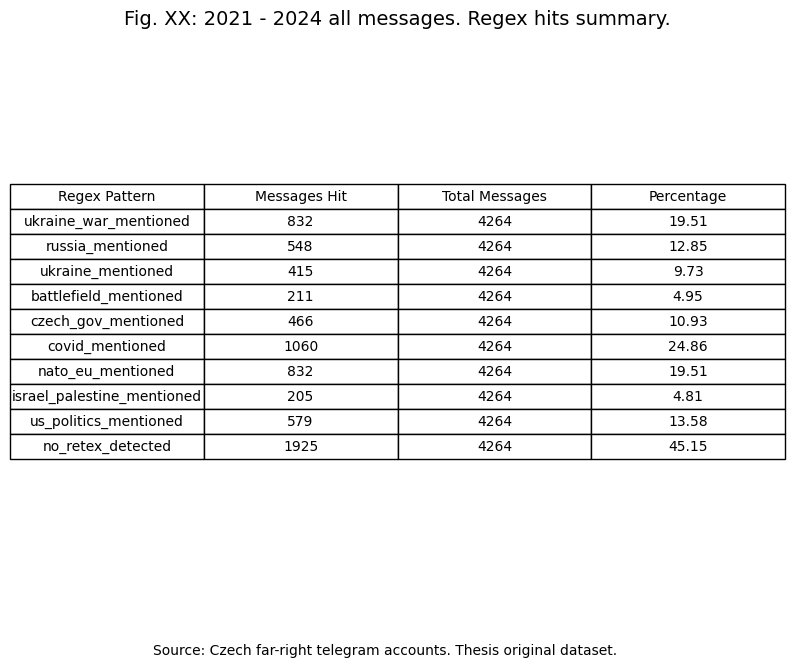

Regex hits summary table saved to /content/drive/My Drive/Colab_Data_6/export/8_plots/regex_hits_summary.png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

combined_file = os.path.join(pre_BERT_final_folder, "with_mentions_ALL.csv")
df_all = pd.read_csv(combined_file, low_memory=False)

mention_columns = [
    'ukraine_war_mentioned',
    'russia_mentioned',
    'ukraine_mentioned',
    'battlefield_mentioned',
    'czech_gov_mentioned',
    'covid_mentioned',
    'nato_eu_mentioned',
    'israel_palestine_mentioned',
    'us_politics_mentioned',
    'no_retex_detected'
]

regex_counts = {}
total_messages = len(df_all)
for col in mention_columns:
    if col in df_all.columns:
        regex_counts[col] = df_all[col].sum()
    else:
        regex_counts[col] = 0

summary_df = pd.DataFrame(
    list(regex_counts.items()),
    columns=["Regex Pattern", "Messages Hit"]
)
summary_df["Total Messages"] = total_messages
summary_df["Percentage"] = (summary_df["Messages Hit"] / total_messages * 100).round(2)

print(summary_df)

fig, ax = plt.subplots(figsize=(10, 2 + 0.5 * len(summary_df)))
ax.axis('tight')
ax.axis('off')
ax.set_title("Fig. XX: 2021 - 2024 all messages. Regex hits summary.", fontsize=14,  pad=20)
table = ax.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.figtext(0.5, 0.02,
            "Source: Czech far-right telegram accounts. Thesis original dataset.",
            ha='center', fontsize=10)
output_path = os.path.join(plots_accounts_folder, "regex_hits_summary.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Regex hits summary table saved to {output_path}")


                Regex Pattern  Messages Hit  Total Messages  Percentage
0       ukraine_war_mentioned           828            3903       21.21
1            russia_mentioned           544            3903       13.94
2           ukraine_mentioned           413            3903       10.58
3       battlefield_mentioned           210            3903        5.38
4         czech_gov_mentioned           450            3903       11.53
5             covid_mentioned          1050            3903       26.90
6           nato_eu_mentioned           828            3903       21.21
7  israel_palestine_mentioned           194            3903        4.97
8       us_politics_mentioned           572            3903       14.66
9           no_retex_detected          1591            3903       40.76


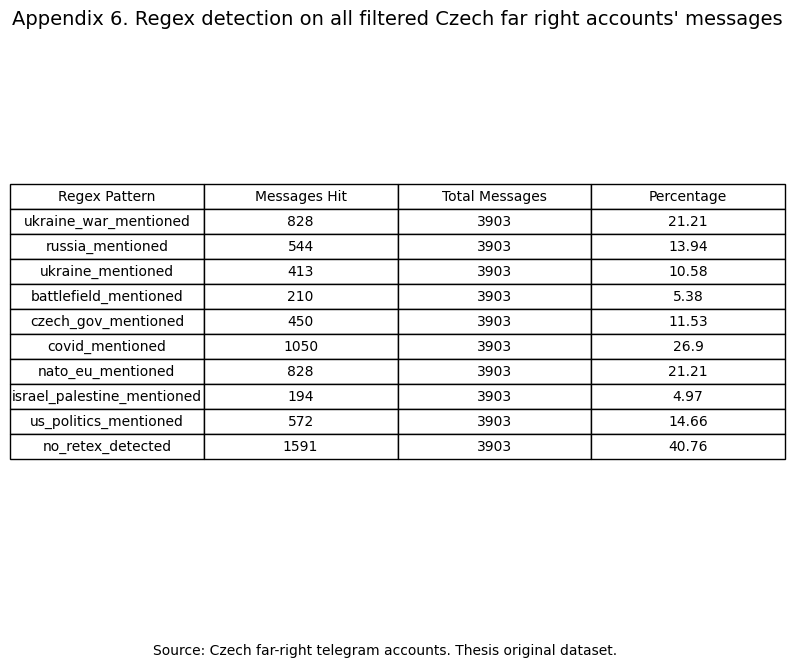

Regex hits summary table saved to /content/drive/My Drive/Colab_Data_6/export/8_plots/1_1_regex_hits_summary.png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

combined_file = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")
df_all = pd.read_csv(combined_file, low_memory=False)

mention_columns = [
    'ukraine_war_mentioned',
    'russia_mentioned',
    'ukraine_mentioned',
    'battlefield_mentioned',
    'czech_gov_mentioned',
    'covid_mentioned',
    'nato_eu_mentioned',
    'israel_palestine_mentioned',
    'us_politics_mentioned',
    'no_retex_detected'
]

regex_counts = {}
total_messages = len(df_all)
for col in mention_columns:
    if col in df_all.columns:
        regex_counts[col] = df_all[col].sum()
    else:
        regex_counts[col] = 0

summary_df = pd.DataFrame(
    list(regex_counts.items()),
    columns=["Regex Pattern", "Messages Hit"]
)
summary_df["Total Messages"] = total_messages
summary_df["Percentage"] = (summary_df["Messages Hit"] / total_messages * 100).round(2)

print(summary_df)

fig, ax = plt.subplots(figsize=(10, 2 + 0.5 * len(summary_df)))
ax.axis('tight')
ax.axis('off')
ax.set_title("Appendix 6. Regex detection on all filtered Czech far right accounts' messages", fontsize=14,  pad=20)
table = ax.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.figtext(0.5, 0.02,
            "Source: Czech far-right telegram accounts. Thesis original dataset.",
            ha='center', fontsize=10)
output_path = os.path.join(plots_accounts_folder, "1_1_regex_hits_summary.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Regex hits summary table saved to {output_path}")

                Regex Pattern  Messages Hit  Total Messages  Percentage
0       ukraine_war_mentioned             8             651        1.23
1            russia_mentioned             7             651        1.08
2           ukraine_mentioned             0             651        0.00
3       battlefield_mentioned             1             651        0.15
4         czech_gov_mentioned            35             651        5.38
5             covid_mentioned           428             651       65.75
6           nato_eu_mentioned           127             651       19.51
7  israel_palestine_mentioned            11             651        1.69
8       us_politics_mentioned            52             651        7.99
9           no_retex_detected           182             651       27.96


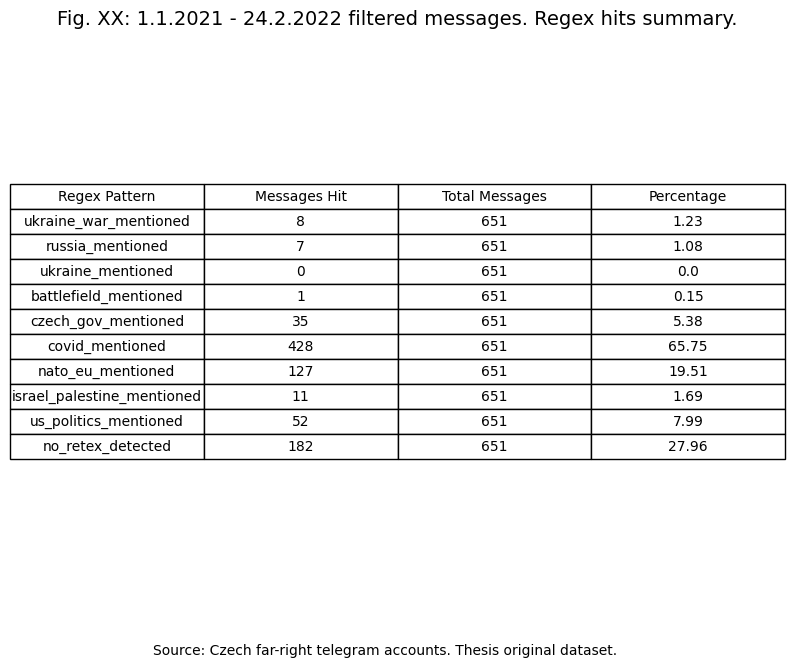

Regex hits summary table saved to /content/drive/My Drive/Colab_Data_6/export/8_plots/2_1_regex_hits_summary.png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

combined_file = os.path.join(pre_BERT_final_folder, "2_1_with_mentions_pre-War.csv")
df_all = pd.read_csv(combined_file, low_memory=False)

mention_columns = [
    'ukraine_war_mentioned',
    'russia_mentioned',
    'ukraine_mentioned',
    'battlefield_mentioned',
    'czech_gov_mentioned',
    'covid_mentioned',
    'nato_eu_mentioned',
    'israel_palestine_mentioned',
    'us_politics_mentioned',
    'no_retex_detected'
]

regex_counts = {}
total_messages = len(df_all)
for col in mention_columns:
    if col in df_all.columns:
        regex_counts[col] = df_all[col].sum()
    else:
        regex_counts[col] = 0

summary_df = pd.DataFrame(
    list(regex_counts.items()),
    columns=["Regex Pattern", "Messages Hit"]
)
summary_df["Total Messages"] = total_messages
summary_df["Percentage"] = (summary_df["Messages Hit"] / total_messages * 100).round(2)

print(summary_df)

fig, ax = plt.subplots(figsize=(10, 2 + 0.5 * len(summary_df)))
ax.axis('tight')
ax.axis('off')
ax.set_title("Fig. XX: 1.1.2021 - 24.2.2022 filtered messages. Regex hits summary.", fontsize=14,  pad=20)
table = ax.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.figtext(0.5, 0.02,
            "Source: Czech far-right telegram accounts. Thesis original dataset.",
            ha='center', fontsize=10)

output_path = os.path.join(plots_accounts_folder, "2_1_regex_hits_summary.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Regex hits summary table saved to {output_path}")

                Regex Pattern  Messages Hit  Total Messages  Percentage
0       ukraine_war_mentioned            66             172       38.37
1            russia_mentioned            35             172       20.35
2           ukraine_mentioned            45             172       26.16
3       battlefield_mentioned            14             172        8.14
4         czech_gov_mentioned            26             172       15.12
5             covid_mentioned            46             172       26.74
6           nato_eu_mentioned            32             172       18.60
7  israel_palestine_mentioned            14             172        8.14
8       us_politics_mentioned            32             172       18.60
9           no_retex_detected            52             172       30.23


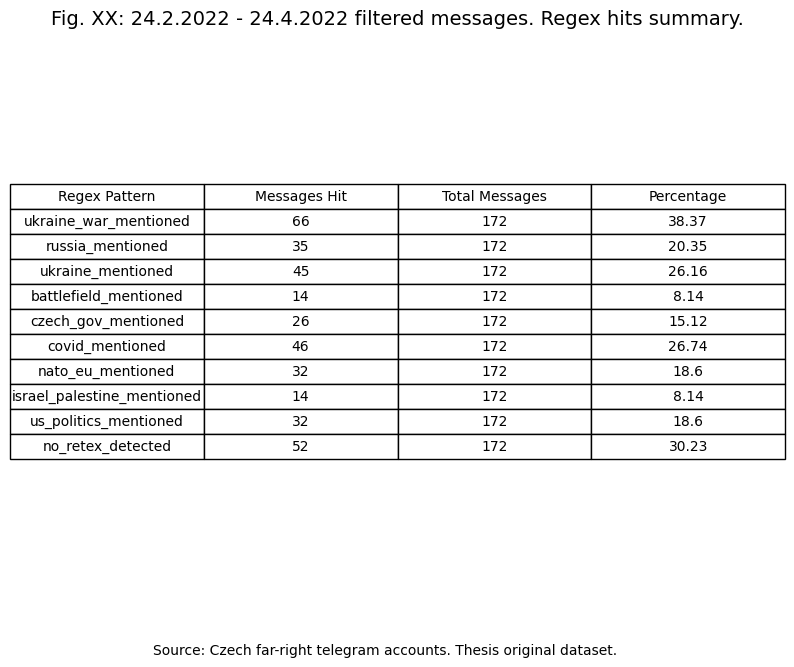

Regex hits summary table saved to /content/drive/My Drive/Colab_Data_6/export/8_plots/3_1_regex_hits_summary.png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

combined_file = os.path.join(pre_BERT_final_folder, "3_1_with_mentions_two_months.csv")
df_all = pd.read_csv(combined_file, low_memory=False)

mention_columns = [
    'ukraine_war_mentioned',
    'russia_mentioned',
    'ukraine_mentioned',
    'battlefield_mentioned',
    'czech_gov_mentioned',
    'covid_mentioned',
    'nato_eu_mentioned',
    'israel_palestine_mentioned',
    'us_politics_mentioned',
    'no_retex_detected'
]

regex_counts = {}
total_messages = len(df_all)
for col in mention_columns:
    if col in df_all.columns:
        regex_counts[col] = df_all[col].sum()
    else:
        regex_counts[col] = 0

summary_df = pd.DataFrame(
    list(regex_counts.items()),
    columns=["Regex Pattern", "Messages Hit"]
)
summary_df["Total Messages"] = total_messages
summary_df["Percentage"] = (summary_df["Messages Hit"] / total_messages * 100).round(2)

print(summary_df)

fig, ax = plt.subplots(figsize=(10, 2 + 0.5 * len(summary_df)))
ax.axis('tight')
ax.axis('off')
ax.set_title("Fig. XX: 24.2.2022 - 24.4.2022 filtered messages. Regex hits summary.", fontsize=14,  pad=20)
table = ax.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.figtext(0.5, 0.02,
            "Source: Czech far-right telegram accounts. Thesis original dataset.",
            ha='center', fontsize=10)

output_path = os.path.join(plots_accounts_folder, "3_1_regex_hits_summary.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Regex hits summary table saved to {output_path}")

# GPU Part 13.1.1 BERTopic all czech & slovak original messages

## GPU BERTopic full

In [ ]:
!pip install bertopic

import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", model_kwargs={"torch_dtype": "float16"}, device=device)


umap_model = UMAP(
    n_neighbors=25,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)


hdbscan_model = HDBSCAN(
    min_cluster_size=500,
    min_samples=70,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

vectorizer_model = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_features=50000
)

representation_model = {
    "KeyBERT": KeyBERTInspired(),
    "MMR": MaximalMarginalRelevance(diversity=0.3),
    "POS": PartOfSpeech("en_core_web_sm"),
}

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    verbose=True,
    min_topic_size=300,
    low_memory=True
)

all_translated_text_data = []
all_dates = []

file_path = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")

try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df
    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

if not all_translated_text_data:
    raise ValueError("No data found to process. Ensure 'translated_text' has valid entries.")

print("Fitting BERTopic model...")
print(f"Number of documents: {len(all_translated_text_data)}")
print(f"Sample data: {all_translated_text_data[:5]}")

topics, probabilities = topic_model.fit_transform(all_translated_text_data)

filtered_df['topics'] = topics

model_save_path = os.path.join(BERTopic_messages_folder, "1_1_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")

del all_translated_text_data
gc.collect()

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "1_1_02_with_mentions_filtered_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)


Cleaned up GPU memory.
Using device: cuda
Loading data from: /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/1_1_with_mentions_filtered.csv


2025-04-15 12:53:44,897 - BERTopic - Embedding - Transforming documents to embeddings.


Fitting BERTopic model...
Number of documents: 3903
Sample data: ['Will there be war? The question of the death penalty. One-colored Babiš? Who manipulates the weather? Kiev Nazis celebrate Bandera, broadcast by Petr Hálek', 'Peeiness: The typical property of the Krussians. Fico, Orbán and Trump do not shut up. Even Russia does not drink the West with a roll anymore. Exterminate Nazism', "Dreams and awakenings: When there's nothing left to pillage, hangovers come. Why is Big Donald going to war? The beginning of normalization?", "New Year's Eve: Who do we remember? A key moment of history, the greatest beauty and wealth in the world. False Poverty? Modern Judas Time", 'He refused to lie: He sacrificed his career. They play a terrifying game with the weather. What are they pouring on our heads from airplanes? Weather like a war weapon.']


Batches:   0%|          | 0/122 [00:00<?, ?it/s]

2025-04-15 12:53:46,298 - BERTopic - Embedding - Completed ✓
2025-04-15 12:53:46,300 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-15 12:54:11,632 - BERTopic - Dimensionality - Completed ✓
2025-04-15 12:54:11,633 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-15 12:54:11,844 - BERTopic - Cluster - Completed ✓
2025-04-15 12:54:11,848 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-15 12:54:13,033 - BERTopic - Representation - Completed ✓
2025-04-15 12:54:13,077 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


BERTopic model saved to /content/drive/My Drive/Colab_Data_6/export/13_BERTopic_messages/1_1_00_bertopic_model


In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "1_1_00_bertopic_model")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "1_1_02_with_mentions_filtered_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

Cleaned up GPU memory.
Using device: cuda
Loading data from: /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/1_1_with_mentions_filtered.csv


In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "1_1_02_with_mentions_filtered_topic_info.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "1_1_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


Processing topic 1: Topic ID -1
Processing topic 2: Topic ID 0
Keywords: ['war', 'ukraine', 'russia', 'kiev', 'ukrainian', 'russian', 'political', 'crisis', '2023', '2024']
Documents: ['American hawks are pushing the world into World War III: Another 100 billion Kiev? Main media are already preparing Americans: Nuclear attack on the US? No need to be afraid! Just go down to the basement and hide your head! From the madhouse straight to the government or to the media...', "We're overpopulation, we have to reduce the population of the free-life, and we're not really going to save the planet! Because it wouldn't have been so much solved if there were less energy, water, food and resources for everyone, right? Not so fast. Imagine that you're the world's rulers, and you want to keep your power over the world at all costs. Just hypothetically wouldn't it be advantageous for you if you were between people to sow and strengthen the idea that there are people in the world too much and that a l

2025-04-15 12:54:20,989 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


Generated Label: Controversies Surrounding COVID-19 Vaccination and Treatment

   Topic  Count                                  Name  \
0     -1     15           -1_tea_00 live_00_allow tea   
1      0   3154             0_world_war_russia_people   
2      1    734  1_covid_vaccination_vaccine_vaccines   

                                          CustomName  \
0                                      Outlier Topic   
1  Escalating Tensions: Ukraine, Russia, and Glob...   
2  Controversies Surrounding COVID-19 Vaccination...   

                                      Representation  \
0  [tea, 00 live, 00, allow tea, live, allow, cou...   
1  [world, war, russia, people, government, czech...   
2  [covid, vaccination, vaccine, vaccines, video,...   

                                             KeyBERT  \
0  [allow tea, tea counterstream, tea anti, tea, ...   
1  [war, ukraine, russia, kiev, ukrainian, russia...   
2  [covid vaccines, covid, vaccine, vaccines, vac...   

                 

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,CustomName,Representation,KeyBERT,MMR,POS,Representative_Docs
0,-1,15,-1_tea_00 live_00_allow tea,Outlier Topic,"[tea, 00 live, 00, allow tea, live, allow, cou...","[allow tea, tea counterstream, tea anti, tea, ...","[tea, 00 live, allow tea, counter, monday, tea...","[tea, live, counter, current, party, counterst...",[Do not allow tea in counter current: From 6:0...
1,0,3154,0_world_war_russia_people,"Escalating Tensions: Ukraine, Russia, and Glob...","[world, war, russia, people, government, czech...","[war, ukraine, russia, kiev, ukrainian, russia...","[russia, government, czech, ukraine, 2023, kie...","[world, war, people, government, czech, new, v...",[American hawks are pushing the world into Wor...
2,1,734,1_covid_vaccination_vaccine_vaccines,Controversies Surrounding COVID-19 Vaccination...,"[covid, vaccination, vaccine, vaccines, video,...","[covid vaccines, covid, vaccine, vaccines, vac...","[vaccination, vaccine, video, life life, covid...","[covid, vaccination, vaccine, vaccines, video,...",[Dr. McCullough's top doctor shares his experi...


## GPU BERTopic full Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "1_1_01_with_mentions_filtered_topics_doc_info.csv"), index=False)

In [ ]:

topic_info = topic_model.get_topic_info()
topic_info

topic_info_file = os.path.join(BERTopic_messages_folder, "1_1_02_with_mentions_filtered_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")


filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "1_1_03_with_mentions_filtered_BERTopic.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "1_1_04_with_mentions_filtered_with_keywords.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

Topic information saved to /content/drive/My Drive/Colab_Data_6/export/13_BERTopic_messages/1_1_02_with_mentions_filtered_topic_info.csv
BERTopic results saved to /content/drive/My Drive/Colab_Data_6/export/13_BERTopic_messages/1_1_03_with_mentions_filtered_BERTopic.csv
BERTopic results with keywords saved to /content/drive/My Drive/Colab_Data_6/export/13_BERTopic_messages/1_1_04_with_mentions_filtered_with_keywords.csv


In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_05_with_mentions_filtered_topics_hierarchy.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 filtered messages. Topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_05_with_mentions_filtered_topics_hierarchy.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

Topics visualization saved to /content/drive/My Drive/Colab_Data_6/export/14_BERTopic_plots/1_1_05_with_mentions_filtered_topics_hierarchy.html
Updated Topics per class visualization saved to /content/drive/My Drive/Colab_Data_6/export/14_BERTopic_plots/1_1_05_with_mentions_filtered_topics_hierarchy.html


In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_06_with_mentions_filtered_topics_heatmap.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 11. 2021 to 2024 messages. BERTopic topics heatmap'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_06_with_mentions_filtered_topics_heatmap.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

Topics visualization saved to /content/drive/My Drive/Colab_Data_6/export/14_BERTopic_plots/1_1_06_with_mentions_filtered_topics_heatmap.html
Updated Topics per class visualization saved to /content/drive/My Drive/Colab_Data_6/export/14_BERTopic_plots/1_1_06_with_mentions_filtered_topics_heatmap.html


In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_07_with_mentions_filtered_topics_barchart.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 filtered messages. Topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_07_with_mentions_filtered_topics_barchart.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

Topics visualization saved to /content/drive/My Drive/Colab_Data_6/export/14_BERTopic_plots/1_1_07_with_mentions_filtered_topics_barchart.html
Updated Topics per class visualization saved to /content/drive/My Drive/Colab_Data_6/export/14_BERTopic_plots/1_1_07_with_mentions_filtered_topics_barchart.html


In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

/usr/local/lib/python3.11/dist-packages/umap/spectral.py:519: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [ ]:

docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "1_1_08_with_mentions_filtered_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 12. 2021 to 2024 messages. BERTopic topic documents'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://osf.io/8tdma/?view_only=c5765ac2ee4246fc935610de212aed30. Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:

docs = filtered_df['translated_text'].tolist()
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_09_with_mentions_filtered_hierarchical_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 filtered messages. Topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available in annex of thesis.  Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

2025-04-15 12:55:07,149 - BERTopic - WARNING: No c-TF-IDF matrix was found despite it is supposed to be used (`use_ctfidf` is True). Defaulting to semantic embeddings.


TypeError: 'NoneType' object is not subscriptable

In [ ]:

filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "1_1_10_with_mentions_filtered_topics_over_time.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:20px; text-align:center; margin-bottom:20px;">'
    'Appendix 10. 2021 to 2024 messages. BERTopic topics over time'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_10_with_mentions_filtered_topics_over_time.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


InvalidParameterError: The 'X' parameter of normalize must be an array-like or a sparse matrix. Got None instead.

In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_11_with_mentions_filtered_topics_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:20px; text-align:center; margin-bottom:20px;">'
    'Figure 7. 2021 to 2024 messages. BERTopic intertopic distance map'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_11_with_mentions_filtered_topics_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

AttributeError: 'NoneType' object has no attribute 'keys'

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "1_1_12_with_mentions_filtered_topics_per_class_visualization.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 filtered mentions. Topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_12_with_mentions_filtered_topics_per_class_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


InvalidParameterError: The 'X' parameter of normalize must be an array-like or a sparse matrix. Got None instead.

## GPU BERTopic reduced

In [ ]:
import os
import pandas as pd
from bertopic import BERTopic

csv_file = os.path.join(BERTopic_messages_folder, "1_1_03_with_mentions_filtered_BERTopic.csv")

desired_topic_count = 20

print("Loading documents from CSV...")
df = pd.read_csv(csv_file, low_memory=False)

if 'translated_text' not in df.columns:
    raise ValueError("Column 'translated_text' not found in the CSV file.")

documents = df['translated_text'].tolist()
print(f"Loaded {len(documents)} documents.")

print(f"Reducing topics to {desired_topic_count} topics...")
topic_model = topic_model.reduce_topics(documents, nr_topics=desired_topic_count)
print("Topic reduction complete.")

topic_model_save_path = os.path.join(BERTopic_messages_folder, "1_1_00r_bertopic_model_reduced")
topic_model.save(topic_model_save_path)
print(f"Reduced model saved to {topic_model_save_path}.")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "1_1_02r_with_mentions_filtered_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

print("Topics after reduction:")
print(topic_model.get_topic_info())

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "1_1_00r_bertopic_model_reduced")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()
except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "1_1_02r_with_mentions_filtered_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "1_1_02r_with_mentions_filtered_topic_info_reduced.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "1_1_00r_bertopic_model_reduced")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic reduced Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "1_1_01r_with_mentions_filtered_topics_doc_info_reduced.csv"), index=False)

In [ ]:

topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "1_1_02r_with_mentions_filtered_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "1_1_03r_with_mentions_filtered_BERTopic_reduced.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "1_1_04r_with_mentions_filtered_with_keywords_reduced.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_05r_with_mentions_filtered_topics_hierarchy_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 filtered messages. Reduced topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_05r_with_mentions_filtered_topics_hierarchy_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_06r_with_mentions_filtered_topics_heatmap_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:20px;">'
    'Figure 6. 2021 to 2024 messages. BERTopic reduced topics heatmap'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_06r_with_mentions_filtered_topics_heatmap_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_07r_with_mentions_filtered_topics_barchart_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 filtered messages. Reduced topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_07r_with_mentions_filtered_topics_barchart_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "1_1_08r_with_mentions_filtered_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 filtered messages. Reduced topic documents visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available in annex of thesis.  Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
docs = filtered_df['translated_text'].tolist()
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_09r_with_mentions_filtered_hierarchical_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 filtered messages. Reduced topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available in annex of thesis. Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "1_1_10r_with_mentions_filtered_topics_over_time_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:26px;">'
    'Figure 5. 2021 to 2024 messages. BERTopic reduced topics over time'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_10r_with_mentions_filtered_topics_over_time_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_1_11r_with_mentions_filtered_topics_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 filtered messages. Reduced topics visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_11r_with_mentions_filtered_topics_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "1_1_12r_with_mentions_filtered_topics_per_class_visualization_reduced.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 13. 2021 to 2024 messages. BERTopic reduced topics per Class'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_1_12r_with_mentions_filtered_topics_per_class_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)

html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


# GPU Part 13.1.2 BERTopic all only-ukraine czech & slovak original messages

## GPU BERTopic full

In [ ]:
!pip install bertopic

import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", model_kwargs={"torch_dtype": "float16"}, device=device)

umap_model = UMAP(
    n_neighbors=45,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

hdbscan_model = HDBSCAN(
    min_cluster_size=300,
    min_samples=70,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

vectorizer_model = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_features=50000
)

representation_model = {
    "KeyBERT": KeyBERTInspired(),
    "MMR": MaximalMarginalRelevance(diversity=0.3),
    "POS": PartOfSpeech("en_core_web_sm"),
}

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    verbose=True,
    min_topic_size=250,
    low_memory=True
)

all_translated_text_data = []
all_dates = []

file_path = os.path.join(pre_BERT_final_folder, "1_2_with_mentions_filtered_only-ukraine.csv")

try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

if not all_translated_text_data:
    raise ValueError("No data found to process. Ensure 'translated_text' has valid entries.")

print("Fitting BERTopic model...")
print(f"Number of documents: {len(all_translated_text_data)}")
print(f"Sample data: {all_translated_text_data[:5]}")

topics, probalities = topic_model.fit_transform(all_translated_text_data)

filtered_df['topics'] = topics

model_save_path = os.path.join(BERTopic_messages_folder, "1_2_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "1_2_02_with_mentions_filtered_only-ukraine_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

del all_translated_text_data
gc.collect()

Cleaned up GPU memory.
Using device: cuda


2025-04-15 12:54:34,297 - BERTopic - Embedding - Transforming documents to embeddings.


Loading data from: /content/drive/My Drive/Colab_Data_6/export/12_pre_BERT_final/1_2_with_mentions_filtered_only-ukraine.csv
Fitting BERTopic model...
Number of documents: 828
Sample data: ['Peeiness: The typical property of the Krussians. Fico, Orbán and Trump do not shut up. Even Russia does not drink the West with a roll anymore. Exterminate Nazism', 'Russia moves fast at Donbas: the West is losing. Will there be negotiations with Trump in Bratislava? Russia will not back down from its demands', 'They say there is no terror like terror: The Amoral West is no longer ashamed of its disgust. A good Russian just a dead Russian? A truce? Out of the question!', 'Do not irritate the Russian bear: Terrorist material Řehka, Hasalay and Foltýna. But tell the purple idiots, warns Michal Svatoš', "Putin's Humour: Do you want to test PVO? We are ready. Syria's Part. We will not deal with Kiev's Nazis, sums up Peter Nagy"]


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

2025-04-15 12:54:34,588 - BERTopic - Embedding - Completed ✓
2025-04-15 12:54:34,589 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-15 12:54:37,823 - BERTopic - Dimensionality - Completed ✓
2025-04-15 12:54:37,824 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-15 12:54:37,868 - BERTopic - Cluster - Completed ✓
2025-04-15 12:54:37,872 - BERTopic - Representation - Fine-tuning topics using representation models.


ValueError: max_df corresponds to < documents than min_df

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "1_2_00_bertopic_model")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "1_2_with_mentions_filtered_only-ukraine.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "1_2_02_with_mentions_filtered_only-ukraine_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "1_2_02_with_mentions_filtered_only-ukraine_topic_info.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "1_2_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic full Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "1_2_01_with_mentions_filtered_only-ukraine_topics_doc_info.csv"), index=False)

In [ ]:

topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "1_2_02_with_mentions_filtered_only-ukraine_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "1_2_03_with_mentions_filtered_only-ukraine_BERTopic.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "1_2_04_with_mentions_filtered_only-ukraine_with_keywords.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_05_with_mentions_filtered_only-ukraine_topics_hierarchy.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_05_with_mentions_filtered_only-ukraine_topics_hierarchy.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_06_with_mentions_filtered_only-ukraine_topics_heatmap.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 15. 2021 to 2024 regex Ukraine war messages. BERTopic topics heatmap'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_06_with_mentions_filtered_only-ukraine_topics_heatmap.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_07_with_mentions_filtered_only-ukraine_topics_barchart.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_07_with_mentions_filtered_only-ukraine_topics_barchart.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:

docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "1_2_08_with_mentions_filtered_only-ukraine_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 16. 2021 to 2024 regex Ukraine war messages. BERTopic topic documents'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at:https://osf.io/8tdma/?view_only=c5765ac2ee4246fc935610de212aed30  Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:

hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_09_with_mentions_filtered_only-ukraine_hierarchical_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available in annex of thesis. Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:

filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "1_2_10_with_mentions_filtered_only-ukraine_topics_over_time.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 14. 2021 to 2024 regex Ukraine war messages. BERTopic topics over time'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_10_with_mentions_filtered_only-ukraine_topics_over_time.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_11_with_mentions_filtered_only-ukraine_topics_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Figure 10. 2021 to 2024 regex Ukraine war messages. Intertopic distance map'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_11_with_mentions_filtered_only-ukraine_topics_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "1_2_12_with_mentions_filtered_only-ukraine_topics_per_class_visualization.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_12_with_mentions_filtered_only-ukraine_topics_per_class_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


## GPU BERTopic reduced

In [ ]:
import os
import pandas as pd
from bertopic import BERTopic

csv_file = os.path.join(BERTopic_messages_folder, "1_2_03_with_mentions_filtered_only-ukraine_BERTopic.csv")

desired_topic_count = 20

print("Loading documents from CSV...")
df = pd.read_csv(csv_file, low_memory=False)

if 'translated_text' not in df.columns:
    raise ValueError("Column 'translated_text' not found in the CSV file.")

documents = df['translated_text'].tolist()
print(f"Loaded {len(documents)} documents.")

print(f"Reducing topics to {desired_topic_count} topics...")
topic_model = topic_model.reduce_topics(documents, nr_topics=desired_topic_count)
print("Topic reduction complete.")

topic_model_save_path = os.path.join(BERTopic_messages_folder, "1_2_00r_bertopic_model_reduced")
topic_model.save(topic_model_save_path)
print(f"Reduced model saved to {topic_model_save_path}.")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "1_2_02r_with_mentions_filtered_only-ukraine_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

print("Topics after reduction:")
print(topic_model.get_topic_info())

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "1_2_00r_bertopic_model_reduced")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "1_2_with_mentions_filtered_only-ukraine.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()
except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "1_2_02r_with_mentions_filtered_only-ukraine_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "1_2_02r_with_mentions_filtered_only-ukraine_topic_info_reduced.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "1_2_00r_bertopic_model_reduced")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic reduced Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "1_2_01r_with_mentions_filtered_only-ukraine_topics_doc_info_reduced.csv"), index=False)

In [ ]:

topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "1_2_02r_with_mentions_filtered_only-ukraine_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "1_2_03r_with_mentions_filtered_only-ukraine_BERTopic_reduced.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "1_2_04r_with_mentions_filtered_only-ukraine_with_keywords_reduced.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_05r_with_mentions_filtered_only-ukraine_topics_hierarchy_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Reduced topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_05r_with_mentions_filtered_only-ukraine_topics_hierarchy_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_06r_with_mentions_filtered_only-ukraine_topics_heatmap_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Figure 9. 2021 to 2024 regex Ukraine war messages. Reduced topics heatmap'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_06r_with_mentions_filtered_only-ukraine_topics_heatmap_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_07r_with_mentions_filtered_only-ukraine_topics_barchart_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Reduced topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_07r_with_mentions_filtered_only-ukraine_topics_barchart_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "1_2_08r_with_mentions_filtered_only-ukraine_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Reduced topic documents visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available in annex of thesis. Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_09r_with_mentions_filtered_only-ukraine_hierarchical_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Reduced topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available in annex of thesis. Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "1_2_10r_with_mentions_filtered_only-ukraine_topics_over_time_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Figure 8. 2021 to 2024 regex Ukraine war messages. Reduced topics over time'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_10r_with_mentions_filtered_only-ukraine_topics_over_time_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "1_2_11r_with_mentions_filtered_only-ukraine_topics_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Reduced topics visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_11r_with_mentions_filtered_only-ukraine_topics_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "1_2_12r_with_mentions_filtered_only-ukraine_topics_per_class_visualization_reduced.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 2021 - 2024 ukraine only messages. Reduced topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/1_2_12r_with_mentions_filtered_only-ukraine_topics_per_class_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


# GPU Part 13.2.1 BERTopic pre-War czech & slovak original messages

## GPU BERTopic full

In [ ]:
!pip install bertopic

import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", model_kwargs={"torch_dtype": "float16"}, device=device)

umap_model = UMAP(
    n_neighbors=25,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

hdbscan_model = HDBSCAN(
    min_cluster_size=50,
    min_samples=10,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

vectorizer_model = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_features=20000
)

representation_model = {
    "KeyBERT": KeyBERTInspired(),
    "MMR": MaximalMarginalRelevance(diversity=0.3),
    "POS": PartOfSpeech("en_core_web_sm"),
}

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    verbose=True,
    min_topic_size=50,
    low_memory=True
)

all_translated_text_data = []
all_dates = []

file_path = os.path.join(pre_BERT_final_folder, "2_1_with_mentions_pre-War.csv")

try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

if not all_translated_text_data:
    raise ValueError("No data found to process. Ensure 'translated_text' has valid entries.")

print("Fitting BERTopic model...")
print(f"Number of documents: {len(all_translated_text_data)}")
print(f"Sample data: {all_translated_text_data[:5]}")

topics, probabilities = topic_model.fit_transform(all_translated_text_data)

model_save_path = os.path.join(BERTopic_messages_folder, "2_1_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")

del all_translated_text_data
gc.collect()

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "2_1_02_with_mentions_pre-War_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "2_1_00_bertopic_model")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "2_1_with_mentions_pre-War.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "2_1_02_with_mentions_pre-War_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "2_1_02_with_mentions_pre-War_topic_info.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "2_1_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic full Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "2_1_01_with_mentions_pre-War_topics_doc_info.csv"), index=False)

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "2_1_02_with_mentions_pre-War_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "2_1_03_with_mentions_pre-War_BERTopic.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "2_1_04_with_mentions_pre-War_with_keywords.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_05_with_mentions_pre-War_topics_hierarchy.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_05_with_mentions_pre-War_topics_hierarchy.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_06_with_mentions_pre-War_topics_heatmap.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Topics heatmap.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_06_with_mentions_pre-War_topics_heatmap.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_07_with_mentions_pre-War_topics_barchart.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_07_with_mentions_pre-War_topics_barchart.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "2_1_08_with_mentions_pre-War_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Topic documents visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_08_with_mentions_pre-War_documents_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_09_with_mentions_pre-War_hierarchical_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_09_with_mentions_pre-War_hierarchical_documents_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "2_1_10_with_mentions_pre-War_topics_over_time.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Topics over time.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_10_with_mentions_pre-War_topics_over_time.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_11_with_mentions_pre-War_topics_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Figure 12. 1.1.2021 to 24.2.2022 messages. Intertopic distance map.'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_11_with_mentions_pre-War_topics_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "2_1_12_with_mentions_pre-War_topics_per_class_visualization.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_12_with_mentions_pre-War_topics_per_class_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


## GPU BERTopic reduced

In [ ]:
import os
import pandas as pd
from bertopic import BERTopic

csv_file = os.path.join(BERTopic_messages_folder, "2_1_03_with_mentions_pre-War_BERTopic.csv")

desired_topic_count = 20

print("Loading documents from CSV...")
df = pd.read_csv(csv_file, low_memory=False)

if 'translated_text' not in df.columns:
    raise ValueError("Column 'translated_text' not found in the CSV file.")

documents = df['translated_text'].tolist()
print(f"Loaded {len(documents)} documents.")

print(f"Reducing topics to {desired_topic_count} topics...")
topic_model = topic_model.reduce_topics(documents, nr_topics=desired_topic_count)
print("Topic reduction complete.")

topic_model_save_path = os.path.join(BERTopic_messages_folder, "2_1_00r_bertopic_model_reduced")
topic_model.save(topic_model_save_path)
print(f"Reduced model saved to {topic_model_save_path}.")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "2_1_02r_with_mentions_pre-War_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

print("Topics after reduction:")
print(topic_model.get_topic_info())

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "2_1_00r_bertopic_model_reduced")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "2_1_with_mentions_pre-War.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()
except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "2_1_02r_with_mentions_pre-War_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "2_1_02r_with_mentions_pre-War_topic_info_reduced.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "2_1_00r_bertopic_model_reduced")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic reduced Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "2_1_01r_with_mentions_pre-War_topics_doc_info_reduced.csv"), index=False)

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "2_1_02r_with_mentions_pre-War_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "2_1_03r_with_mentions_pre-War_BERTopic_reduced.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "2_1_04r_with_mentions_pre-War_with_keywords_reduced.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_05r_with_mentions_pre-War_topics_hierarchy_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Reduced topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_05r_with_mentions_pre-War_topics_hierarchy_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_06r_with_mentions_pre-War_topics_heatmap_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Reduced topics heatmap.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_06r_with_mentions_pre-War_topics_heatmap_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_07r_with_mentions_pre-War_topics_barchart_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Reduced topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_07r_with_mentions_pre-War_topics_barchart_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "2_1_08r_with_mentions_pre-War_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 18. 1.1.2021 to 24.2.2022 messages. Reduced topic documents'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_08r_with_mentions_pre-War_documents_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_09r_with_mentions_pre-War_hierarchical_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Reduced topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at:https://monnietaken.github.io/czech_far_right_telegram/2_1_09r_with_mentions_pre-War_hierarchical_documents_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "2_1_10r_with_mentions_pre-War_topics_over_time_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Figure 11. 1.1.2021 to 24.2.2022 messages. Reduced topics over time'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_10r_with_mentions_pre-War_topics_over_time_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_1_11r_with_mentions_pre-War_topics_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Reduced topics visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_11r_with_mentions_pre-War_topics_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "2_1_12r_with_mentions_pre-War_topics_per_class_visualization_reduced.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 messages. Reduced topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_1_12r_with_mentions_pre-War_topics_per_class_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


# GPU Part 13.2.2 BERTopic pre-War only-ukraine czech & slovak original messages

## GPU BERTopic full

In [ ]:
!pip install bertopic

import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", model_kwargs={"torch_dtype": "float16"}, device=device)

umap_model = UMAP(
    n_neighbors=10,
    n_components=5,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)

hdbscan_model = HDBSCAN(
    min_cluster_size=25,
    min_samples=5,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

vectorizer_model = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_features=20000
)

representation_model = {
    "KeyBERT": KeyBERTInspired(),
    "MMR": MaximalMarginalRelevance(diversity=0.3),
    "POS": PartOfSpeech("en_core_web_sm"),
}

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    verbose=True,
    min_topic_size=10,
    low_memory=True
)

all_translated_text_data = []
all_dates = []

file_path = os.path.join(pre_BERT_final_folder, "2_2_with_mentions_pre-War_only-ukraine.csv")

try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

if not all_translated_text_data:
    raise ValueError("No data found to process. Ensure 'translated_text' has valid entries.")

print("Fitting BERTopic model...")
print(f"Number of documents: {len(all_translated_text_data)}")
print(f"Sample data: {all_translated_text_data[:5]}")

topics, probabilities = topic_model.fit_transform(all_translated_text_data)

model_save_path = os.path.join(BERTopic_messages_folder, "2_2_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "2_2_02_with_mentions_pre-War_only-ukraine_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

del all_translated_text_data
gc.collect()

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "2_2_00_bertopic_model")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "2_2_with_mentions_pre-War_only-ukraine.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "2_2_02_with_mentions_pre-War_only-ukraine_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "2_2_02_with_mentions_pre-War_only-ukraine_topic_info.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "2_2_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic full Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "2_2_01_with_mentions_pre-War_only-ukraine_topics_doc_info.csv"), index=False)

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "2_2_02_with_mentions_pre-War_only-ukraine_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "2_2_03_with_mentions_pre-War_only-ukraine_BERTopic.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "2_2_04_with_mentions_pre-War_only-ukraine_with_keywords.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_2_05_with_mentions_pre-War_only-ukraine_topics_hierarchy.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_05_with_mentions_pre-War_only-ukraine_topics_hierarchy.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_2_06_with_mentions_pre-War_only-ukraine_topics_heatmap.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Topics heatmap.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_06_with_mentions_pre-War_only-ukraine_topics_heatmap.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_2_07_with_mentions_pre-War_only-ukraine_topics_barchart.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_07_with_mentions_pre-War_only-ukraine_topics_barchart.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "2_2_08_with_mentions_pre-War_only-ukraine_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Topic documents visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_08_with_mentions_pre-War_only-ukraine_documents_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_2_09_with_mentions_pre-War_only-ukraine_hierarchical_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_09_with_mentions_pre-War_only-ukraine_hierarchical_documents_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "2_2_10_with_mentions_pre-War_only-ukraine_topics_over_time.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 17. 1.1.2021 to 24.2.2022 regex Ukraine war messages. Topics over time'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_10_with_mentions_pre-War_only-ukraine_topics_over_time.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_2_11_with_mentions_pre-War_only-ukraine_topics_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Topics visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_11_with_mentions_pre-War_only-ukraine_topics_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "2_2_12_with_mentions_pre-War_only-ukraine_topics_per_class_visualization.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_12_with_mentions_pre-War_only-ukraine_topics_per_class_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


## GPU BERTopic reduced

In [ ]:
import os
import pandas as pd
from bertopic import BERTopic

csv_file = os.path.join(BERTopic_messages_folder, "2_2_03_with_mentions_pre-War_only-ukraine_BERTopic.csv")

desired_topic_count = 20

print("Loading documents from CSV...")
df = pd.read_csv(csv_file, low_memory=False)

if 'translated_text' not in df.columns:
    raise ValueError("Column 'translated_text' not found in the CSV file.")

documents = df['translated_text'].tolist()
print(f"Loaded {len(documents)} documents.")

print(f"Reducing topics to {desired_topic_count} topics...")
topic_model = topic_model.reduce_topics(documents, nr_topics=desired_topic_count)
print("Topic reduction complete.")

topic_model_save_path = os.path.join(BERTopic_messages_folder, "2_2_00r_bertopic_model_reduced")
topic_model.save(topic_model_save_path)
print(f"Reduced model saved to {topic_model_save_path}.")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "2_2_02r_with_mentions_pre-War_only-ukraine_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

print("Topics after reduction:")
print(topic_model.get_topic_info())

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "2_2_00r_bertopic_model_reduced")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "2_2_with_mentions_pre-War_only-ukraine.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()
except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "2_2_02r_with_mentions_pre-War_only-ukraine_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "2_2_02r_with_mentions_pre-War_only-ukraine_topic_info_reduced.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "2_2_00r_bertopic_model_reduced")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic reduced Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "2_2_01r_with_mentions_pre-War_only-ukraine_topics_doc_info_reduced.csv"), index=False)

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "2_2_02r_with_mentions_pre-War_only-ukraine_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "2_2_03r_with_mentions_pre-War_only-ukraine_BERTopic_reduced.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "2_2_04r_with_mentions_pre-War_only-ukraine_with_keywords_reduced.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_2_05r_with_mentions_pre-War_only-ukraine_topics_hierarchy_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Reduced topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_05r_with_mentions_pre-War_only-ukraine_topics_hierarchy_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_2_06r_with_mentions_pre-War_only-ukraine_topics_heatmap_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Reduced topics heatmap.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_06r_with_mentions_pre-War_only-ukraine_topics_heatmap_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_2_07r_with_mentions_pre-War_only-ukraine_topics_barchart_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Reduced topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_07r_with_mentions_pre-War_only-ukraine_topics_barchart_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "2_2_08r_with_mentions_pre-War_only-ukraine_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Reduced topic documents visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_08r_with_mentions_pre-War_only-ukraine_documents_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_path = os.path.join(BERTopic_plots_folder, "2_2_09r_with_mentions_pre-War_only-ukraine_hierarchical_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Reduced topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_09r_with_mentions_pre-War_only-ukraine_hierarchical_documents_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "2_2_10r_with_mentions_pre-War_only-ukraine_topics_over_time_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Reduced topics over time.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_10r_with_mentions_pre-War_only-ukraine_topics_over_time_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "2_2_11r_with_mentions_pre-War_only-ukraine_topics_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Reduced topics visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_11r_with_mentions_pre-War_only-ukraine_topics_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "2_2_12r_with_mentions_pre-War_only-ukraine_topics_per_class_visualization_reduced.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 1.1.2021 - 24.2.2022 ukraine only messages. Reduced topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/2_2_12r_with_mentions_pre-War_only-ukraine_topics_per_class_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


# GPU Part 13.3.1 BERTopic 2 months czech & slovak original messages

## GPU BERTopic full

In [ ]:
!pip install bertopic

import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", model_kwargs={"torch_dtype": "float16"}, device=device)

umap_model = UMAP(
    n_neighbors=35,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

hdbscan_model = HDBSCAN(
    min_cluster_size=100,
    min_samples=20,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

vectorizer_model = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_features=20000
)

representation_model = {
    "KeyBERT": KeyBERTInspired(),
    "MMR": MaximalMarginalRelevance(diversity=0.3),
    "POS": PartOfSpeech("en_core_web_sm"),
}

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    verbose=True,
    min_topic_size=70,
    low_memory=True
)

all_translated_text_data = []
all_dates = []

file_path = os.path.join(pre_BERT_final_folder, "3_1_with_mentions_two_months.csv")

try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

if not all_translated_text_data:
    raise ValueError("No data found to process. Ensure 'translated_text' has valid entries.")

print("Fitting BERTopic model...")
print(f"Number of documents: {len(all_translated_text_data)}")
print(f"Sample data: {all_translated_text_data[:5]}")

topics, probabilities = topic_model.fit_transform(all_translated_text_data)

model_save_path = os.path.join(BERTopic_messages_folder, "3_1_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "3_1_02_with_mentions_two_months_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

del all_translated_text_data
gc.collect()

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "3_1_00_bertopic_model")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "3_1_with_mentions_two_months.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "3_1_02_with_mentions_two_months_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "3_1_02_with_mentions_two_months_topic_info.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "3_1_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic full Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "3_1_01_with_mentions_two_months_topics_doc_info.csv"), index=False)

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "3_1_02_with_mentions_two_months_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "3_1_03_with_mentions_two_months_BERTopic.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "3_1_04_with_mentions_two_months_with_keywords.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_05_with_mentions_two_months_topics_hierarchy.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 19. 24.2.2022 to 24.4.2022 messages. Topics hierarchical clustering'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_05_with_mentions_two_months_topics_hierarchy.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_06_with_mentions_two_months_topics_heatmap.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 21. 24.2.2022 to 24.4.2022 messages. BERTopic topics heatmap'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_06_with_mentions_two_months_topics_heatmap.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_07_with_mentions_two_months_topics_barchart.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_07_with_mentions_two_months_topics_barchart.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "3_1_08_with_mentions_two_months_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 20. 24.2.2022 to 24.4.2022 messages. BERTopic topic documents'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_08_with_mentions_two_months_documents_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
# Visualize with reduced embeddings
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_09_with_mentions_two_months_hierarchical_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_09_with_mentions_two_months_hierarchical_documents_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "3_1_10_with_mentions_two_months_topics_over_time.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Topics over time.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_10_with_mentions_two_months_topics_over_time.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_11_with_mentions_two_months_topics_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Figure 13. 24.2.2022 to 24.4.2022 messages. Intertopic distance map'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_11_with_mentions_two_months_topics_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "3_1_12_with_mentions_two_months_topics_per_class_visualization.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_12_with_mentions_two_months_topics_per_class_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


## GPU BERTopic reduced

In [ ]:
import os
import pandas as pd
from bertopic import BERTopic

csv_file = os.path.join(BERTopic_messages_folder, "3_1_03_with_mentions_two_months_BERTopic.csv")

desired_topic_count = 20

print("Loading documents from CSV...")
df = pd.read_csv(csv_file, low_memory=False)

if 'translated_text' not in df.columns:
    raise ValueError("Column 'translated_text' not found in the CSV file.")

documents = df['translated_text'].tolist()
print(f"Loaded {len(documents)} documents.")

print(f"Reducing topics to {desired_topic_count} topics...")
topic_model = topic_model.reduce_topics(documents, nr_topics=desired_topic_count)
print("Topic reduction complete.")

topic_model_save_path = os.path.join(BERTopic_messages_folder, "3_1_00r_bertopic_model_reduced")
topic_model.save(topic_model_save_path)
print(f"Reduced model saved to {topic_model_save_path}.")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "3_1_02r_with_mentions_two_months_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

print("Topics after reduction:")
print(topic_model.get_topic_info())

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "3_1_00r_bertopic_model_reduced")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "3_1_with_mentions_two_months.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()
except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "3_1_02r_with_mentions_two_months_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "3_1_02r_with_mentions_two_months_topic_info_reduced.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "3_1_00r_bertopic_model_reduced")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic reduced Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "3_1_01r_with_mentions_two_months_topics_doc_info_reduced.csv"), index=False)

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "3_1_02r_with_mentions_two_months_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "3_1_03r_with_mentions_two_months_BERTopic_reduced.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "3_1_04r_with_mentions_two_months_with_keywords_reduced.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_05r_with_mentions_two_months_topics_hierarchy_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Reduced topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_05r_with_mentions_two_months_topics_hierarchy_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_06r_with_mentions_two_months_topics_heatmap_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Reduced topics heatmap.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_06r_with_mentions_two_months_topics_heatmap_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_07r_with_mentions_two_months_topics_barchart_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Reduced topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_07r_with_mentions_two_months_topics_barchart_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "3_1_08r_with_mentions_two_months_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Reduced topic documents visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_08r_with_mentions_two_months_documents_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_09r_with_mentions_two_months_hierarchical_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Reduced topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_09r_with_mentions_two_months_hierarchical_documents_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "3_1_10r_with_mentions_two_months_topics_over_time_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Reduced topics over time.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_10r_with_mentions_two_months_topics_over_time_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_1_11r_with_mentions_two_months_topics_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Reduced topics visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_11r_with_mentions_two_months_topics_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

# Save the modified HTML back to the same file (or a new file if you prefer)
with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "3_1_12r_with_mentions_two_months_topics_per_class_visualization_reduced.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 messages. Reduced topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_1_12r_with_mentions_two_months_topics_per_class_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


# GPU Part 13.3.2 BERTopic 2 months only-ukraine czech & slovak original messages

## GPU BERTopic full

In [ ]:
!pip install bertopic

import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", model_kwargs={"torch_dtype": "float16"}, device=device)

umap_model = UMAP(
    n_neighbors=25,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

hdbscan_model = HDBSCAN(
    min_cluster_size=50,
    min_samples=10,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

vectorizer_model = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=2,
    max_features=20000
)

representation_model = {
    "KeyBERT": KeyBERTInspired(),
    "MMR": MaximalMarginalRelevance(diversity=0.3),
    "POS": PartOfSpeech("en_core_web_sm"),
}

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    verbose=True,
    min_topic_size=50,
    low_memory=True
)

all_translated_text_data = []
all_dates = []

file_path = os.path.join(pre_BERT_final_folder, "3_2_with_mentions_two_months_only-ukraine.csv")

try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

if not all_translated_text_data:
    raise ValueError("No data found to process. Ensure 'translated_text' has valid entries.")

print("Fitting BERTopic model...")
print(f"Number of documents: {len(all_translated_text_data)}")
print(f"Sample data: {all_translated_text_data[:5]}")

topics, probabilities = topic_model.fit_transform(all_translated_text_data)

model_save_path = os.path.join(BERTopic_messages_folder, "3_2_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "3_2_02_with_mentions_two_months_only-ukraine_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

del all_translated_text_data
gc.collect()

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "3_2_00_bertopic_model")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "3_2_with_mentions_two_months_only-ukraine.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()

except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "3_2_02_with_mentions_two_months_only-ukraine_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "3_2_02_with_mentions_two_months_only-ukraine_topic_info.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "3_2_00_bertopic_model")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic full Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "3_2_01_with_mentions_two_months_only-ukraine_topics_doc_info.csv"), index=False)

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "3_2_02_with_mentions_two_months_only-ukraine_topic_info.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "3_2_03_with_mentions_two_months_only-ukraine_BERTopic.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "3_2_04_with_mentions_two_months_only-ukraine_with_keywords.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_05_with_mentions_two_months_only-ukraine_topics_hierarchy.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:36px; text-align:center; margin-bottom:40px;">'
    'Appendix 22. 24.2.2022 to 24.4.2022 regex Ukraine war messages. Topics hierarchical clustering'
    '</div>'
)
footer_html = (
    '<div style="font-size:30px; text-align:center; margin-top:30px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_05_with_mentions_two_months_only-ukraine_topics_hierarchy.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_06_with_mentions_two_months_only-ukraine_topics_heatmap.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Figure 14. 24.2.2022 to 24.4.2022 regex Ukraine war messages. BERTopic topics heatmap'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_06_with_mentions_two_months_only-ukraine_topics_heatmap.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_07_with_mentions_two_months_only-ukraine_topics_barchart.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_07_with_mentions_two_months_only-ukraine_topics_barchart.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "3_2_08_with_mentions_two_months_only-ukraine_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Topic documents visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_08_with_mentions_two_months_only-ukraine_documents_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_09_with_mentions_two_months_only-ukraine_hierarchical_documents_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_09_with_mentions_two_months_only-ukraine_hierarchical_documents_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "3_2_10_with_mentions_two_months_only-ukraine_topics_over_time.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Topics over time.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_10_with_mentions_two_months_only-ukraine_topics_over_time.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_11_with_mentions_two_months_only-ukraine_topics_visualization.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Figure 15. 24.2.2022 to 24.4.2022 regex Ukraine war messages. Intertopic distance map'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_11_with_mentions_two_months_only-ukraine_topics_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "3_2_12_with_mentions_two_months_only-ukraine_topics_per_class_visualization.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_12_with_mentions_two_months_only-ukraine_topics_per_class_visualization.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


## GPU BERTopic reduced

In [ ]:
import os
import pandas as pd
from bertopic import BERTopic

csv_file = os.path.join(BERTopic_messages_folder, "3_2_03_with_mentions_two_months_only-ukraine_BERTopic.csv")

desired_topic_count = 20

print("Loading documents from CSV...")
df = pd.read_csv(csv_file, low_memory=False)

if 'translated_text' not in df.columns:
    raise ValueError("Column 'translated_text' not found in the CSV file.")

documents = df['translated_text'].tolist()
print(f"Loaded {len(documents)} documents.")

print(f"Reducing topics to {desired_topic_count} topics...")
topic_model = topic_model.reduce_topics(documents, nr_topics=desired_topic_count)
print("Topic reduction complete.")

topic_model_save_path = os.path.join(BERTopic_messages_folder, "3_2_00r_bertopic_model_reduced")
topic_model.save(topic_model_save_path)
print(f"Reduced model saved to {topic_model_save_path}.")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "3_2_02r_with_mentions_two_months_only-ukraine_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

print("Topics after reduction:")
print(topic_model.get_topic_info())

In [ ]:
!pip install bertopic
import gc
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import pandas as pd
import os
import torch
from torch import cuda

if cuda.is_available():
    cuda.empty_cache()
    print("Cleaned up GPU memory.")

device = 'cuda' if cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model_save_path = os.path.join(BERTopic_messages_folder, "3_2_00r_bertopic_model_reduced")
topic_model = BERTopic.load(model_save_path)

all_translated_text_data = []
all_dates = []
file_path = os.path.join(pre_BERT_final_folder, "3_2_with_mentions_two_months_only-ukraine.csv")
try:
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    filtered_df = df

    filtered_df['translated_text'] = filtered_df['translated_text'].fillna('').astype(str)
    all_translated_text_data = filtered_df['translated_text'].tolist()

    if 'standard_message_date' in filtered_df.columns:
        all_dates = filtered_df['standard_message_date'].tolist()
except Exception as e:
    print(f"Error loading or processing data from {file_path}: {e}")

topic_info = topic_model.get_topic_info()
topic_info_file = os.path.join(BERTopic_messages_folder, "3_2_02r_with_mentions_two_months_only-ukraine_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)

In [ ]:
import openai
import os
import pandas as pd
import ast

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def parse_documents(doc_str):
    """Parse representative documents from CSV string"""
    try:
        return ast.literal_eval(doc_str)
    except (SyntaxError, ValueError):
        return []

def generate_topic_label(documents, keywords, max_length=1000, max_docs=3):
    """Generate topic label using OpenAI with length-controlled documents"""
    def process_documents(docs):
        valid_docs = [doc for doc in docs if len(doc) <= max_length]
        valid_docs = sorted(valid_docs, key=lambda x: len(x))[:max_docs]

        if not valid_docs and docs:
            shortest = min(docs, key=lambda x: len(x))
            return [f"{shortest[:max_length]}... [truncated]"]
        return valid_docs

    processed_docs = process_documents(documents or [])
    formatted_docs = "\n".join([f"- {doc}" for doc in processed_docs]) if processed_docs else "No suitable documents"

    prompt = f"""
I have a topic that contains the following documents (shortest first):
{formatted_docs}

The topic is described by these key phrases: {', '.join(keywords[:7])}

Based on the information above, extract a short but highly descriptive topic label of at most 8 words.
Use the exact format:
topic: <topic label>
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
            max_tokens=50
        )
        generated_text = response.choices[0].message.content.strip()
        return generated_text.split("topic: ")[-1].strip()
    except Exception as e:
        print(f"Error generating label: {str(e)}")
        return "Unlabeled Topic"

input_file = os.path.join(BERTopic_messages_folder, "3_2_02r_with_mentions_two_months_only-ukraine_topic_info_reduced.csv")
df = pd.read_csv(input_file)

custom_labels = {}

for idx, row in df.iterrows():
    topic_id = row['Topic']
    print(f"Processing topic {idx + 1}: Topic ID {topic_id}")

    if topic_id == -1:
        custom_labels[topic_id] = "Outlier Topic"
        continue

    keywords = ast.literal_eval(row['KeyBERT'])
    documents = parse_documents(row['Representative_Docs'])

    print(f"Keywords: {keywords}")
    print(f"Documents: {documents}")

    custom_labels[topic_id] = generate_topic_label(documents, keywords)

    print(f"Generated Label: {custom_labels[topic_id]}\n")

topic_model.set_topic_labels(custom_labels)

print(topic_model.get_topic_info().head())

model_save_path = os.path.join(BERTopic_messages_folder, "3_2_00r_bertopic_model_reduced")
topic_model.save(model_save_path)
print(f"BERTopic model saved to {model_save_path}")


In [ ]:
topic_model.get_topic_info()

## GPU BERTopic reduced Visualizations

In [ ]:
topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info = topic_model.get_document_info(filtered_df['translated_text'].tolist())
topics_doc_info.to_csv(os.path.join(BERTopic_messages_folder, "3_2_01r_with_mentions_two_months_only-ukraine_topics_doc_info_reduced.csv"), index=False)

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info
topic_info_file = os.path.join(BERTopic_messages_folder, "3_2_02r_with_mentions_two_months_only-ukraine_topic_info_reduced.csv")
topic_info.to_csv(topic_info_file, index=False)
print(f"Topic information saved to {topic_info_file}")

filtered_df['topics'] = topic_model.topics_

output_file = os.path.join(BERTopic_messages_folder, "3_2_03r_with_mentions_two_months_only-ukraine_BERTopic_reduced.csv")
filtered_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"BERTopic results saved to {output_file}")

filtered_df['topic_keywords'] = filtered_df['topics'].apply(lambda t: ", ".join([word for word, _ in topic_model.get_topic(t)]))

output_file_with_keywords = os.path.join(BERTopic_messages_folder, "3_2_04r_with_mentions_two_months_only-ukraine_with_keywords_reduced.csv")
filtered_df.to_csv(output_file_with_keywords, index=False, encoding="utf-8")
print(f"BERTopic results with keywords saved to {output_file_with_keywords}")

In [ ]:
topics_visualize = topic_model.visualize_hierarchy(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_05r_with_mentions_two_months_only-ukraine_topics_hierarchy_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Reduced topics hierarchy.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_05r_with_mentions_two_months_only-ukraine_topics_hierarchy_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_heatmap(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_06r_with_mentions_two_months_only-ukraine_topics_heatmap_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Reduced topics heatmap.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_06r_with_mentions_two_months_only-ukraine_topics_heatmap_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
topics_visualize = topic_model.visualize_barchart()
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_07r_with_mentions_two_months_only-ukraine_topics_barchart_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Reduced topics barchart.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_07r_with_mentions_two_months_only-ukraine_topics_barchart_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(topic_model.topic_embeddings_)

In [ ]:
docs = filtered_df['translated_text'].tolist()

visualization_umap = UMAP(n_components=2, random_state=42)
reduced_embeddings_2d = visualization_umap.fit_transform(topic_model.embedding_model.embed(docs))

fig = topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings_2d, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "3_2_08r_with_mentions_two_months_only-ukraine_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:26px; text-align:center; margin-bottom:30px;">'
    'Appendix 23. 24.2.2022 to 24.4.2022 regex Ukraine war messages. Reduced topic documents'
    '</div>'
)
footer_html = (
    '<div style="font-size:20px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_08r_with_mentions_two_months_only-ukraine_documents_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topics_visualize = topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_09r_with_mentions_two_months_only-ukraine_hierarchical_documents_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Reduced topic hierarchical documents visualization.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_09r_with_mentions_two_months_only-ukraine_hierarchical_documents_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
filtered_df['standard_message_date'] = pd.to_datetime(filtered_df['standard_message_date'])

filtered_df['month'] = filtered_df['standard_message_date'].dt.to_period('M').dt.to_timestamp()
time = filtered_df['month'].tolist()

topics_over_time_data = topic_model.topics_over_time(filtered_df['translated_text'].tolist(), timestamps=time)

fig = topic_model.visualize_topics_over_time(topics_over_time_data, custom_labels=True)
fig.show()

topics_visualize = fig
topics_path = os.path.join(BERTopic_plots_folder, "3_2_10r_with_mentions_two_months_only-ukraine_topics_over_time_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Reduced topics over time.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_10r_with_mentions_two_months_only-ukraine_topics_over_time_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")


In [ ]:
topics_visualize = topic_model.visualize_topics(custom_labels=True)
topics_visualize
topics_path = os.path.join(BERTopic_plots_folder, "3_2_11r_with_mentions_two_months_only-ukraine_topics_visualization_reduced.html")
topics_visualize.write_html(topics_path)
print(f"Topics visualization saved to {topics_path}")

with open(topics_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Reduced topics visualizations.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_11r_with_mentions_two_months_only-ukraine_topics_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_path}")

In [ ]:
classes = filtered_df['account_url'].tolist()
topics_per_class = topic_model.topics_per_class(filtered_df['translated_text'].tolist(), classes=classes)
topics_per_class_viz = topic_model.visualize_topics_per_class(topics_per_class, custom_labels=True)
topics_per_class_viz
topics_per_class_path = os.path.join(BERTopic_plots_folder, "3_2_12r_with_mentions_two_months_only-ukraine_topics_per_class_visualization_reduced.html")
topics_per_class_viz.write_html(topics_per_class_path)
print(f"Topics per class visualization saved to {topics_per_class_path}")

with open(topics_per_class_path, 'r', encoding='utf-8') as f:
    html_content = f.read()

header_html = (
    '<div style="font-size:16px; text-align:center; margin-bottom:20px;">'
    'Figure XX. 24.2.2022 - 24.4.2022 ukraine only messages. Reduced topics per class.'
    '</div>'
)
footer_html = (
    '<div style="font-size:10px; text-align:center; margin-top:20px;">'
    'Available at: https://monnietaken.github.io/czech_far_right_telegram/3_2_12r_with_mentions_two_months_only-ukraine_topics_per_class_visualization_reduced.html Source: Czech far-right telegram accounts. Thesis original dataset.'
    '</div>'
)

html_content = html_content.replace('<body>', '<body>' + header_html, 1)
html_content = html_content.replace('</body>', footer_html + '</body>', 1)

with open(topics_per_class_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"Updated Topics per class visualization saved to {topics_per_class_path}")


# CPU Part 14 Final plots

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def create_topic_table(csv_file, output_png, figure_caption,
                       source_text="Source: Czech far-right telegram accounts. Thesis original dataset."):
    df = pd.read_csv(csv_file)
    df = df[['Topic', 'Count', 'CustomName']].head(20)

    df.rename(columns={'CustomName': 'OpenAI generated topic title'}, inplace=True)

    fig, ax = plt.subplots(figsize=(12, 12))
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)

    for (row, col), cell in table.get_celld().items():
        if col in [0, 1]:
            cell.set_width(0.1)
        elif col == 2:
            cell.set_width(0.8)
            cell.get_text().set_ha('left')
        cell.set_height(0.05)

    plt.subplots_adjust(top=0.85, bottom=0.15)

    fig.text(0.5, 0.9, f"{figure_caption}", ha='center', va='center', fontsize=14, weight='bold')

    fig.text(0.5, 0.05, source_text, ha='center', va='center', fontsize=12)

    plt.savefig(output_png, bbox_inches='tight')
    plt.close()


files = [
    (os.path.join(BERTopic_messages_folder, "1_1_02_with_mentions_filtered_topic_info.csv"),
     os.path.join(BERTopic_plots_folder, "1_1_13_topic_info_table_filtered.png"),
     "XX. 2021 - 2024 messages. Topic info table for first 20 topics."),

    (os.path.join(BERTopic_messages_folder, "1_1_02r_with_mentions_filtered_topic_info_reduced.csv"),
     os.path.join(BERTopic_plots_folder, "1_1_13r_topic_info_table_filtered_reduced.png"),
     "Table 2. Topic Overview for Messages from 2021 to 2024 (BERTopic Reduced Model)"),

    (os.path.join(BERTopic_messages_folder, "1_2_02_with_mentions_filtered_only-ukraine_topic_info.csv"),
     os.path.join(BERTopic_plots_folder, "1_2_13_topic_info_table_filtered_only-ukraine.png"),
     "XX. 2021 - 2024 only ukraine messages. Topic info table for first 20 topics."),

    (os.path.join(BERTopic_messages_folder, "1_2_02r_with_mentions_filtered_only-ukraine_topic_info_reduced.csv"),
     os.path.join(BERTopic_plots_folder, "1_2_13r_topic_info_table_filtered_only-ukraine_reduced.png"),
     "Table 3. Topic Overview for 2021 to 2024 regex Ukraine war messages from 2021 to 2024 (BERTopic Reduced Model)"),

    (os.path.join(BERTopic_messages_folder, "2_1_02_with_mentions_pre-War_topic_info.csv"),
     os.path.join(BERTopic_plots_folder, "2_1_13_topic_info_table_pre-War.png"),
     "XX. 1.1.2021 - 24.2.2022 messages. Topic info table for first 20 topics."),

    (os.path.join(BERTopic_messages_folder, "2_1_02r_with_mentions_pre-War_topic_info_reduced.csv"),
     os.path.join(BERTopic_plots_folder, "2_1_13r_topic_info_table_pre-War_reduced.png"),
     "Table 4. Topic Overview for 1.1.2021 to 24.2.2022 messages. (BERTopic Reduced Model)"),

    (os.path.join(BERTopic_messages_folder, "2_2_02_with_mentions_pre-War_only-ukraine_topic_info.csv"),
     os.path.join(BERTopic_plots_folder, "2_2_13_topic_info_table_pre-War_only-ukraine.png"),
     "XX. 1.1.2021 - 24.2.2022 only ukraine messages. Topic info table for first 20 topics."),

    (os.path.join(BERTopic_messages_folder, "2_2_02r_with_mentions_pre-War_only-ukraine_topic_info_reduced.csv"),
     os.path.join(BERTopic_plots_folder, "2_2_13r_topic_info_table_pre-War_only-ukraine_reduced.png"),
     "XX. 1.1.2021 - 24.2.2022 only ukraine messages. Reduced topic info table."),

    (os.path.join(BERTopic_messages_folder, "3_1_02_with_mentions_two_months_topic_info.csv"),
     os.path.join(BERTopic_plots_folder, "3_1_13_topic_info_table_two_months.png"),
     "XX. 24.2.2021 - 24.4.2022 messages. Topic info table for first 20 topics."),

    (os.path.join(BERTopic_messages_folder, "3_1_02r_with_mentions_two_months_topic_info_reduced.csv"),
     os.path.join(BERTopic_plots_folder, "3_1_13r_topic_info_table_two_months_reduced.png"),
     "Table 5. Topic Overview for 24.2.2022 to 24.4.2022 messages. (BERTopic Reduced Model)"),

    (os.path.join(BERTopic_messages_folder, "3_2_02_with_mentions_two_months_only-ukraine_topic_info.csv"),
     os.path.join(BERTopic_plots_folder, "3_2_13_topic_info_table_two_months_only-ukraine.png"),
     "XX. 24.2.2021 - 24.4.2022 only ukraine messages. Topic info table for first 20 topics."),

    (os.path.join(BERTopic_messages_folder, "3_2_02r_with_mentions_two_months_only-ukraine_topic_info_reduced.csv"),
     os.path.join(BERTopic_plots_folder, "3_2_13r_topic_info_table_two_months_only-ukraine_reduced.png"),
     "Table 6. Topic Overview for 24.2.2022 to 24.4.2022 regex Ukraine war messages. (BERTopic Reduced Model)"),
]

for csv_file, output_png, caption in files:
    create_topic_table(csv_file, output_png, caption)


In [ ]:
!pip install pillow
from PIL import Image, ImageDraw, ImageFont
import os

from PIL import Image, ImageDraw, ImageFont
import os

def add_title_and_source_png(image_path, title, source, output_path):
    img = Image.open(image_path)
    width, height = img.size

    title_height = 200
    source_height = 200
    new_height = height + title_height + source_height

    new_img = Image.new("RGB", (width, new_height), "white")
    new_img.paste(img, (0, title_height))
    draw = ImageDraw.Draw(new_img)

    try:
        font_path = "/usr/share/fonts/truet.ttf"
        font_title = ImageFont.truetype(font_path, 100)
        font_source = ImageFont.truetype(font_path, 100)
    except IOError:
        font_title = ImageFont.load_default(size=100)
        font_source = ImageFont.load_default(size=100)
        print("Pro tip: Upload a .ttf font file for better results")

    title_text_width = draw.textlength(title, font=font_title)
    draw.text(
        ((width - title_text_width) // 2, (title_height - 200)),
        title,
        fill="black",
        font=font_title
    )

    source_text_width = draw.textlength(source, font=font_source)
    draw.text(
        ((width - source_text_width) // 2, title_height + height + 50),
        source,
        fill="black",
        font=font_source
    )

    new_img.save(output_path)

input_file = os.path.join(plots_accounts_folder, "czech_connections.png")
output_file = os.path.join(plots_accounts_folder, "proper_czech_connections.png")
add_title_and_source_png(input_file,
                        "Figure 3. connections map of Czech Telegram accounts. Far right accounts have red font. Others blue",
                        "Source: Czech telegram accounts. Thesis connections dataset. Gephi.",
                        output_file)

In [ ]:
!pip install pillow
from PIL import Image, ImageDraw, ImageFont
import os

from PIL import Image, ImageDraw, ImageFont
import os

def add_title_and_source_png(image_path, title, source, output_path):
    img = Image.open(image_path)
    width, height = img.size

    title_height = 200
    source_height = 200
    new_height = height + title_height + source_height

    new_img = Image.new("RGB", (width, new_height), "white")
    new_img.paste(img, (0, title_height))
    draw = ImageDraw.Draw(new_img)

    try:
        font_path = "/usr/share/fonts/truet.ttf"
        font_title = ImageFont.truetype(font_path, 125)
        font_source = ImageFont.truetype(font_path, 100)
    except IOError:
        font_title = ImageFont.load_default(size=120)
        font_source = ImageFont.load_default(size=100)
        print("Pro tip: Upload a .ttf font file for better results")

    title_text_width = draw.textlength(title, font=font_title)
    draw.text(
        ((width - title_text_width) // 2, (title_height - 200)),
        title,
        fill="black",
        font=font_title
    )

    source_text_width = draw.textlength(source, font=font_source)
    draw.text(
        ((width - source_text_width) // 2, title_height + height + 50),
        source,
        fill="black",
        font=font_source
    )

    new_img.save(output_path)

input_file = os.path.join(plots_accounts_folder, "far_right_czech_connections.png")
output_file = os.path.join(plots_accounts_folder, "proper_far_right_czech_connections.png")
add_title_and_source_png(input_file,
                        "Appendix 5. connections map of Czech far right Telegram accounts",
                        "Source: Czech telegram accounts. Thesis connections dataset. Gephi.",
                        output_file)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

csv_path = os.path.join(plots_accounts_folder, "czech_connections_gephi.csv")
output_path = os.path.join(plots_accounts_folder, "gephi_top_accounts_table.png")
table_title = "Appendix 4. Top 20 Czech Telegram Accounts by Betweenness Centrality"
source_text = "Source: Thesis Network Analysis Dataset. Gephi."

df = pd.read_csv(csv_path)

top_df = df.sort_values(by="betweenesscentrality", ascending=False).head(20)
top_df = top_df[["Label", "betweenesscentrality", "far right"]]
top_df.columns = ["Account", "Betweenness Centrality", "Far right"]
top_df["Betweenness Centrality"] = top_df["Betweenness Centrality"].round(4)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")

table = ax.table(
    cellText=top_df.values,
    colLabels=top_df.columns,
    cellLoc='center',
    loc='center',
    colWidths=[0.5, 0.3, 0.2]
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_facecolor('#404040')
        cell.set_text_props(color='white', weight='bold')
    elif col == 2:
        cell.set_facecolor('#f0f0f0')

plt.suptitle(table_title, y=0.93, fontsize=12, weight='bold')
plt.figtext(0.5, 0.07, source_text, ha='center', fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.1, 1, 0.93])
plt.savefig(output_path, bbox_inches='tight', dpi=300)
plt.close()

print(f"✅ Table saved as '{output_path}'")

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = os.path.join(pre_BERT_final_folder, "1_1_with_mentions_filtered.csv")

df = pd.read_csv(file_path)

lang_counts = df['message_language'].value_counts().head(10)

total_messages = df['message_language'].count()

lang_percent = (lang_counts / total_messages) * 100

lang_table = pd.DataFrame({
    'Language': lang_counts.index,
    'Messages (%)': lang_percent.round(2),
    'Total Messages': lang_counts.values
})

total_row = pd.DataFrame({
    'Language': ['Total (Top 10)'],
    'Messages (%)': [lang_percent.sum().round(2)],
    'Total Messages': [lang_counts.sum()]
})
lang_table = pd.concat([lang_table, total_row], ignore_index=True)

fig, ax = plt.subplots(figsize=(7, 5))
ax.axis('off')

table = ax.table(
    cellText=lang_table.values,
    colLabels=lang_table.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title("Appendix 9. Top 10 languages Czech far right accounts' messages, chosen messages", fontsize=14, weight='bold', pad=20)
plt.figtext(0.5, 0.02, "Source: Czech far-right Telegram accounts. Thesis original dataset.", wrap=True,
            horizontalalignment='center', fontsize=10, style='italic')

output_path = os.path.join(plots_accounts_folder, "1_1_top_languages_table.png")
plt.savefig(output_path, bbox_inches='tight', dpi=300)
plt.close()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = os.path.join(pre_BERT_final_folder, "with_mentions_ALL.csv")

df = pd.read_csv(file_path)

lang_counts = df['message_language'].value_counts().head(10)

total_messages = df['message_language'].count()

lang_percent = (lang_counts / total_messages) * 100

lang_table = pd.DataFrame({
    'Language': lang_counts.index,
    'Messages (%)': lang_percent.round(2),
    'Total Messages': lang_counts.values
})

total_row = pd.DataFrame({
    'Language': ['Total (Top 10)'],
    'Messages (%)': [lang_percent.sum().round(2)],
    'Total Messages': [lang_counts.sum()]
})
lang_table = pd.concat([lang_table, total_row], ignore_index=True)

fig, ax = plt.subplots(figsize=(7, 5))
ax.axis('off')

table = ax.table(
    cellText=lang_table.values,
    colLabels=lang_table.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title("Appendix 8. Top 10 languages Czech far right accounts' messages, all", fontsize=14, weight='bold', pad=20)
plt.figtext(0.5, 0.02, "Source: Czech far-right Telegram accounts. Thesis original dataset.", wrap=True,
            horizontalalignment='center', fontsize=10, style='italic')

output_path = os.path.join(plots_accounts_folder, "0_top_languages_table.png")
plt.savefig(output_path, bbox_inches='tight', dpi=300)
plt.close()


In [ ]:
import os
import pandas as pd


datasets = [
    "1_1_03r_with_mentions_filtered_BERTopic_reduced.csv",
    "1_1_03_with_mentions_filtered_BERTopic.csv",
    "1_2_03r_with_mentions_filtered_only-ukraine_BERTopic_reduced.csv",
    "1_2_03_with_mentions_filtered_only-ukraine_BERTopic.csv",
    "2_1_03r_with_mentions_pre-War_BERTopic_reduced.csv",
    "2_1_03_with_mentions_pre-War_BERTopic.csv",
    "2_2_03r_with_mentions_pre-War_only-ukraine_BERTopic_reduced.csv",
    "2_2_03_with_mentions_pre-War_only-ukraine_BERTopic.csv",
    "3_1_03r_with_mentions_two_months_BERTopic_reduced.csv",
    "3_1_03_with_mentions_two_months_BERTopic.csv",
    "3_2_03r_with_mentions_two_months_only-ukraine_BERTopic_reduced.csv",
    "3_2_03_with_mentions_two_months_only-ukraine_BERTopic.csv"
]

columns_to_keep = [
    "message_url",
    "standard_message_date",
    "message_language",
    "topics"
]

for dataset in datasets:
    dataset_path = os.path.join(BERTopic_messages_folder, dataset)
    df = pd.read_csv(dataset_path)

    df_compact = df[columns_to_keep]

    compact_filename = dataset.replace(".csv", "_compact.csv")
    compact_path = os.path.join(BERTopic_messages_folder, compact_filename)

    df_compact.to_csv(compact_path, index=False)

print("All compact datasets saved successfully.")
